# DonorsChoose

<p>
DonorsChoose.org receives hundreds of thousands of project proposals each year for classroom projects in need of funding. Right now, a large number of volunteers is needed to manually screen each submission before it's approved to be posted on the DonorsChoose.org website.
</p>
<p>
    Next year, DonorsChoose.org expects to receive close to 500,000 project proposals. As a result, there are three main problems they need to solve:
<ul>
<li>
    How to scale current manual processes and resources to screen 500,000 projects so that they can be posted as quickly and as efficiently as possible</li>
    <li>How to increase the consistency of project vetting across different volunteers to improve the experience for teachers</li>
    <li>How to focus volunteer time on the applications that need the most assistance</li>
    </ul>
</p>    
<p>
The goal of the competition is to predict whether or not a DonorsChoose.org project proposal submitted by a teacher will be approved, using the text of project descriptions as well as additional metadata about the project, teacher, and school. DonorsChoose.org can then use this information to identify projects most likely to need further review before approval.
</p>

## About the DonorsChoose Data Set

The `train.csv` data set provided by DonorsChoose contains the following features:

Feature | Description 
----------|---------------
**`project_id`** | A unique identifier for the proposed project. **Example:** `p036502`   
**`project_title`**    | Title of the project. **Examples:**<br><ul><li><code>Art Will Make You Happy!</code></li><li><code>First Grade Fun</code></li></ul> 
**`project_grade_category`** | Grade level of students for which the project is targeted. One of the following enumerated values: <br/><ul><li><code>Grades PreK-2</code></li><li><code>Grades 3-5</code></li><li><code>Grades 6-8</code></li><li><code>Grades 9-12</code></li></ul>  
 **`project_subject_categories`** | One or more (comma-separated) subject categories for the project from the following enumerated list of values:  <br/><ul><li><code>Applied Learning</code></li><li><code>Care &amp; Hunger</code></li><li><code>Health &amp; Sports</code></li><li><code>History &amp; Civics</code></li><li><code>Literacy &amp; Language</code></li><li><code>Math &amp; Science</code></li><li><code>Music &amp; The Arts</code></li><li><code>Special Needs</code></li><li><code>Warmth</code></li></ul><br/> **Examples:** <br/><ul><li><code>Music &amp; The Arts</code></li><li><code>Literacy &amp; Language, Math &amp; Science</code></li>  
  **`school_state`** | State where school is located ([Two-letter U.S. postal code](https://en.wikipedia.org/wiki/List_of_U.S._state_abbreviations#Postal_codes)). **Example:** `WY`
**`project_subject_subcategories`** | One or more (comma-separated) subject subcategories for the project. **Examples:** <br/><ul><li><code>Literacy</code></li><li><code>Literature &amp; Writing, Social Sciences</code></li></ul> 
**`project_resource_summary`** | An explanation of the resources needed for the project. **Example:** <br/><ul><li><code>My students need hands on literacy materials to manage sensory needs!</code</li></ul> 
**`project_essay_1`**    | First application essay<sup>*</sup>  
**`project_essay_2`**    | Second application essay<sup>*</sup> 
**`project_essay_3`**    | Third application essay<sup>*</sup> 
**`project_essay_4`**    | Fourth application essay<sup>*</sup> 
**`project_submitted_datetime`** | Datetime when project application was submitted. **Example:** `2016-04-28 12:43:56.245`   
**`teacher_id`** | A unique identifier for the teacher of the proposed project. **Example:** `bdf8baa8fedef6bfeec7ae4ff1c15c56`  
**`teacher_prefix`** | Teacher's title. One of the following enumerated values: <br/><ul><li><code>nan</code></li><li><code>Dr.</code></li><li><code>Mr.</code></li><li><code>Mrs.</code></li><li><code>Ms.</code></li><li><code>Teacher.</code></li></ul>  
**`teacher_number_of_previously_posted_projects`** | Number of project applications previously submitted by the same teacher. **Example:** `2` 

<sup>*</sup> See the section <b>Notes on the Essay Data</b> for more details about these features.

Additionally, the `resources.csv` data set provides more data about the resources required for each project. Each line in this file represents a resource required by a project:

Feature | Description 
----------|---------------
**`id`** | A `project_id` value from the `train.csv` file.  **Example:** `p036502`   
**`description`** | Desciption of the resource. **Example:** `Tenor Saxophone Reeds, Box of 25`   
**`quantity`** | Quantity of the resource required. **Example:** `3`   
**`price`** | Price of the resource required. **Example:** `9.95`   

**Note:** Many projects require multiple resources. The `id` value corresponds to a `project_id` in train.csv, so you use it as a key to retrieve all resources needed for a project:

The data set contains the following label (the value you will attempt to predict):

Label | Description
----------|---------------
`project_is_approved` | A binary flag indicating whether DonorsChoose approved the project. A value of `0` indicates the project was not approved, and a value of `1` indicates the project was approved.

### Notes on the Essay Data

<ul>
Prior to May 17, 2016, the prompts for the essays were as follows:
<li>__project_essay_1:__ "Introduce us to your classroom"</li>
<li>__project_essay_2:__ "Tell us more about your students"</li>
<li>__project_essay_3:__ "Describe how your students will use the materials you're requesting"</li>
<li>__project_essay_3:__ "Close by sharing why your project will make a difference"</li>
</ul>


<ul>
Starting on May 17, 2016, the number of essays was reduced from 4 to 2, and the prompts for the first 2 essays were changed to the following:<br>
<li>__project_essay_1:__ "Describe your students: What makes your students special? Specific details about their background, your neighborhood, and your school are all helpful."</li>
<li>__project_essay_2:__ "About your project: How will these materials make a difference in your students' learning and improve their school lives?"</li>
<br>For all projects with project_submitted_datetime of 2016-05-17 and later, the values of project_essay_3 and project_essay_4 will be NaN.
</ul>


In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer

import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle

from tqdm import tqdm
import os

from chart_studio import plotly
import plotly.offline as offline
import plotly.graph_objs as go
offline.init_notebook_mode()
from collections import Counter

## 1.1 Reading Data

In [2]:
project_data = pd.read_csv('../train_data.csv')
resource_data = pd.read_csv('../resources.csv')

In [3]:
print("Number of data points in train data", project_data.shape)
print('-'*50)
print("The attributes of data :", project_data.columns.values)

Number of data points in train data (109248, 17)
--------------------------------------------------
The attributes of data : ['Unnamed: 0' 'id' 'teacher_id' 'teacher_prefix' 'school_state'
 'project_submitted_datetime' 'project_grade_category'
 'project_subject_categories' 'project_subject_subcategories'
 'project_title' 'project_essay_1' 'project_essay_2' 'project_essay_3'
 'project_essay_4' 'project_resource_summary'
 'teacher_number_of_previously_posted_projects' 'project_is_approved']


In [4]:
print("Number of data points in train data", resource_data.shape)
print(resource_data.columns.values)
resource_data.head(2)

Number of data points in train data (1541272, 4)
['id' 'description' 'quantity' 'price']


id                                        description  quantity  \
0  p233245  LC652 - Lakeshore Double-Space Mobile Drying Rack         1   
1  p069063        Bouncy Bands for Desks (Blue support pipes)         3   

    price  
0  149.00  
1   14.95

## 1.2 Preprocessing Categorical Data

### 1.2.1 preprocessing `project_subject_categories`

In [5]:
catogories = list(project_data['project_subject_categories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python
cat_list = []
for i in catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp+=j.strip()+" " #" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_') # we are replacing the & value into 
    cat_list.append(temp.strip())
    
project_data['clean_categories'] = cat_list
project_data.drop(['project_subject_categories'], axis=1, inplace=True)

from collections import Counter
my_counter = Counter()
for word in project_data['clean_categories'].values:
    my_counter.update(word.split())

cat_dict = dict(my_counter)
sorted_cat_dict = dict(sorted(cat_dict.items(), key=lambda kv: kv[1]))


In [6]:
sorted_cat_dict.keys()

dict_keys(['Warmth', 'Care_Hunger', 'History_Civics', 'Music_Arts', 'AppliedLearning', 'SpecialNeeds', 'Health_Sports', 'Math_Science', 'Literacy_Language'])

### 1.2.2 preprocessing of `project_subject_subcategories`

In [7]:
sub_catogories = list(project_data['project_subject_subcategories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python

sub_cat_list = []
for i in sub_catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp +=j.strip()+" "#" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_')
    sub_cat_list.append(temp.strip())

project_data['clean_subcategories'] = sub_cat_list
project_data.drop(['project_subject_subcategories'], axis=1, inplace=True)

# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
my_counter = Counter()
for word in project_data['clean_subcategories'].values:
    my_counter.update(word.split())
    
sub_cat_dict = dict(my_counter)
sorted_sub_cat_dict = dict(sorted(sub_cat_dict.items(), key=lambda kv: kv[1]))

In [8]:
sorted_sub_cat_dict.keys()

dict_keys(['Economics', 'CommunityService', 'FinancialLiteracy', 'ParentInvolvement', 'Extracurricular', 'Civics_Government', 'ForeignLanguages', 'NutritionEducation', 'Warmth', 'Care_Hunger', 'SocialSciences', 'PerformingArts', 'CharacterEducation', 'TeamSports', 'Other', 'College_CareerPrep', 'Music', 'History_Geography', 'Health_LifeScience', 'EarlyDevelopment', 'ESL', 'Gym_Fitness', 'EnvironmentalScience', 'VisualArts', 'Health_Wellness', 'AppliedSciences', 'SpecialNeeds', 'Literature_Writing', 'Mathematics', 'Literacy'])

### 1.2.3 preprocessing of `School State`

In [9]:
project_data['school_state'].unique()

array(['IN', 'FL', 'AZ', 'KY', 'TX', 'CT', 'GA', 'SC', 'NC', 'CA', 'NY',
       'OK', 'MA', 'NV', 'OH', 'PA', 'AL', 'LA', 'VA', 'AR', 'WA', 'WV',
       'ID', 'TN', 'MS', 'CO', 'UT', 'IL', 'MI', 'HI', 'IA', 'RI', 'NJ',
       'MO', 'DE', 'MN', 'ME', 'WY', 'ND', 'OR', 'AK', 'MD', 'WI', 'SD',
       'NE', 'NM', 'DC', 'KS', 'MT', 'NH', 'VT'], dtype=object)

In [10]:
project_data['school_state'][project_data['school_state'].isnull()==True]

Series([], Name: school_state, dtype: object)

In [11]:

# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
my_counter = Counter()
for word in project_data['school_state'].values:
    my_counter.update(word.split())
    
school_state_dict = dict(my_counter)
sorted_school_state_dict = dict(sorted(school_state_dict.items(), key=lambda kv: kv[1]))

In [12]:
sorted_school_state_dict.keys()

dict_keys(['VT', 'WY', 'ND', 'MT', 'RI', 'SD', 'NE', 'DE', 'AK', 'NH', 'WV', 'ME', 'HI', 'DC', 'NM', 'KS', 'IA', 'ID', 'AR', 'CO', 'MN', 'OR', 'KY', 'MS', 'NV', 'MD', 'CT', 'TN', 'UT', 'AL', 'WI', 'VA', 'AZ', 'NJ', 'OK', 'WA', 'MA', 'LA', 'OH', 'MO', 'IN', 'PA', 'MI', 'SC', 'GA', 'IL', 'NC', 'FL', 'NY', 'TX', 'CA'])

### 1.2.4 preprocessing of `Teacher Prefix`

In [13]:
project_data.groupby(['teacher_prefix'])['teacher_prefix'].count()

teacher_prefix
Dr.           13
Mr.        10648
Mrs.       57269
Ms.        38955
Teacher     2360
Name: teacher_prefix, dtype: int64

In [14]:
project_data['teacher_prefix'][project_data['teacher_prefix'].isnull()==True]

7820     NaN
30368    NaN
57654    NaN
Name: teacher_prefix, dtype: object

In [15]:
project_data['teacher_prefix'].fillna(project_data['teacher_prefix'].mode()[0],inplace=True)

In [16]:
project_data['teacher_prefix'][project_data['teacher_prefix'].isnull()==True]

Series([], Name: teacher_prefix, dtype: object)

In [17]:
project_data['teacher_prefix'].unique()

array(['Mrs.', 'Mr.', 'Ms.', 'Teacher', 'Dr.'], dtype=object)

In [18]:
teacher_prefix = list(project_data['teacher_prefix'].values)

teacher_prefix_list = []
for i in teacher_prefix:
    temp = ""
    temp = i.split('.')
    temp = i.replace('.','')   
    teacher_prefix_list.append(temp)

project_data['clean_teacher_prefix'] = teacher_prefix_list
project_data.drop(['teacher_prefix'], axis=1, inplace=True)

# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
my_counter = Counter()
for word in project_data['clean_teacher_prefix'].values:
    my_counter.update(word.split())
    
teacher_prefix_dict = dict(my_counter)
sorted_teacher_prefix_dict = dict(sorted(teacher_prefix_dict.items(), key=lambda kv: kv[1]))

In [19]:
sorted_teacher_prefix_dict.keys()

dict_keys(['Dr', 'Teacher', 'Mr', 'Ms', 'Mrs'])

In [20]:
project_data.groupby(['clean_teacher_prefix'])['clean_teacher_prefix'].count()

clean_teacher_prefix
Dr            13
Mr         10648
Mrs        57272
Ms         38955
Teacher     2360
Name: clean_teacher_prefix, dtype: int64

### 1.2.5 preprocessing of `Project Grade Category`

In [21]:
project_data.groupby(['project_grade_category'])['project_grade_category'].count()

project_grade_category
Grades 3-5       37137
Grades 6-8       16923
Grades 9-12      10963
Grades PreK-2    44225
Name: project_grade_category, dtype: int64

In [22]:
project_data['project_grade_category'][project_data['project_grade_category'].isnull()==True]

Series([], Name: project_grade_category, dtype: object)

In [23]:
project_grade_category = list(project_data['project_grade_category'].values)

project_grade_category_list = []
for i in project_grade_category:
    temp = ""
    temp = i.split(' ')
    temp = i.replace('Grades ','')   
    project_grade_category_list.append(temp)

project_data['clean_project_grade_category'] = project_grade_category_list
project_data.drop(['project_grade_category'], axis=1, inplace=True)

# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
my_counter = Counter()
for word in project_data['clean_project_grade_category'].values:
    my_counter.update(word.split())
    
project_grade_category_dict = dict(my_counter)
sorted_project_grade_category_dict = dict(sorted(project_grade_category_dict.items(), key=lambda kv: kv[1]))

In [24]:
sorted_project_grade_category_dict.keys()

dict_keys(['9-12', '6-8', '3-5', 'PreK-2'])

In [25]:
project_data.groupby(['clean_project_grade_category'])['clean_project_grade_category'].count()

clean_project_grade_category
3-5       37137
6-8       16923
9-12      10963
PreK-2    44225
Name: clean_project_grade_category, dtype: int64

## 1.3 Text preprocessing

In [26]:
# merge two column text dataframe: 
project_data["essay"] = project_data["project_essay_1"].map(str) +\
                        project_data["project_essay_2"].map(str) + \
                        project_data["project_essay_3"].map(str) + \
                        project_data["project_essay_4"].map(str)

In [27]:
project_data.head(2)

Unnamed: 0       id                        teacher_id school_state  \
0      160221  p253737  c90749f5d961ff158d4b4d1e7dc665fc           IN   
1      140945  p258326  897464ce9ddc600bced1151f324dd63a           FL   

  project_submitted_datetime  \
0        2016-12-05 13:43:57   
1        2016-10-25 09:22:10   

                                      project_title  \
0  Educational Support for English Learners at Home   
1             Wanted: Projector for Hungry Learners   

                                     project_essay_1  \
0  My students are English learners that are work...   
1  Our students arrive to our school eager to lea...   

                                     project_essay_2 project_essay_3  \
0  \"The limits of your language are the limits o...             NaN   
1  The projector we need for our school is very c...             NaN   

  project_essay_4                           project_resource_summary  \
0             NaN  My students need opportunities to practice beg...   
1             NaN  My students need a projector to help with view...   

   teacher_number_of_previously_posted_projects  project_is_approved  \
0                                             0                    0   
1                                             7                    1   

               clean_categories           clean_subcategories  \
0             Literacy_Language                  ESL Literacy   
1  History_Civics Health_Sports  Civics_Government TeamSports   

  clean_teacher_prefix clean_project_grade_category  \
0                  Mrs                       PreK-2   
1                   Mr                          6-8   

                                               essay  
0  My students are English learners that are work...  
1  Our students arrive to our school eager to lea...

In [28]:
#### 1.4.2.3 Using Pretrained Models: TFIDF weighted W2V

In [29]:
# printing some random reviews
print(project_data['essay'].values[0])
print("="*50)
print(project_data['essay'].values[150])
print("="*50)
print(project_data['essay'].values[1000])
print("="*50)
print(project_data['essay'].values[20000])
print("="*50)
print(project_data['essay'].values[99999])
print("="*50)

My students are English learners that are working on English as their second or third languages. We are a melting pot of refugees, immigrants, and native-born Americans bringing the gift of language to our school. \r\n\r\n We have over 24 languages represented in our English Learner program with students at every level of mastery.  We also have over 40 countries represented with the families within our school.  Each student brings a wealth of knowledge and experiences to us that open our eyes to new cultures, beliefs, and respect.\"The limits of your language are the limits of your world.\"-Ludwig Wittgenstein  Our English learner's have a strong support system at home that begs for more resources.  Many times our parents are learning to read and speak English along side of their children.  Sometimes this creates barriers for parents to be able to help their child learn phonetics, letter recognition, and other reading skills.\r\n\r\nBy providing these dvd's and players, students are ab

In [30]:
# https://stackoverflow.com/a/47091490/4084039
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [31]:
sent = decontracted(project_data['essay'].values[20000])
print(sent)
print("="*50)

My kindergarten students have varied disabilities ranging from speech and language delays, cognitive delays, gross/fine motor delays, to autism. They are eager beavers and always strive to work their hardest working past their limitations. \r\n\r\nThe materials we have are the ones I seek out for my students. I teach in a Title I school where most of the students receive free or reduced price lunch.  Despite their disabilities and limitations, my students love coming to school and come eager to learn and explore.Have you ever felt like you had ants in your pants and you needed to groove and move as you were in a meeting? This is how my kids feel all the time. The want to be able to move as they learn or so they say.Wobble chairs are the answer and I love then because they develop their core, which enhances gross motor and in Turn fine motor skills. \r\nThey also want to learn through games, my kids do not want to sit and do worksheets. They want to learn to count by jumping and playing

In [32]:
# \r \n \t remove from string python: http://texthandler.com/info/remove-line-breaks-python/
sent = sent.replace('\\r', ' ')
sent = sent.replace('\\"', ' ')
sent = sent.replace('\\n', ' ')
print(sent)

My kindergarten students have varied disabilities ranging from speech and language delays, cognitive delays, gross/fine motor delays, to autism. They are eager beavers and always strive to work their hardest working past their limitations.     The materials we have are the ones I seek out for my students. I teach in a Title I school where most of the students receive free or reduced price lunch.  Despite their disabilities and limitations, my students love coming to school and come eager to learn and explore.Have you ever felt like you had ants in your pants and you needed to groove and move as you were in a meeting? This is how my kids feel all the time. The want to be able to move as they learn or so they say.Wobble chairs are the answer and I love then because they develop their core, which enhances gross motor and in Turn fine motor skills.   They also want to learn through games, my kids do not want to sit and do worksheets. They want to learn to count by jumping and playing. Phys

In [33]:
#remove spacial character: https://stackoverflow.com/a/5843547/4084039
sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
print(sent)

My kindergarten students have varied disabilities ranging from speech and language delays cognitive delays gross fine motor delays to autism They are eager beavers and always strive to work their hardest working past their limitations The materials we have are the ones I seek out for my students I teach in a Title I school where most of the students receive free or reduced price lunch Despite their disabilities and limitations my students love coming to school and come eager to learn and explore Have you ever felt like you had ants in your pants and you needed to groove and move as you were in a meeting This is how my kids feel all the time The want to be able to move as they learn or so they say Wobble chairs are the answer and I love then because they develop their core which enhances gross motor and in Turn fine motor skills They also want to learn through games my kids do not want to sit and do worksheets They want to learn to count by jumping and playing Physical engagement is the

In [34]:
# https://gist.github.com/sebleier/554280
# we are removing the words from the stop words list: 'no', 'nor', 'not'
stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]

In [35]:
# Combining all the above stundents 
from tqdm import tqdm
preprocessed_essays = []
# tqdm is for printing the status bar
for sentance in tqdm(project_data['essay'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e not in stopwords)
    preprocessed_essays.append(sent.lower().strip())

100%|█████████████████████████████████████████████████████████████████████████| 109248/109248 [02:42<00:00, 673.80it/s]


In [36]:
# after preprocesing
preprocessed_essays[20000]

'my kindergarten students varied disabilities ranging speech language delays cognitive delays gross fine motor delays autism they eager beavers always strive work hardest working past limitations the materials ones i seek students i teach title i school students receive free reduced price lunch despite disabilities limitations students love coming school come eager learn explore have ever felt like ants pants needed groove move meeting this kids feel time the want able move learn say wobble chairs answer i love develop core enhances gross motor turn fine motor skills they also want learn games kids not want sit worksheets they want learn count jumping playing physical engagement key success the number toss color shape mats make happen my students forget work fun 6 year old deserves nannan'

In [37]:
project_data['preprocessed_essays'] = preprocessed_essays
project_data.drop(['essay'], axis=1, inplace=True)

<h2><font color='red'> 1.4 Preprocessing of `project_title`</font></h2>

In [38]:
# similarly you can preprocess the titles also

In [39]:
project_data['project_title'][2000:2010]

2000                    Steady Stools for Active Learning
2001                                   Classroom Supplies
2002    Kindergarten Students Deserve Quality  Books a...
2003                                Listen to Understand!
2004                             iPads to iGnite Learning
2005                                 Tablets For Learning
2006                                             Go P.E.!
2007                                 Making Learning Fun!
2008    Empowerment Through Silk Screen Designed Tee S...
2009                                 Let's Play Together!
Name: project_title, dtype: object

In [40]:
# Combining all the above statemennts 
from tqdm import tqdm
preprocessed_titles = []
# tqdm is for printing the status bar
for sentance in tqdm(project_data['project_title'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e not in stopwords)
    preprocessed_titles.append(sent.lower().strip())

100%|███████████████████████████████████████████████████████████████████████| 109248/109248 [00:07<00:00, 14601.46it/s]


In [41]:
preprocessed_titles[2000:2010]

['steady stools active learning',
 'classroom supplies',
 'kindergarten students deserve quality books vibrant rug',
 'listen understand',
 'ipads ignite learning',
 'tablets for learning',
 'go p e',
 'making learning fun',
 'empowerment through silk screen designed tee shirts',
 'let play together']

In [42]:
project_data['preprocessed_titles'] = preprocessed_titles
project_data.drop(['project_title'], axis=1, inplace=True)

## 1.5 Preparing data for models

In [43]:
project_data.columns

Index(['Unnamed: 0', 'id', 'teacher_id', 'school_state',
       'project_submitted_datetime', 'project_essay_1', 'project_essay_2',
       'project_essay_3', 'project_essay_4', 'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'project_is_approved',
       'clean_categories', 'clean_subcategories', 'clean_teacher_prefix',
       'clean_project_grade_category', 'preprocessed_essays',
       'preprocessed_titles'],
      dtype='object')

we are going to consider

       - school_state : categorical data
       - clean_categories : categorical data
       - clean_subcategories : categorical data
       - project_grade_category : categorical data
       - teacher_prefix : categorical data
       
       - project_title : text data
       - text : text data
       - project_resource_summary: text data (optinal)
       
       - quantity : numerical 
       - teacher_number_of_previously_posted_projects : numerical
       - price : numerical

### 1.5.1 Vectorizing Categorical data

- https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/handling-categorical-and-numerical-features/

### 1.5.2 Vectorizing Text data

#### 1.5.2.1 Bag of words

#### 1.5.2.2 TFIDF vectorizer

#### 1.5.2.3 Using Pretrained Models: Avg W2V

#### 1.5.2.3 Using Pretrained Models: TFIDF weighted W2V

### 1.5.3 Vectorizing Numerical features

### 1.5.4 Merging all the above features

- we need to merge all the numerical vectors i.e catogorical, text, numerical vectors

## 1.6 Merging Numerical data in Resources to project_data

In [44]:
price_data = resource_data.groupby('id').agg({'price':'sum', 'quantity':'sum'}).reset_index()
project_data = pd.merge(project_data, price_data, on='id', how='left')

__ Computing Sentiment Scores__

In [45]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# import nltk
# nltk.download('vader_lexicon')

sid = SentimentIntensityAnalyzer()

for_sentiment = 'a person is a person no matter how small dr seuss i teach the smallest students with the biggest enthusiasm \
for learning my students learn in many different ways using all of our senses and multiple intelligences i use a wide range\
of techniques to help all my students succeed students in my class come from a variety of different backgrounds which makes\
for wonderful sharing of experiences and cultures including native americans our school is a caring community of successful \
learners which can be seen through collaborative student project based learning in and out of the classroom kindergarteners \
in my class love to work with hands on materials and have many different opportunities to practice a skill before it is\
mastered having the social skills to work cooperatively with friends is a crucial aspect of the kindergarten curriculum\
montana is the perfect place to learn about agriculture and nutrition my students love to role play in our pretend kitchen\
in the early childhood classroom i have had several kids ask me can we try cooking with real food i will take their idea \
and create common core cooking lessons where we learn important math and writing concepts while cooking delicious healthy \
food for snack time my students will have a grounded appreciation for the work that went into making the food and knowledge \
of where the ingredients came from as well as how it is healthy for their bodies this project would expand our learning of \
nutrition and agricultural cooking recipes by having us peel our own apples to make homemade applesauce make our own bread \
and mix up healthy plants from our classroom garden in the spring we will also create our own cookbooks to be printed and \
shared with families students will gain math and literature skills as well as a life long enjoyment for healthy cooking \
nannan'
ss = sid.polarity_scores(for_sentiment)

for k in ss:
    print('{0}: {1}, '.format(k, ss[k]), end='')

# we can use these 4 things as features/attributes (neg, neu, pos, compound)
# neg: 0.0, neu: 0.753, pos: 0.247, compound: 0.93

neg: 0.01, neu: 0.745, pos: 0.245, compound: 0.9975, 

# Assignment 9: RF and GBDT

#### Response Coding: Example

<img src='response.JPG' width=700px>

> The response tabel is built only on train dataset.
> For a category which is not there in train data and present in test data, we will encode them with default values
Ex: in our test data if have State: D then we encode it as [0.5, 0.5]

<ol>
    <li><strong>Apply both Random Forrest and GBDT on these feature sets</strong>
        <ul>
            <li><font color='red'>Set 1</font>: categorical(instead of one hot encoding, try <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/handling-categorical-and-numerical-features/'>response coding</a>: use probability values), numerical features + project_title(BOW) + preprocessed_eassay (BOW)</li>
            <li><font color='red'>Set 2</font>: categorical(instead of one hot encoding, try <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/handling-categorical-and-numerical-features/'>response coding</a>: use probability values), numerical features + project_title(TFIDF)+  preprocessed_eassay (TFIDF)</li>
            <li><font color='red'>Set 3</font>: categorical(instead of one hot encoding, try <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/handling-categorical-and-numerical-features/'>response coding</a>: use probability values), numerical features + project_title(AVG W2V)+  preprocessed_eassay (AVG W2V). Here for this set take <b>20K</b> datapoints only. </li>
            <li><font color='red'>Set 4</font>: categorical(instead of one hot encoding, try <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/handling-categorical-and-numerical-features/'>response coding</a>: use probability values), numerical features + project_title(TFIDF W2V)+  preprocessed_eassay (TFIDF W2V). Here for this set take <b>20K</b> datapoints only. </li>        </ul>
    </li>
    <br>
    <li><strong>The hyper paramter tuning (Consider any two hyper parameters preferably n_estimators, max_depth)</strong>
        <ul>
          <li> Consider the following range for hyperparameters <b>n_estimators</b> = [10, 50, 100, 150, 200, 300, 500, 1000], 
            <b>max_depth</b> = [2, 3, 4, 5, 6, 7, 8, 9, 10] </li>
    <li>Find the best hyper parameter which will give the maximum <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/receiver-operating-characteristic-curve-roc-curve-and-auc-1/'>AUC</a> value</li>
    <li>Find the best hyper paramter using simple cross validation data</li>
    <li>You can write your own for loops to do this task</li>
        </ul>
    </li>
    <br>
    <li>
    <strong>Representation of results</strong>
        <ul>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, like shown in the figure
    <img src='3d_plot.JPG' width=500px> with X-axis as <strong>n_estimators</strong>, Y-axis as <strong>max_depth</strong>, and Z-axis as <strong>AUC Score</strong> , we have given the notebook which explains how to plot this 3d plot, you can find it in the same drive <i>3d_scatter_plot.ipynb</i></li>
            <p style="text-align:center;font-size:30px;color:red;"><strong>or</strong></p> <br>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, like shown in the figure
    <img src='heat_map.JPG' width=300px> <a href='https://seaborn.pydata.org/generated/seaborn.heatmap.html'>seaborn heat maps</a> with rows as <strong>n_estimators</strong>, columns as <strong>max_depth</strong>, and values inside the cell representing <strong>AUC Score</strong> </li>
    <li>You can choose either of the plotting techniques: 3d plot or heat map</li>
    <li>Once after you found the best hyper parameter, you need to train your model with it, and find the AUC on test data and plot the ROC curve on both train and test.
    <img src='train_test_auc.JPG' width=300px></li>
    <li>Along with plotting ROC curve, you need to print the <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/confusion-matrix-tpr-fpr-fnr-tnr-1/'>confusion matrix</a> with predicted and original labels of test data points
    <img src='confusion_matrix.png' width=300px></li>
            </ul>
    <br>
    <li><strong>Conclusion</strong>
        <ul>
    <li>You need to summarize the results at the end of the notebook, summarize it in the table format. To print out a table please refer to this prettytable library<a href='http://zetcode.com/python/prettytable/'>  link</a> 
        <img src='summary.JPG' width=400px>
    </li>
        </ul>
</ol>

<h4><font color='red'>Note: Data Leakage</font></h4>

1. There will be an issue of data-leakage if you vectorize the entire data and then split it into train/cv/test.
2. To avoid the issue of data-leakag, make sure to split your data first and then vectorize it. 
3. While vectorizing your data, apply the method fit_transform() on you train data, and apply the method transform() on cv/test data.
4. For more details please go through this <a href='https://soundcloud.com/applied-ai-course/leakage-bow-and-tfidf'>link.</a>

<h1>2. Random Forest and GBDT </h1>

<h2>2.1 Splitting data into Train and cross validation(or test): Stratified Sampling</h2>

In [46]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label

we are going to consider

       - school_state : categorical data
       - clean_categories : categorical data
       - clean_subcategories : categorical data
       - project_grade_category : categorical data
       - teacher_prefix : categorical data
       
       - project_title : text data
       - Essay : text data
 
       - quantity : numerical 
       - teacher_number_of_previously_posted_projects : numerical
       - price : numerical

In [47]:
data1 = project_data.drop(['Unnamed: 0', 'id','project_submitted_datetime','project_essay_1','project_essay_2','project_essay_3','project_essay_4','project_resource_summary','teacher_id'], axis = 1)

In [48]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 109248 entries, 0 to 109247
Data columns (total 11 columns):
school_state                                    109248 non-null object
teacher_number_of_previously_posted_projects    109248 non-null int64
project_is_approved                             109248 non-null int64
clean_categories                                109248 non-null object
clean_subcategories                             109248 non-null object
clean_teacher_prefix                            109248 non-null object
clean_project_grade_category                    109248 non-null object
preprocessed_essays                             109248 non-null object
preprocessed_titles                             109248 non-null object
price                                           109248 non-null float64
quantity                                        109248 non-null int64
dtypes: float64(1), int64(3), object(7)
memory usage: 10.0+ MB


In [49]:
data1 = data1[:45000]

In [50]:
y = data1['project_is_approved'].values
X = data1.drop(['project_is_approved'], axis=1)
X.head(1)

school_state  teacher_number_of_previously_posted_projects  \
0           IN                                             0   

    clean_categories clean_subcategories clean_teacher_prefix  \
0  Literacy_Language        ESL Literacy                  Mrs   

  clean_project_grade_category  \
0                       PreK-2   

                                 preprocessed_essays  \
0  my students english learners working english s...   

                         preprocessed_titles  price  quantity  
0  educational support english learners home  154.6        23

In [51]:
# train test split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, stratify = y)

In [52]:
X.shape

(45000, 10)

In [53]:
y.shape

(45000,)

<h2>2.2 Make Data Model Ready: encoding numerical, categorical features</h2>

In [54]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding 
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# make sure you featurize train and test data separatly

# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label

### 2.2.1 Numerical features

    1. teacher_number_of_previously_posted_projects
    2. price
    3. quantity

##### 2.2.1.1 Teacher number of previously posted projects

In [55]:
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
# normalizer.fit(X_train['price'].values)
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.
normalizer.fit(X_train['teacher_number_of_previously_posted_projects'].values.reshape(1,-1))

X_train_TPPP_norm = normalizer.transform(X_train['teacher_number_of_previously_posted_projects'].values.reshape(1,-1))
X_test_TPPP_norm = normalizer.transform(X_test['teacher_number_of_previously_posted_projects'].values.reshape(1,-1))

print("After vectorizations")
print(X_train_TPPP_norm.shape, y_train.shape)
print(X_test_TPPP_norm.shape, y_test.shape)
print("="*100)


After vectorizations
(1, 30150) (30150,)
(1, 14850) (14850,)


In [56]:
print("Transpose of teacher number of previously posted projects")

X_train_TPPP_norm = X_train_TPPP_norm.transpose()
X_test_TPPP_norm = X_test_TPPP_norm.transpose()

print("After transpose")
print(X_train_TPPP_norm.shape, y_train.shape)
print(X_test_TPPP_norm.shape, y_test.shape)
print("="*100)

Transpose of teacher number of previously posted projects
After transpose
(30150, 1) (30150,)
(14850, 1) (14850,)


##### 2.2.1.2 price

In [57]:
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
# normalizer.fit(X_train['price'].values)
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.
normalizer.fit(X_train['price'].values.reshape(1,-1))

X_train_price_norm = normalizer.transform(X_train['price'].values.reshape(1,-1))
X_test_price_norm = normalizer.transform(X_test['price'].values.reshape(1,-1))

print("After vectorizations")
print(X_train_price_norm.shape, y_train.shape)
print(X_test_price_norm.shape, y_test.shape)
print("="*100)

After vectorizations
(1, 30150) (30150,)
(1, 14850) (14850,)


In [58]:
print("Transpose of price")

X_train_price_norm = X_train_price_norm.transpose()
X_test_price_norm = X_test_price_norm.transpose()


print("After vectorizations")
print(X_train_price_norm.shape, y_train.shape)
print(X_test_price_norm.shape, y_test.shape)
print("="*100)

Transpose of price
After vectorizations
(30150, 1) (30150,)
(14850, 1) (14850,)


##### 2.2.1.3 quantity

In [59]:
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
# normalizer.fit(X_train['price'].values)
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.
normalizer.fit(X_train['quantity'].values.reshape(1,-1))

X_train_quantity_norm = normalizer.transform(X_train['quantity'].values.reshape(1,-1))
X_test_quantity_norm = normalizer.transform(X_test['quantity'].values.reshape(1,-1))

print("After vectorizations")
print(X_train_quantity_norm.shape, y_train.shape)
print(X_test_quantity_norm.shape, y_test.shape)
print("="*100)

After vectorizations
(1, 30150) (30150,)
(1, 14850) (14850,)


In [60]:
print("Transpose of Quantity")

X_train_quantity_norm = X_train_quantity_norm.transpose()
X_test_quantity_norm = X_test_quantity_norm.transpose()


print("After vectorizations")
print(X_train_quantity_norm.shape, y_train.shape)
print(X_test_quantity_norm.shape, y_test.shape)
print("="*100)

Transpose of Quantity
After vectorizations
(30150, 1) (30150,)
(14850, 1) (14850,)


### 2.2.2 Categorical Data

#### Categorical Features for vectorization

    1. Clean Categories
    2. Clean Sub Categories
    3. School State
    4. Teacher Prefix
    5. Project grade category

### In the below function, I have considered all the unique features and calculated the pos and neg pos of that particulat unique value 

In [61]:
def response(features,label):
    df = pd.DataFrame({'A':features.values.tolist(),'label':label.tolist()})
    l = len(features.values.tolist())
    df1 = pd.DataFrame(np.nan, index=range(0,l),columns=['x','y'])
    abc = df['A'].unique()
        
    

    for i  in tqdm(range(0,len(abc))):
        

        count_neg = 0
        count_pos = 0

        for j in range(0,len(df)):

            if((abc[i] == df.A[j]) and df.label[j] == 0):
                count_neg = count_neg+1
                #print(i,df.A[j],df.label[j],count_neg)
            elif((abc[i] == df.A[j]) and df.label[j] == 1):
                count_pos = count_pos+1
                #print(i,df.A[j],df.label[j],count_pos)

        prob_neg = count_neg/(count_neg+count_pos)
        prob_pos = count_pos/(count_neg+count_pos)
        
        c = count_neg+count_pos
        
        for p in range(0,len(df)): 
            if((abc[i] == df.A[p]) and (c>1)):
                df1.iloc[p,0]=prob_neg
                df1.iloc[p,1]=prob_pos
            elif((abc[i] == df.A[p]) and (c==1)):
                df1.iloc[p,0]= 0.5
                df1.iloc[p,1]= 0.5
                print('unique feature = ' + df.A[p])
                
                
        
        print('Feature = ' + abc[i])
        print('Prob neg = '+ str(prob_neg) + '     Prob pos = '+ str(prob_pos))
        print('count neg = '+ str(count_neg) + '     count pos = '+ str(count_pos) + '     sum = '+str(c))
            
        
    return df1
    
        

##### 2.2.2.1 Teacher Prefix 

In [62]:
X_train['clean_teacher_prefix'].value_counts()

Mrs        15767
Ms         10853
Mr          2857
Teacher      671
Dr             2
Name: clean_teacher_prefix, dtype: int64

In [63]:
response_clean_teacher_prefix = response(X_train['clean_teacher_prefix'],y_train)

 20%|████████████████▊                                                                   | 1/5 [00:15<01:00, 15.15s/it]

Feature = Mrs
Prob neg = 0.14955286357582293     Prob pos = 0.8504471364241771
count neg = 2358     count pos = 13409     sum = 15767


 40%|█████████████████████████████████▌                                                  | 2/5 [00:26<00:42, 14.01s/it]

Feature = Ms
Prob neg = 0.15562517276329127     Prob pos = 0.8443748272367088
count neg = 1689     count pos = 9164     sum = 10853


 60%|██████████████████████████████████████████████████▍                                 | 3/5 [00:32<00:23, 11.54s/it]

Feature = Mr
Prob neg = 0.16100805040252011     Prob pos = 0.8389919495974799
count neg = 460     count pos = 2397     sum = 2857


 80%|███████████████████████████████████████████████████████████████████▏                | 4/5 [00:36<00:09,  9.29s/it]

Feature = Teacher
Prob neg = 0.20268256333830104     Prob pos = 0.797317436661699
count neg = 136     count pos = 535     sum = 671


100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:39<00:00,  7.99s/it]

Feature = Dr
Prob neg = 0.5     Prob pos = 0.5
count neg = 1     count pos = 1     sum = 2


In [64]:
X_train['clean_teacher_prefix'][600:620]

12675        Mrs
11670        Mrs
25900         Ms
8749          Mr
7880          Ms
27154        Mrs
18622         Ms
3458          Mr
23508         Ms
40992        Mrs
24134         Mr
35064         Ms
39518        Mrs
33881         Ms
3255         Mrs
35516        Mrs
6537         Mrs
37970    Teacher
39198         Ms
14886    Teacher
Name: clean_teacher_prefix, dtype: object

In [65]:
response_clean_teacher_prefix[600:620]

x         y
600  0.149553  0.850447
601  0.149553  0.850447
602  0.155625  0.844375
603  0.161008  0.838992
604  0.155625  0.844375
605  0.149553  0.850447
606  0.155625  0.844375
607  0.161008  0.838992
608  0.155625  0.844375
609  0.149553  0.850447
610  0.161008  0.838992
611  0.155625  0.844375
612  0.149553  0.850447
613  0.155625  0.844375
614  0.149553  0.850447
615  0.149553  0.850447
616  0.149553  0.850447
617  0.202683  0.797317
618  0.155625  0.844375
619  0.202683  0.797317

##### 2.2.2.2 Clean categories

In [66]:
X_train.clean_categories.value_counts()

Literacy_Language                       6554
Math_Science                            4641
Literacy_Language Math_Science          4009
Health_Sports                           2808
Music_Arts                              1397
SpecialNeeds                            1204
Literacy_Language SpecialNeeds          1113
AppliedLearning                         1012
Math_Science Literacy_Language           632
AppliedLearning Literacy_Language        626
Math_Science SpecialNeeds                554
History_Civics                           518
Math_Science Music_Arts                  476
Literacy_Language Music_Arts             465
History_Civics Literacy_Language         409
AppliedLearning SpecialNeeds             402
Health_Sports SpecialNeeds               385
Warmth Care_Hunger                       367
Math_Science AppliedLearning             347
AppliedLearning Math_Science             269
Literacy_Language History_Civics         223
Health_Sports Literacy_Language          213
AppliedLea

In [67]:
response_clean_categories = response(X_train['clean_categories'],y_train)

  2%|█▋                                                                                 | 1/50 [00:09<07:52,  9.65s/it]

Feature = Literacy_Language
Prob neg = 0.13411657003356728     Prob pos = 0.8658834299664327
count neg = 879     count pos = 5675     sum = 6554


  4%|███▎                                                                               | 2/50 [00:14<06:34,  8.21s/it]

Feature = Literacy_Language SpecialNeeds
Prob neg = 0.14734950584007186     Prob pos = 0.8526504941599281
count neg = 164     count pos = 949     sum = 1113


  6%|████▉                                                                              | 3/50 [00:19<05:37,  7.18s/it]

Feature = SpecialNeeds
Prob neg = 0.18687707641196014     Prob pos = 0.8131229235880398
count neg = 225     count pos = 979     sum = 1204


  8%|██████▋                                                                            | 4/50 [00:26<05:33,  7.26s/it]

Feature = Math_Science
Prob neg = 0.18336565395388923     Prob pos = 0.8166343460461107
count neg = 851     count pos = 3790     sum = 4641


 10%|████████▎                                                                          | 5/50 [00:32<05:11,  6.92s/it]

Feature = Health_Sports
Prob neg = 0.150997150997151     Prob pos = 0.8490028490028491
count neg = 424     count pos = 2384     sum = 2808


 12%|█████████▉                                                                         | 6/50 [00:38<04:41,  6.40s/it]

Feature = AppliedLearning
Prob neg = 0.1956521739130435     Prob pos = 0.8043478260869565
count neg = 198     count pos = 814     sum = 1012


 14%|███████████▌                                                                       | 7/50 [00:43<04:16,  5.98s/it]

Feature = Health_Sports SpecialNeeds
Prob neg = 0.14545454545454545     Prob pos = 0.8545454545454545
count neg = 56     count pos = 329     sum = 385


 16%|█████████████▎                                                                     | 8/50 [00:47<03:48,  5.44s/it]

Feature = Literacy_Language Music_Arts
Prob neg = 0.18064516129032257     Prob pos = 0.8193548387096774
count neg = 84     count pos = 381     sum = 465


 18%|██████████████▉                                                                    | 9/50 [00:51<03:23,  4.96s/it]

Feature = Warmth Care_Hunger
Prob neg = 0.06267029972752043     Prob pos = 0.9373297002724795
count neg = 23     count pos = 344     sum = 367


 20%|████████████████▍                                                                 | 10/50 [00:54<03:02,  4.56s/it]

Feature = SpecialNeeds Music_Arts
Prob neg = 0.20454545454545456     Prob pos = 0.7954545454545454
count neg = 18     count pos = 70     sum = 88


 22%|██████████████████                                                                | 11/50 [01:01<03:24,  5.24s/it]

Feature = Literacy_Language Math_Science
Prob neg = 0.13394861561486654     Prob pos = 0.8660513843851334
count neg = 537     count pos = 3472     sum = 4009


 24%|███████████████████▋                                                              | 12/50 [01:05<03:07,  4.94s/it]

Feature = Math_Science Literacy_Language
Prob neg = 0.14082278481012658     Prob pos = 0.8591772151898734
count neg = 89     count pos = 543     sum = 632


 26%|█████████████████████▎                                                            | 13/50 [01:10<02:59,  4.85s/it]

Feature = Music_Arts
Prob neg = 0.1388690050107373     Prob pos = 0.8611309949892627
count neg = 194     count pos = 1203     sum = 1397


 28%|██████████████████████▉                                                           | 14/50 [01:14<02:41,  4.48s/it]

Feature = AppliedLearning Health_Sports
Prob neg = 0.15333333333333332     Prob pos = 0.8466666666666667
count neg = 23     count pos = 127     sum = 150


 30%|████████████████████████▌                                                         | 15/50 [01:17<02:28,  4.24s/it]

Feature = AppliedLearning History_Civics
Prob neg = 0.1875     Prob pos = 0.8125
count neg = 9     count pos = 39     sum = 48


 32%|██████████████████████████▏                                                       | 16/50 [01:21<02:22,  4.18s/it]

Feature = Math_Science SpecialNeeds
Prob neg = 0.18411552346570398     Prob pos = 0.8158844765342961
count neg = 102     count pos = 452     sum = 554


 34%|███████████████████████████▉                                                      | 17/50 [01:25<02:12,  4.02s/it]

Feature = Health_Sports Literacy_Language
Prob neg = 0.18779342723004694     Prob pos = 0.812206572769953
count neg = 40     count pos = 173     sum = 213


 36%|█████████████████████████████▌                                                    | 18/50 [01:29<02:08,  4.01s/it]

Feature = History_Civics
Prob neg = 0.16795366795366795     Prob pos = 0.832046332046332
count neg = 87     count pos = 431     sum = 518


 38%|███████████████████████████████▏                                                  | 19/50 [01:33<02:01,  3.93s/it]

Feature = Literacy_Language History_Civics
Prob neg = 0.11210762331838565     Prob pos = 0.8878923766816144
count neg = 25     count pos = 198     sum = 223


 40%|████████████████████████████████▊                                                 | 20/50 [01:37<01:58,  3.94s/it]

Feature = Math_Science Health_Sports
Prob neg = 0.21487603305785125     Prob pos = 0.7851239669421488
count neg = 26     count pos = 95     sum = 121


 42%|██████████████████████████████████▍                                               | 21/50 [01:41<01:55,  3.98s/it]

Feature = AppliedLearning Literacy_Language
Prob neg = 0.1501597444089457     Prob pos = 0.8498402555910544
count neg = 94     count pos = 532     sum = 626


 44%|████████████████████████████████████                                              | 22/50 [01:45<01:50,  3.95s/it]

Feature = History_Civics Literacy_Language
Prob neg = 0.08557457212713937     Prob pos = 0.9144254278728606
count neg = 35     count pos = 374     sum = 409


 46%|█████████████████████████████████████▋                                            | 23/50 [01:48<01:43,  3.84s/it]

Feature = History_Civics SpecialNeeds
Prob neg = 0.22727272727272727     Prob pos = 0.7727272727272727
count neg = 15     count pos = 51     sum = 66


 48%|███████████████████████████████████████▎                                          | 24/50 [01:52<01:39,  3.82s/it]

Feature = Math_Science AppliedLearning
Prob neg = 0.1585014409221902     Prob pos = 0.8414985590778098
count neg = 55     count pos = 292     sum = 347


 50%|█████████████████████████████████████████                                         | 25/50 [01:56<01:35,  3.84s/it]

Feature = Math_Science Music_Arts
Prob neg = 0.16596638655462184     Prob pos = 0.8340336134453782
count neg = 79     count pos = 397     sum = 476
unique feature = Music_Arts Warmth Care_Hunger


 52%|██████████████████████████████████████████▋                                       | 26/50 [01:59<01:29,  3.73s/it]

Feature = Music_Arts Warmth Care_Hunger
Prob neg = 1.0     Prob pos = 0.0
count neg = 1     count pos = 0     sum = 1


 54%|████████████████████████████████████████████▎                                     | 27/50 [02:03<01:26,  3.76s/it]

Feature = AppliedLearning SpecialNeeds
Prob neg = 0.1791044776119403     Prob pos = 0.8208955223880597
count neg = 72     count pos = 330     sum = 402


 56%|█████████████████████████████████████████████▉                                    | 28/50 [02:07<01:25,  3.90s/it]

Feature = AppliedLearning Music_Arts
Prob neg = 0.20853080568720378     Prob pos = 0.7914691943127962
count neg = 44     count pos = 167     sum = 211


 58%|███████████████████████████████████████████████▌                                  | 29/50 [02:11<01:19,  3.81s/it]

Feature = Music_Arts SpecialNeeds
Prob neg = 0.027777777777777776     Prob pos = 0.9722222222222222
count neg = 1     count pos = 35     sum = 36


 60%|█████████████████████████████████████████████████▏                                | 30/50 [02:15<01:17,  3.87s/it]

Feature = AppliedLearning Math_Science
Prob neg = 0.1970260223048327     Prob pos = 0.8029739776951673
count neg = 53     count pos = 216     sum = 269


 62%|██████████████████████████████████████████████████▊                               | 31/50 [02:18<01:11,  3.79s/it]

Feature = Health_Sports History_Civics
Prob neg = 0.0     Prob pos = 1.0
count neg = 0     count pos = 11     sum = 11


 64%|████████████████████████████████████████████████████▍                             | 32/50 [02:22<01:08,  3.78s/it]

Feature = Math_Science History_Civics
Prob neg = 0.15028901734104047     Prob pos = 0.8497109826589595
count neg = 26     count pos = 147     sum = 173


 66%|██████████████████████████████████████████████████████                            | 33/50 [02:26<01:02,  3.70s/it]

Feature = Health_Sports Music_Arts
Prob neg = 0.30952380952380953     Prob pos = 0.6904761904761905
count neg = 13     count pos = 29     sum = 42


 68%|███████████████████████████████████████████████████████▊                          | 34/50 [02:29<00:58,  3.68s/it]

Feature = Literacy_Language AppliedLearning
Prob neg = 0.16374269005847952     Prob pos = 0.8362573099415205
count neg = 28     count pos = 143     sum = 171


 70%|█████████████████████████████████████████████████████████▍                        | 35/50 [02:33<00:54,  3.66s/it]

Feature = History_Civics Math_Science
Prob neg = 0.14953271028037382     Prob pos = 0.8504672897196262
count neg = 16     count pos = 91     sum = 107


 72%|███████████████████████████████████████████████████████████                       | 36/50 [02:37<00:50,  3.62s/it]

Feature = SpecialNeeds Warmth Care_Hunger
Prob neg = 0.3333333333333333     Prob pos = 0.6666666666666666
count neg = 1     count pos = 2     sum = 3


 74%|████████████████████████████████████████████████████████████▋                     | 37/50 [02:40<00:46,  3.61s/it]

Feature = Health_Sports Math_Science
Prob neg = 0.208955223880597     Prob pos = 0.7910447761194029
count neg = 14     count pos = 53     sum = 67


 76%|██████████████████████████████████████████████████████████████▎                   | 38/50 [02:44<00:43,  3.60s/it]

Feature = Music_Arts History_Civics
Prob neg = 0.4     Prob pos = 0.6
count neg = 2     count pos = 3     sum = 5


 78%|███████████████████████████████████████████████████████████████▉                  | 39/50 [02:47<00:39,  3.57s/it]

Feature = Math_Science Warmth Care_Hunger
Prob neg = 0.2     Prob pos = 0.8
count neg = 1     count pos = 4     sum = 5


 80%|█████████████████████████████████████████████████████████████████▌                | 40/50 [02:51<00:35,  3.55s/it]

Feature = Health_Sports Warmth Care_Hunger
Prob neg = 0.0     Prob pos = 1.0
count neg = 0     count pos = 8     sum = 8


 82%|███████████████████████████████████████████████████████████████████▏              | 41/50 [02:54<00:31,  3.54s/it]

Feature = Health_Sports AppliedLearning
Prob neg = 0.16129032258064516     Prob pos = 0.8387096774193549
count neg = 10     count pos = 52     sum = 62


 84%|████████████████████████████████████████████████████████████████████▉             | 42/50 [02:58<00:28,  3.53s/it]

Feature = History_Civics AppliedLearning
Prob neg = 0.3333333333333333     Prob pos = 0.6666666666666666
count neg = 4     count pos = 8     sum = 12


 86%|██████████████████████████████████████████████████████████████████████▌           | 43/50 [03:02<00:26,  3.72s/it]

Feature = History_Civics Music_Arts
Prob neg = 0.14942528735632185     Prob pos = 0.8505747126436781
count neg = 13     count pos = 74     sum = 87


 88%|████████████████████████████████████████████████████████████████████████▏         | 44/50 [03:05<00:22,  3.67s/it]

Feature = Music_Arts AppliedLearning
Prob neg = 0.0     Prob pos = 1.0
count neg = 0     count pos = 2     sum = 2


 90%|█████████████████████████████████████████████████████████████████████████▊        | 45/50 [03:09<00:18,  3.62s/it]

Feature = Literacy_Language Health_Sports
Prob neg = 0.23809523809523808     Prob pos = 0.7619047619047619
count neg = 5     count pos = 16     sum = 21


 92%|███████████████████████████████████████████████████████████████████████████▍      | 46/50 [03:12<00:14,  3.60s/it]

Feature = History_Civics Health_Sports
Prob neg = 0.0     Prob pos = 1.0
count neg = 0     count pos = 4     sum = 4


 94%|█████████████████████████████████████████████████████████████████████████████     | 47/50 [03:16<00:10,  3.60s/it]

Feature = AppliedLearning Warmth Care_Hunger
Prob neg = 0.3333333333333333     Prob pos = 0.6666666666666666
count neg = 2     count pos = 4     sum = 6


 96%|██████████████████████████████████████████████████████████████████████████████▋   | 48/50 [03:20<00:07,  3.56s/it]

Feature = Literacy_Language Warmth Care_Hunger
Prob neg = 0.0     Prob pos = 1.0
count neg = 0     count pos = 2     sum = 2


 98%|████████████████████████████████████████████████████████████████████████████████▎ | 49/50 [03:23<00:03,  3.53s/it]

Feature = SpecialNeeds Health_Sports
Prob neg = 0.4     Prob pos = 0.6
count neg = 4     count pos = 6     sum = 10


100%|██████████████████████████████████████████████████████████████████████████████████| 50/50 [03:28<00:00,  4.17s/it]

Feature = Music_Arts Health_Sports
Prob neg = 0.2857142857142857     Prob pos = 0.7142857142857143
count neg = 2     count pos = 5     sum = 7


In [68]:
response_clean_categories.count()

x    30150
y    30150
dtype: int64

##### 2.2.2.3 Clean Sub categories

In [69]:
X_train.clean_subcategories.value_counts()

Literacy                                   2671
Literacy Mathematics                       2302
Literature_Writing Mathematics             1607
Literacy Literature_Writing                1516
Mathematics                                1445
SpecialNeeds                               1204
Literature_Writing                         1198
Health_Wellness                             968
AppliedSciences Mathematics                 945
Literacy SpecialNeeds                       686
AppliedSciences                             674
Gym_Fitness Health_Wellness                 654
ESL Literacy                                634
VisualArts                                  580
Music                                       386
Literature_Writing SpecialNeeds             373
Warmth Care_Hunger                          367
Gym_Fitness                                 340
Mathematics SpecialNeeds                    337
Health_Wellness SpecialNeeds                332
EnvironmentalScience                    

In [70]:
response_clean_subcategories = response(X_train['clean_subcategories'],y_train)

  0%|▏                                                                                 | 1/362 [00:07<43:42,  7.26s/it]

Feature = Literacy
Prob neg = 0.11718457506551853     Prob pos = 0.8828154249344815
count neg = 313     count pos = 2358     sum = 2671


  1%|▍                                                                                 | 2/362 [00:11<37:48,  6.30s/it]

Feature = Literacy SpecialNeeds
Prob neg = 0.13994169096209913     Prob pos = 0.8600583090379009
count neg = 96     count pos = 590     sum = 686


  1%|▋                                                                                 | 3/362 [00:16<35:37,  5.95s/it]

Feature = SpecialNeeds
Prob neg = 0.18687707641196014     Prob pos = 0.8131229235880398
count neg = 225     count pos = 979     sum = 1204


  1%|▉                                                                                 | 4/362 [00:20<32:05,  5.38s/it]

Feature = AppliedSciences
Prob neg = 0.20474777448071216     Prob pos = 0.7952522255192879
count neg = 138     count pos = 536     sum = 674


  1%|█▏                                                                                | 5/362 [00:24<29:51,  5.02s/it]

Feature = Gym_Fitness Health_Wellness
Prob neg = 0.11314984709480122     Prob pos = 0.8868501529051988
count neg = 74     count pos = 580     sum = 654


  2%|█▎                                                                                | 6/362 [00:28<28:04,  4.73s/it]

Feature = ESL Literacy
Prob neg = 0.14353312302839116     Prob pos = 0.8564668769716088
count neg = 91     count pos = 543     sum = 634


  2%|█▌                                                                                | 7/362 [00:32<25:49,  4.36s/it]

Feature = Extracurricular
Prob neg = 0.17857142857142858     Prob pos = 0.8214285714285714
count neg = 5     count pos = 23     sum = 28


  2%|█▊                                                                                | 8/362 [00:36<24:47,  4.20s/it]

Feature = TeamSports
Prob neg = 0.17857142857142858     Prob pos = 0.8214285714285714
count neg = 50     count pos = 230     sum = 280


  2%|██                                                                                | 9/362 [00:40<25:00,  4.25s/it]

Feature = Health_Wellness
Prob neg = 0.13636363636363635     Prob pos = 0.8636363636363636
count neg = 132     count pos = 836     sum = 968


  3%|██▏                                                                              | 10/362 [00:44<24:10,  4.12s/it]

Feature = Health_Wellness SpecialNeeds
Prob neg = 0.14156626506024098     Prob pos = 0.858433734939759
count neg = 47     count pos = 285     sum = 332


  3%|██▍                                                                              | 11/362 [00:47<23:16,  3.98s/it]

Feature = Literacy PerformingArts
Prob neg = 0.14285714285714285     Prob pos = 0.8571428571428571
count neg = 4     count pos = 24     sum = 28


  3%|██▋                                                                              | 12/362 [00:51<22:58,  3.94s/it]

Feature = Warmth Care_Hunger
Prob neg = 0.06267029972752043     Prob pos = 0.9373297002724795
count neg = 23     count pos = 344     sum = 367


  4%|██▉                                                                              | 13/362 [00:56<23:27,  4.03s/it]

Feature = AppliedSciences Mathematics
Prob neg = 0.182010582010582     Prob pos = 0.817989417989418
count neg = 172     count pos = 773     sum = 945


  4%|███▏                                                                             | 14/362 [00:59<22:45,  3.92s/it]

Feature = SpecialNeeds VisualArts
Prob neg = 0.20454545454545456     Prob pos = 0.7954545454545454
count neg = 18     count pos = 70     sum = 88


  4%|███▎                                                                             | 15/362 [01:03<22:20,  3.86s/it]

Feature = EarlyDevelopment
Prob neg = 0.2145748987854251     Prob pos = 0.7854251012145749
count neg = 53     count pos = 194     sum = 247


  4%|███▌                                                                             | 16/362 [01:08<24:47,  4.30s/it]

Feature = Literacy Mathematics
Prob neg = 0.1272806255430061     Prob pos = 0.8727193744569939
count neg = 293     count pos = 2009     sum = 2302


  5%|███▊                                                                             | 17/362 [01:13<25:48,  4.49s/it]

Feature = Mathematics
Prob neg = 0.17301038062283736     Prob pos = 0.8269896193771626
count neg = 250     count pos = 1195     sum = 1445


  5%|████                                                                             | 18/362 [01:17<24:23,  4.25s/it]

Feature = Health_LifeScience Literature_Writing
Prob neg = 0.10638297872340426     Prob pos = 0.8936170212765957
count neg = 5     count pos = 42     sum = 47


  5%|████▎                                                                            | 19/362 [01:22<25:25,  4.45s/it]

Feature = Music
Prob neg = 0.09844559585492228     Prob pos = 0.9015544041450777
count neg = 38     count pos = 348     sum = 386


  6%|████▍                                                                            | 20/362 [01:26<24:29,  4.30s/it]

Feature = Literature_Writing SpecialNeeds
Prob neg = 0.16890080428954424     Prob pos = 0.8310991957104558
count neg = 63     count pos = 310     sum = 373


  6%|████▋                                                                            | 21/362 [01:30<25:07,  4.42s/it]

Feature = Literacy Literature_Writing
Prob neg = 0.13192612137203166     Prob pos = 0.8680738786279684
count neg = 200     count pos = 1316     sum = 1516


  6%|████▉                                                                            | 22/362 [01:36<26:15,  4.63s/it]

Feature = Literature_Writing
Prob neg = 0.15025041736227046     Prob pos = 0.8497495826377296
count neg = 180     count pos = 1018     sum = 1198


  6%|█████▏                                                                           | 23/362 [01:39<24:23,  4.32s/it]

Feature = Health_Wellness TeamSports
Prob neg = 0.21428571428571427     Prob pos = 0.7857142857142857
count neg = 18     count pos = 66     sum = 84


  7%|█████▎                                                                           | 24/362 [01:43<23:30,  4.17s/it]

Feature = Gym_Fitness
Prob neg = 0.16176470588235295     Prob pos = 0.8382352941176471
count neg = 55     count pos = 285     sum = 340


  7%|█████▌                                                                           | 25/362 [01:47<22:53,  4.07s/it]

Feature = ESL Literature_Writing
Prob neg = 0.18433179723502305     Prob pos = 0.815668202764977
count neg = 40     count pos = 177     sum = 217


  7%|█████▊                                                                           | 26/362 [01:50<22:03,  3.94s/it]

Feature = Health_LifeScience Mathematics
Prob neg = 0.19548872180451127     Prob pos = 0.8045112781954887
count neg = 26     count pos = 107     sum = 133


  7%|██████                                                                           | 27/362 [01:54<21:16,  3.81s/it]

Feature = Literature_Writing Music
Prob neg = 0.0     Prob pos = 1.0
count neg = 0     count pos = 13     sum = 13


  8%|██████▎                                                                          | 28/362 [01:58<22:10,  3.98s/it]

Feature = EarlyDevelopment Health_Wellness
Prob neg = 0.1323529411764706     Prob pos = 0.8676470588235294
count neg = 9     count pos = 59     sum = 68


  8%|██████▍                                                                          | 29/362 [02:03<22:27,  4.05s/it]

Feature = EnvironmentalScience Health_LifeScience
Prob neg = 0.1862348178137652     Prob pos = 0.8137651821862348
count neg = 46     count pos = 201     sum = 247


  8%|██████▋                                                                          | 30/362 [02:06<22:09,  4.01s/it]

Feature = College_CareerPrep SocialSciences
Prob neg = 0.2222222222222222     Prob pos = 0.7777777777777778
count neg = 2     count pos = 7     sum = 9


  9%|██████▉                                                                          | 31/362 [02:10<21:43,  3.94s/it]

Feature = PerformingArts
Prob neg = 0.11538461538461539     Prob pos = 0.8846153846153846
count neg = 15     count pos = 115     sum = 130


  9%|███████▏                                                                         | 32/362 [02:14<21:11,  3.85s/it]

Feature = EnvironmentalScience SpecialNeeds
Prob neg = 0.1346153846153846     Prob pos = 0.8653846153846154
count neg = 7     count pos = 45     sum = 52


  9%|███████▍                                                                         | 33/362 [02:18<21:21,  3.89s/it]

Feature = AppliedSciences Literacy
Prob neg = 0.15337423312883436     Prob pos = 0.8466257668711656
count neg = 25     count pos = 138     sum = 163


  9%|███████▌                                                                         | 34/362 [02:21<20:52,  3.82s/it]

Feature = Literacy VisualArts
Prob neg = 0.19205298013245034     Prob pos = 0.8079470198675497
count neg = 29     count pos = 122     sum = 151


 10%|███████▊                                                                         | 35/362 [02:25<20:34,  3.78s/it]

Feature = Health_Wellness Literacy
Prob neg = 0.1984732824427481     Prob pos = 0.8015267175572519
count neg = 26     count pos = 105     sum = 131


 10%|████████                                                                         | 36/362 [02:29<20:39,  3.80s/it]

Feature = SocialSciences
Prob neg = 0.16666666666666666     Prob pos = 0.8333333333333334
count neg = 9     count pos = 45     sum = 54


 10%|████████▎                                                                        | 37/362 [02:33<20:24,  3.77s/it]

Feature = Literature_Writing VisualArts
Prob neg = 0.20786516853932585     Prob pos = 0.7921348314606742
count neg = 37     count pos = 141     sum = 178


 10%|████████▌                                                                        | 38/362 [02:36<20:14,  3.75s/it]

Feature = Other
Prob neg = 0.1511111111111111     Prob pos = 0.8488888888888889
count neg = 34     count pos = 191     sum = 225


 11%|████████▋                                                                        | 39/362 [02:40<20:40,  3.84s/it]

Feature = AppliedSciences Health_LifeScience
Prob neg = 0.175     Prob pos = 0.825
count neg = 28     count pos = 132     sum = 160


 11%|████████▉                                                                        | 40/362 [02:44<20:23,  3.80s/it]

Feature = College_CareerPrep
Prob neg = 0.19387755102040816     Prob pos = 0.8061224489795918
count neg = 19     count pos = 79     sum = 98


 11%|█████████▏                                                                       | 41/362 [02:48<20:52,  3.90s/it]

Feature = EnvironmentalScience
Prob neg = 0.18429003021148035     Prob pos = 0.8157099697885196
count neg = 61     count pos = 270     sum = 331


 12%|█████████▍                                                                       | 42/362 [02:55<25:25,  4.77s/it]

Feature = Literature_Writing Mathematics
Prob neg = 0.1431238332296204     Prob pos = 0.8568761667703796
count neg = 230     count pos = 1377     sum = 1607


 12%|█████████▌                                                                       | 43/362 [02:59<24:27,  4.60s/it]

Feature = Health_Wellness NutritionEducation
Prob neg = 0.1581196581196581     Prob pos = 0.8418803418803419
count neg = 37     count pos = 197     sum = 234


 12%|█████████▊                                                                       | 44/362 [03:04<24:04,  4.54s/it]

Feature = Music PerformingArts
Prob neg = 0.11406844106463879     Prob pos = 0.8859315589353612
count neg = 30     count pos = 233     sum = 263


 12%|██████████                                                                       | 45/362 [03:08<22:57,  4.35s/it]

Feature = Literature_Writing SocialSciences
Prob neg = 0.1     Prob pos = 0.9
count neg = 10     count pos = 90     sum = 100


 13%|██████████▎                                                                      | 46/362 [03:11<21:53,  4.16s/it]

Feature = History_Geography
Prob neg = 0.2012987012987013     Prob pos = 0.7987012987012987
count neg = 31     count pos = 123     sum = 154


 13%|██████████▌                                                                      | 47/362 [03:15<21:19,  4.06s/it]

Feature = Health_LifeScience
Prob neg = 0.1588785046728972     Prob pos = 0.8411214953271028
count neg = 34     count pos = 180     sum = 214


 13%|██████████▋                                                                      | 48/362 [03:19<20:42,  3.96s/it]

Feature = AppliedSciences EnvironmentalScience
Prob neg = 0.2151394422310757     Prob pos = 0.7848605577689243
count neg = 54     count pos = 197     sum = 251


 14%|██████████▉                                                                      | 49/362 [03:22<19:55,  3.82s/it]

Feature = AppliedSciences Health_Wellness
Prob neg = 0.15384615384615385     Prob pos = 0.8461538461538461
count neg = 2     count pos = 11     sum = 13


 14%|███████████▏                                                                     | 50/362 [03:26<19:28,  3.75s/it]

Feature = CharacterEducation Literature_Writing
Prob neg = 0.23076923076923078     Prob pos = 0.7692307692307693
count neg = 12     count pos = 40     sum = 52


 14%|███████████▍                                                                     | 51/362 [03:30<19:14,  3.71s/it]

Feature = History_Geography Literature_Writing
Prob neg = 0.10493827160493827     Prob pos = 0.8950617283950617
count neg = 17     count pos = 145     sum = 162


 14%|███████████▋                                                                     | 52/362 [03:34<19:50,  3.84s/it]

Feature = SocialSciences SpecialNeeds
Prob neg = 0.21428571428571427     Prob pos = 0.7857142857142857
count neg = 3     count pos = 11     sum = 14


 15%|███████████▊                                                                     | 53/362 [03:37<19:25,  3.77s/it]

Feature = ForeignLanguages
Prob neg = 0.22330097087378642     Prob pos = 0.7766990291262136
count neg = 23     count pos = 80     sum = 103


 15%|████████████                                                                     | 54/362 [03:41<19:01,  3.71s/it]

Feature = CharacterEducation Literacy
Prob neg = 0.09278350515463918     Prob pos = 0.9072164948453608
count neg = 9     count pos = 88     sum = 97


 15%|████████████▎                                                                    | 55/362 [03:45<18:51,  3.68s/it]

Feature = EnvironmentalScience Mathematics
Prob neg = 0.17427385892116182     Prob pos = 0.8257261410788381
count neg = 42     count pos = 199     sum = 241


 15%|████████████▌                                                                    | 56/362 [03:48<18:51,  3.70s/it]

Feature = NutritionEducation
Prob neg = 0.28205128205128205     Prob pos = 0.717948717948718
count neg = 22     count pos = 56     sum = 78


 16%|████████████▊                                                                    | 57/362 [03:52<18:28,  3.63s/it]

Feature = Civics_Government FinancialLiteracy
Prob neg = 0.16666666666666666     Prob pos = 0.8333333333333334
count neg = 1     count pos = 5     sum = 6


 16%|████████████▉                                                                    | 58/362 [03:55<18:26,  3.64s/it]

Feature = AppliedSciences College_CareerPrep
Prob neg = 0.15     Prob pos = 0.85
count neg = 18     count pos = 102     sum = 120


 16%|█████████████▏                                                                   | 59/362 [03:59<18:16,  3.62s/it]

Feature = Mathematics VisualArts
Prob neg = 0.16556291390728478     Prob pos = 0.8344370860927153
count neg = 25     count pos = 126     sum = 151


 17%|█████████████▍                                                                   | 60/362 [04:03<18:11,  3.61s/it]

Feature = CharacterEducation EarlyDevelopment
Prob neg = 0.34285714285714286     Prob pos = 0.6571428571428571
count neg = 12     count pos = 23     sum = 35


 17%|█████████████▋                                                                   | 61/362 [04:06<18:34,  3.70s/it]

Feature = EnvironmentalScience Literacy
Prob neg = 0.1440677966101695     Prob pos = 0.8559322033898306
count neg = 17     count pos = 101     sum = 118


 17%|█████████████▊                                                                   | 62/362 [04:10<18:16,  3.65s/it]

Feature = CommunityService Health_Wellness
Prob neg = 0.2     Prob pos = 0.8
count neg = 1     count pos = 4     sum = 5


 17%|██████████████                                                                   | 63/362 [04:14<18:13,  3.66s/it]

Feature = CharacterEducation
Prob neg = 0.22340425531914893     Prob pos = 0.776595744680851
count neg = 21     count pos = 73     sum = 94


 18%|██████████████▎                                                                  | 64/362 [04:17<18:05,  3.64s/it]

Feature = Civics_Government History_Geography
Prob neg = 0.14705882352941177     Prob pos = 0.8529411764705882
count neg = 10     count pos = 58     sum = 68


 18%|██████████████▌                                                                  | 65/362 [04:21<17:56,  3.63s/it]

Feature = EarlyDevelopment Other
Prob neg = 0.06521739130434782     Prob pos = 0.9347826086956522
count neg = 3     count pos = 43     sum = 46


 18%|██████████████▊                                                                  | 66/362 [04:24<17:52,  3.62s/it]

Feature = EnvironmentalScience Literature_Writing
Prob neg = 0.14457831325301204     Prob pos = 0.8554216867469879
count neg = 12     count pos = 71     sum = 83


 19%|██████████████▉                                                                  | 67/362 [04:28<17:33,  3.57s/it]

Feature = Mathematics Other
Prob neg = 0.15384615384615385     Prob pos = 0.8461538461538461
count neg = 4     count pos = 22     sum = 26
unique feature = VisualArts Warmth Care_Hunger


 19%|███████████████▏                                                                 | 68/362 [04:31<17:21,  3.54s/it]

Feature = VisualArts Warmth Care_Hunger
Prob neg = 1.0     Prob pos = 0.0
count neg = 1     count pos = 0     sum = 1


 19%|███████████████▍                                                                 | 69/362 [04:35<17:32,  3.59s/it]

Feature = EarlyDevelopment SpecialNeeds
Prob neg = 0.16097560975609757     Prob pos = 0.8390243902439024
count neg = 33     count pos = 172     sum = 205


 19%|███████████████▋                                                                 | 70/362 [04:39<17:23,  3.57s/it]

Feature = EnvironmentalScience VisualArts
Prob neg = 0.19117647058823528     Prob pos = 0.8088235294117647
count neg = 13     count pos = 55     sum = 68


 20%|███████████████▉                                                                 | 71/362 [04:42<17:28,  3.60s/it]

Feature = History_Geography Literacy
Prob neg = 0.05732484076433121     Prob pos = 0.9426751592356688
count neg = 9     count pos = 148     sum = 157


 20%|████████████████                                                                 | 72/362 [04:46<17:19,  3.59s/it]

Feature = EarlyDevelopment Music
Prob neg = 0.25     Prob pos = 0.75
count neg = 1     count pos = 3     sum = 4


 20%|████████████████▎                                                                | 73/362 [04:49<17:15,  3.58s/it]

Feature = AppliedSciences Literature_Writing
Prob neg = 0.15517241379310345     Prob pos = 0.8448275862068966
count neg = 18     count pos = 98     sum = 116


 20%|████████████████▌                                                                | 74/362 [04:53<17:10,  3.58s/it]

Feature = College_CareerPrep Literature_Writing
Prob neg = 0.1111111111111111     Prob pos = 0.8888888888888888
count neg = 10     count pos = 80     sum = 90


 21%|████████████████▊                                                                | 75/362 [04:57<17:35,  3.68s/it]

Feature = VisualArts
Prob neg = 0.1706896551724138     Prob pos = 0.8293103448275863
count neg = 99     count pos = 481     sum = 580


 21%|█████████████████                                                                | 76/362 [05:01<17:29,  3.67s/it]

Feature = AppliedSciences SpecialNeeds
Prob neg = 0.15     Prob pos = 0.85
count neg = 18     count pos = 102     sum = 120


 21%|█████████████████▏                                                               | 77/362 [05:04<17:21,  3.65s/it]

Feature = Music SpecialNeeds
Prob neg = 0.029411764705882353     Prob pos = 0.9705882352941176
count neg = 1     count pos = 33     sum = 34


 22%|█████████████████▍                                                               | 78/362 [05:09<19:23,  4.10s/it]

Feature = College_CareerPrep Literacy
Prob neg = 0.12857142857142856     Prob pos = 0.8714285714285714
count neg = 9     count pos = 61     sum = 70


 22%|█████████████████▋                                                               | 79/362 [05:15<20:58,  4.45s/it]

Feature = CharacterEducation VisualArts
Prob neg = 0.125     Prob pos = 0.875
count neg = 3     count pos = 21     sum = 24


 22%|█████████████████▉                                                               | 80/362 [05:18<19:51,  4.23s/it]

Feature = College_CareerPrep PerformingArts
Prob neg = 0.4     Prob pos = 0.6
count neg = 4     count pos = 6     sum = 10


 22%|██████████████████                                                               | 81/362 [05:22<18:48,  4.02s/it]

Feature = CommunityService
Prob neg = 0.2     Prob pos = 0.8
count neg = 3     count pos = 12     sum = 15


 23%|██████████████████▎                                                              | 82/362 [05:25<18:02,  3.87s/it]

Feature = AppliedSciences ParentInvolvement
Prob neg = 0.15789473684210525     Prob pos = 0.8421052631578947
count neg = 3     count pos = 16     sum = 19


 23%|██████████████████▌                                                              | 83/362 [05:29<17:28,  3.76s/it]

Feature = CharacterEducation CommunityService
Prob neg = 0.2857142857142857     Prob pos = 0.7142857142857143
count neg = 6     count pos = 15     sum = 21


 23%|██████████████████▊                                                              | 84/362 [05:33<18:04,  3.90s/it]

Feature = CharacterEducation Mathematics
Prob neg = 0.10344827586206896     Prob pos = 0.896551724137931
count neg = 3     count pos = 26     sum = 29


 23%|███████████████████                                                              | 85/362 [05:37<17:36,  3.81s/it]

Feature = History_Geography SocialSciences
Prob neg = 0.1511627906976744     Prob pos = 0.8488372093023255
count neg = 13     count pos = 73     sum = 86


 24%|███████████████████▏                                                             | 86/362 [05:40<17:09,  3.73s/it]

Feature = EarlyDevelopment Literature_Writing
Prob neg = 0.20270270270270271     Prob pos = 0.7972972972972973
count neg = 15     count pos = 59     sum = 74


 24%|███████████████████▍                                                             | 87/362 [05:44<16:49,  3.67s/it]

Feature = History_Geography SpecialNeeds
Prob neg = 0.16666666666666666     Prob pos = 0.8333333333333334
count neg = 5     count pos = 25     sum = 30


 24%|███████████████████▋                                                             | 88/362 [05:48<16:58,  3.72s/it]

Feature = Mathematics SpecialNeeds
Prob neg = 0.19881305637982197     Prob pos = 0.8011869436201781
count neg = 67     count pos = 270     sum = 337


 25%|███████████████████▉                                                             | 89/362 [05:51<16:28,  3.62s/it]

Feature = AppliedSciences Music
Prob neg = 0.19047619047619047     Prob pos = 0.8095238095238095
count neg = 4     count pos = 17     sum = 21


 25%|████████████████████▏                                                            | 90/362 [05:55<16:26,  3.63s/it]

Feature = EarlyDevelopment Literacy
Prob neg = 0.15463917525773196     Prob pos = 0.845360824742268
count neg = 30     count pos = 164     sum = 194


 25%|████████████████████▎                                                            | 91/362 [05:58<16:16,  3.60s/it]

Feature = Civics_Government Literature_Writing
Prob neg = 0.16129032258064516     Prob pos = 0.8387096774193549
count neg = 5     count pos = 26     sum = 31


 25%|████████████████████▌                                                            | 92/362 [06:02<15:54,  3.54s/it]

Feature = Health_Wellness SocialSciences
Prob neg = 0.0     Prob pos = 1.0
count neg = 0     count pos = 4     sum = 4


 26%|████████████████████▊                                                            | 93/362 [06:05<16:08,  3.60s/it]

Feature = Gym_Fitness TeamSports
Prob neg = 0.21568627450980393     Prob pos = 0.7843137254901961
count neg = 33     count pos = 120     sum = 153


 26%|█████████████████████                                                            | 94/362 [06:09<15:56,  3.57s/it]

Feature = Health_LifeScience VisualArts
Prob neg = 0.14285714285714285     Prob pos = 0.8571428571428571
count neg = 3     count pos = 18     sum = 21


 26%|█████████████████████▎                                                           | 95/362 [06:12<15:51,  3.57s/it]

Feature = Literacy SocialSciences
Prob neg = 0.10891089108910891     Prob pos = 0.8910891089108911
count neg = 11     count pos = 90     sum = 101


 27%|█████████████████████▍                                                           | 96/362 [06:16<15:43,  3.55s/it]

Feature = EnvironmentalScience History_Geography
Prob neg = 0.07317073170731707     Prob pos = 0.926829268292683
count neg = 3     count pos = 38     sum = 41


 27%|█████████████████████▋                                                           | 97/362 [06:19<15:42,  3.56s/it]

Feature = ESL
Prob neg = 0.13274336283185842     Prob pos = 0.8672566371681416
count neg = 15     count pos = 98     sum = 113


 27%|█████████████████████▉                                                           | 98/362 [06:23<15:26,  3.51s/it]

Feature = Health_Wellness VisualArts
Prob neg = 0.2727272727272727     Prob pos = 0.7272727272727273
count neg = 3     count pos = 8     sum = 11


 27%|██████████████████████▏                                                          | 99/362 [06:26<15:26,  3.52s/it]

Feature = CharacterEducation Other
Prob neg = 0.17647058823529413     Prob pos = 0.8235294117647058
count neg = 6     count pos = 28     sum = 34


 28%|██████████████████████                                                          | 100/362 [06:30<15:16,  3.50s/it]

Feature = College_CareerPrep SpecialNeeds
Prob neg = 0.2727272727272727     Prob pos = 0.7272727272727273
count neg = 9     count pos = 24     sum = 33


 28%|██████████████████████▎                                                         | 101/362 [06:33<15:20,  3.53s/it]

Feature = ESL Mathematics
Prob neg = 0.16666666666666666     Prob pos = 0.8333333333333334
count neg = 11     count pos = 55     sum = 66


 28%|██████████████████████▌                                                         | 102/362 [06:37<15:17,  3.53s/it]

Feature = Health_Wellness Music
Prob neg = 0.23076923076923078     Prob pos = 0.7692307692307693
count neg = 3     count pos = 10     sum = 13


 28%|██████████████████████▊                                                         | 103/362 [06:40<15:15,  3.53s/it]

Feature = Health_LifeScience History_Geography
Prob neg = 0.15     Prob pos = 0.85
count neg = 3     count pos = 17     sum = 20


 29%|██████████████████████▉                                                         | 104/362 [06:44<15:05,  3.51s/it]

Feature = ESL EarlyDevelopment
Prob neg = 0.09523809523809523     Prob pos = 0.9047619047619048
count neg = 2     count pos = 19     sum = 21


 29%|███████████████████████▏                                                        | 105/362 [06:48<15:17,  3.57s/it]

Feature = Health_LifeScience SpecialNeeds
Prob neg = 0.2222222222222222     Prob pos = 0.7777777777777778
count neg = 10     count pos = 35     sum = 45


 29%|███████████████████████▍                                                        | 106/362 [06:51<15:14,  3.57s/it]

Feature = AppliedSciences EarlyDevelopment
Prob neg = 0.21153846153846154     Prob pos = 0.7884615384615384
count neg = 11     count pos = 41     sum = 52


 30%|███████████████████████▋                                                        | 107/362 [06:55<15:09,  3.57s/it]

Feature = FinancialLiteracy Mathematics
Prob neg = 0.11627906976744186     Prob pos = 0.8837209302325582
count neg = 5     count pos = 38     sum = 43


 30%|███████████████████████▊                                                        | 108/362 [06:58<15:00,  3.55s/it]

Feature = Economics Mathematics
Prob neg = 0.0     Prob pos = 1.0
count neg = 0     count pos = 8     sum = 8


 30%|████████████████████████                                                        | 109/362 [07:02<14:50,  3.52s/it]

Feature = EnvironmentalScience SocialSciences
Prob neg = 0.22727272727272727     Prob pos = 0.7727272727272727
count neg = 5     count pos = 17     sum = 22


 30%|████████████████████████▎                                                       | 110/362 [07:05<14:38,  3.49s/it]

Feature = Extracurricular SpecialNeeds
Prob neg = 0.2857142857142857     Prob pos = 0.7142857142857143
count neg = 2     count pos = 5     sum = 7
unique feature = EarlyDevelopment NutritionEducation


 31%|████████████████████████▌                                                       | 111/362 [07:09<14:34,  3.48s/it]

Feature = EarlyDevelopment NutritionEducation
Prob neg = 0.0     Prob pos = 1.0
count neg = 0     count pos = 1     sum = 1


 31%|████████████████████████▊                                                       | 112/362 [07:12<14:28,  3.47s/it]

Feature = SpecialNeeds Warmth Care_Hunger
Prob neg = 0.3333333333333333     Prob pos = 0.6666666666666666
count neg = 1     count pos = 2     sum = 3


 31%|████████████████████████▉                                                       | 113/362 [07:16<14:31,  3.50s/it]

Feature = Health_LifeScience Literacy
Prob neg = 0.075     Prob pos = 0.925
count neg = 6     count pos = 74     sum = 80


 31%|█████████████████████████▏                                                      | 114/362 [07:19<14:27,  3.50s/it]

Feature = Mathematics ParentInvolvement
Prob neg = 0.2     Prob pos = 0.8
count neg = 4     count pos = 16     sum = 20


 32%|█████████████████████████▍                                                      | 115/362 [07:23<14:23,  3.50s/it]

Feature = FinancialLiteracy
Prob neg = 0.20689655172413793     Prob pos = 0.7931034482758621
count neg = 12     count pos = 46     sum = 58


 32%|█████████████████████████▋                                                      | 116/362 [07:26<14:18,  3.49s/it]

Feature = CharacterEducation College_CareerPrep
Prob neg = 0.14814814814814814     Prob pos = 0.8518518518518519
count neg = 4     count pos = 23     sum = 27


 32%|█████████████████████████▊                                                      | 117/362 [07:30<14:28,  3.55s/it]

Feature = Other SpecialNeeds
Prob neg = 0.1797752808988764     Prob pos = 0.8202247191011236
count neg = 16     count pos = 73     sum = 89


 33%|██████████████████████████                                                      | 118/362 [07:34<15:22,  3.78s/it]

Feature = NutritionEducation SpecialNeeds
Prob neg = 0.42857142857142855     Prob pos = 0.5714285714285714
count neg = 3     count pos = 4     sum = 7


 33%|██████████████████████████▎                                                     | 119/362 [07:38<15:00,  3.70s/it]

Feature = ESL History_Geography
Prob neg = 0.1111111111111111     Prob pos = 0.8888888888888888
count neg = 1     count pos = 8     sum = 9


 33%|██████████████████████████▌                                                     | 120/362 [07:41<14:50,  3.68s/it]

Feature = AppliedSciences VisualArts
Prob neg = 0.16477272727272727     Prob pos = 0.8352272727272727
count neg = 29     count pos = 147     sum = 176


 33%|██████████████████████████▋                                                     | 121/362 [07:45<14:38,  3.65s/it]

Feature = Extracurricular VisualArts
Prob neg = 0.16     Prob pos = 0.84
count neg = 4     count pos = 21     sum = 25


 34%|██████████████████████████▉                                                     | 122/362 [07:48<14:34,  3.64s/it]

Feature = Health_Wellness Literature_Writing
Prob neg = 0.11428571428571428     Prob pos = 0.8857142857142857
count neg = 8     count pos = 62     sum = 70


 34%|███████████████████████████▏                                                    | 123/362 [07:52<14:25,  3.62s/it]

Feature = Literature_Writing PerformingArts
Prob neg = 0.09375     Prob pos = 0.90625
count neg = 3     count pos = 29     sum = 32


 34%|███████████████████████████▍                                                    | 124/362 [07:56<14:18,  3.61s/it]

Feature = Gym_Fitness SpecialNeeds
Prob neg = 0.13043478260869565     Prob pos = 0.8695652173913043
count neg = 6     count pos = 40     sum = 46


 35%|███████████████████████████▌                                                    | 125/362 [07:59<14:10,  3.59s/it]

Feature = CharacterEducation PerformingArts
Prob neg = 0.3333333333333333     Prob pos = 0.6666666666666666
count neg = 1     count pos = 2     sum = 3


 35%|███████████████████████████▊                                                    | 126/362 [08:03<14:02,  3.57s/it]

Feature = Literacy Other
Prob neg = 0.1509433962264151     Prob pos = 0.8490566037735849
count neg = 8     count pos = 45     sum = 53


 35%|████████████████████████████                                                    | 127/362 [08:06<14:02,  3.59s/it]

Feature = EarlyDevelopment Mathematics
Prob neg = 0.24705882352941178     Prob pos = 0.7529411764705882
count neg = 21     count pos = 64     sum = 85


 35%|████████████████████████████▎                                                   | 128/362 [08:10<13:47,  3.54s/it]

Feature = EarlyDevelopment ParentInvolvement
Prob neg = 0.2     Prob pos = 0.8
count neg = 3     count pos = 12     sum = 15


 36%|████████████████████████████▌                                                   | 129/362 [08:13<13:52,  3.57s/it]

Feature = AppliedSciences Extracurricular
Prob neg = 0.043478260869565216     Prob pos = 0.9565217391304348
count neg = 2     count pos = 44     sum = 46


 36%|████████████████████████████▋                                                   | 130/362 [08:17<13:42,  3.54s/it]

Feature = Health_LifeScience SocialSciences
Prob neg = 0.21739130434782608     Prob pos = 0.782608695652174
count neg = 5     count pos = 18     sum = 23


 36%|████████████████████████████▉                                                   | 131/362 [08:20<13:37,  3.54s/it]

Feature = AppliedSciences Other
Prob neg = 0.2     Prob pos = 0.8
count neg = 6     count pos = 24     sum = 30


 36%|█████████████████████████████▏                                                  | 132/362 [08:24<13:35,  3.54s/it]

Feature = ESL ForeignLanguages
Prob neg = 0.15384615384615385     Prob pos = 0.8461538461538461
count neg = 2     count pos = 11     sum = 13


 37%|█████████████████████████████▍                                                  | 133/362 [08:27<13:26,  3.52s/it]

Feature = Health_Wellness Mathematics
Prob neg = 0.22033898305084745     Prob pos = 0.7796610169491526
count neg = 13     count pos = 46     sum = 59


 37%|█████████████████████████████▌                                                  | 134/362 [08:31<13:24,  3.53s/it]

Feature = History_Geography Mathematics
Prob neg = 0.21621621621621623     Prob pos = 0.7837837837837838
count neg = 8     count pos = 29     sum = 37


 37%|█████████████████████████████▊                                                  | 135/362 [08:34<13:13,  3.50s/it]

Feature = College_CareerPrep EnvironmentalScience
Prob neg = 0.09090909090909091     Prob pos = 0.9090909090909091
count neg = 1     count pos = 10     sum = 11


 38%|██████████████████████████████                                                  | 136/362 [08:38<13:05,  3.48s/it]

Feature = Health_Wellness History_Geography
Prob neg = 0.0     Prob pos = 1.0
count neg = 0     count pos = 5     sum = 5


 38%|██████████████████████████████▎                                                 | 137/362 [08:41<12:59,  3.46s/it]

Feature = CommunityService Literature_Writing
Prob neg = 0.25     Prob pos = 0.75
count neg = 2     count pos = 6     sum = 8


 38%|██████████████████████████████▍                                                 | 138/362 [08:45<12:54,  3.46s/it]

Feature = PerformingArts SocialSciences
Prob neg = 0.5     Prob pos = 0.5
count neg = 2     count pos = 2     sum = 4


 38%|██████████████████████████████▋                                                 | 139/362 [08:48<13:06,  3.53s/it]

Feature = Literacy ParentInvolvement
Prob neg = 0.175     Prob pos = 0.825
count neg = 7     count pos = 33     sum = 40


 39%|██████████████████████████████▉                                                 | 140/362 [08:52<13:00,  3.52s/it]

Feature = Literature_Writing Other
Prob neg = 0.23076923076923078     Prob pos = 0.7692307692307693
count neg = 9     count pos = 30     sum = 39


 39%|███████████████████████████████▏                                                | 141/362 [08:55<12:58,  3.52s/it]

Feature = Extracurricular Literacy
Prob neg = 0.36363636363636365     Prob pos = 0.6363636363636364
count neg = 4     count pos = 7     sum = 11


 39%|███████████████████████████████▍                                                | 142/362 [08:59<12:58,  3.54s/it]

Feature = ForeignLanguages Literacy
Prob neg = 0.16666666666666666     Prob pos = 0.8333333333333334
count neg = 11     count pos = 55     sum = 66


 40%|███████████████████████████████▌                                                | 143/362 [09:02<12:52,  3.53s/it]

Feature = Health_LifeScience Warmth Care_Hunger
Prob neg = 0.0     Prob pos = 1.0
count neg = 0     count pos = 2     sum = 2


 40%|███████████████████████████████▊                                                | 144/362 [09:06<12:43,  3.50s/it]

Feature = PerformingArts VisualArts
Prob neg = 0.2692307692307692     Prob pos = 0.7307692307692307
count neg = 7     count pos = 19     sum = 26
unique feature = TeamSports VisualArts


 40%|████████████████████████████████                                                | 145/362 [09:09<12:44,  3.52s/it]

Feature = TeamSports VisualArts
Prob neg = 1.0     Prob pos = 0.0
count neg = 1     count pos = 0     sum = 1


 40%|████████████████████████████████▎                                               | 146/362 [09:13<12:42,  3.53s/it]

Feature = Gym_Fitness Literature_Writing
Prob neg = 0.5     Prob pos = 0.5
count neg = 2     count pos = 2     sum = 4


 41%|████████████████████████████████▍                                               | 147/362 [09:17<12:37,  3.52s/it]

Feature = College_CareerPrep Mathematics
Prob neg = 0.17142857142857143     Prob pos = 0.8285714285714286
count neg = 12     count pos = 58     sum = 70


 41%|████████████████████████████████▋                                               | 148/362 [09:20<12:35,  3.53s/it]

Feature = AppliedSciences ESL
Prob neg = 0.19047619047619047     Prob pos = 0.8095238095238095
count neg = 4     count pos = 17     sum = 21


 41%|████████████████████████████████▉                                               | 149/362 [09:24<12:30,  3.53s/it]

Feature = College_CareerPrep Music
Prob neg = 0.6     Prob pos = 0.4
count neg = 3     count pos = 2     sum = 5


 41%|█████████████████████████████████▏                                              | 150/362 [09:27<12:23,  3.51s/it]

Feature = College_CareerPrep Extracurricular
Prob neg = 0.18181818181818182     Prob pos = 0.8181818181818182
count neg = 2     count pos = 9     sum = 11


 42%|█████████████████████████████████▎                                              | 151/362 [09:30<12:12,  3.47s/it]

Feature = EnvironmentalScience Health_Wellness
Prob neg = 0.07142857142857142     Prob pos = 0.9285714285714286
count neg = 1     count pos = 13     sum = 14


 42%|█████████████████████████████████▌                                              | 152/362 [09:35<12:49,  3.66s/it]

Feature = Health_Wellness Warmth Care_Hunger
Prob neg = 0.0     Prob pos = 1.0
count neg = 0     count pos = 8     sum = 8


 42%|█████████████████████████████████▊                                              | 153/362 [09:38<12:45,  3.66s/it]

Feature = AppliedSciences PerformingArts
Prob neg = 0.125     Prob pos = 0.875
count neg = 1     count pos = 7     sum = 8


 43%|██████████████████████████████████                                              | 154/362 [09:42<12:27,  3.59s/it]

Feature = Civics_Government Literacy
Prob neg = 0.06521739130434782     Prob pos = 0.9347826086956522
count neg = 3     count pos = 43     sum = 46


 43%|██████████████████████████████████▎                                             | 155/362 [09:45<12:22,  3.59s/it]

Feature = Health_Wellness Other
Prob neg = 0.16981132075471697     Prob pos = 0.8301886792452831
count neg = 9     count pos = 44     sum = 53


 43%|██████████████████████████████████▍                                             | 156/362 [09:49<12:15,  3.57s/it]

Feature = Music VisualArts
Prob neg = 0.4166666666666667     Prob pos = 0.5833333333333334
count neg = 5     count pos = 7     sum = 12


 43%|██████████████████████████████████▋                                             | 157/362 [09:52<12:07,  3.55s/it]

Feature = Health_LifeScience NutritionEducation
Prob neg = 0.4     Prob pos = 0.6
count neg = 8     count pos = 12     sum = 20


 44%|██████████████████████████████████▉                                             | 158/362 [09:56<12:02,  3.54s/it]

Feature = ESL EnvironmentalScience
Prob neg = 0.1111111111111111     Prob pos = 0.8888888888888888
count neg = 1     count pos = 8     sum = 9
unique feature = FinancialLiteracy Other


 44%|███████████████████████████████████▏                                            | 159/362 [09:59<12:03,  3.56s/it]

Feature = FinancialLiteracy Other
Prob neg = 0.0     Prob pos = 1.0
count neg = 0     count pos = 1     sum = 1
unique feature = FinancialLiteracy SocialSciences


 44%|███████████████████████████████████▎                                            | 160/362 [10:03<11:56,  3.55s/it]

Feature = FinancialLiteracy SocialSciences
Prob neg = 0.0     Prob pos = 1.0
count neg = 0     count pos = 1     sum = 1


 44%|███████████████████████████████████▌                                            | 161/362 [10:06<11:48,  3.52s/it]

Feature = Gym_Fitness NutritionEducation
Prob neg = 0.14285714285714285     Prob pos = 0.8571428571428571
count neg = 2     count pos = 12     sum = 14


 45%|███████████████████████████████████▊                                            | 162/362 [10:10<11:42,  3.51s/it]

Feature = History_Geography VisualArts
Prob neg = 0.16     Prob pos = 0.84
count neg = 8     count pos = 42     sum = 50


 45%|████████████████████████████████████                                            | 163/362 [10:13<11:39,  3.51s/it]

Feature = EarlyDevelopment VisualArts
Prob neg = 0.23684210526315788     Prob pos = 0.7631578947368421
count neg = 9     count pos = 29     sum = 38
unique feature = Civics_Government ESL


 45%|████████████████████████████████████▏                                           | 164/362 [10:18<12:51,  3.90s/it]

Feature = Civics_Government ESL
Prob neg = 0.0     Prob pos = 1.0
count neg = 0     count pos = 1     sum = 1
unique feature = Civics_Government Extracurricular


 46%|████████████████████████████████████▍                                           | 165/362 [10:23<14:02,  4.27s/it]

Feature = Civics_Government Extracurricular
Prob neg = 1.0     Prob pos = 0.0
count neg = 1     count pos = 0     sum = 1


 46%|████████████████████████████████████▋                                           | 166/362 [10:27<13:42,  4.20s/it]

Feature = AppliedSciences SocialSciences
Prob neg = 0.07142857142857142     Prob pos = 0.9285714285714286
count neg = 1     count pos = 13     sum = 14
unique feature = History_Geography ParentInvolvement


 46%|████████████████████████████████████▉                                           | 167/362 [10:31<12:57,  3.99s/it]

Feature = History_Geography ParentInvolvement
Prob neg = 0.0     Prob pos = 1.0
count neg = 0     count pos = 1     sum = 1


 46%|█████████████████████████████████████▏                                          | 168/362 [10:34<12:23,  3.83s/it]

Feature = Extracurricular PerformingArts
Prob neg = 0.0     Prob pos = 1.0
count neg = 0     count pos = 8     sum = 8


 47%|█████████████████████████████████████▎                                          | 169/362 [10:38<11:58,  3.72s/it]

Feature = Music ParentInvolvement
Prob neg = 0.0     Prob pos = 1.0
count neg = 0     count pos = 2     sum = 2


 47%|█████████████████████████████████████▌                                          | 170/362 [10:41<11:42,  3.66s/it]

Feature = AppliedSciences History_Geography
Prob neg = 0.22727272727272727     Prob pos = 0.7727272727272727
count neg = 5     count pos = 17     sum = 22


 47%|█████████████████████████████████████▊                                          | 171/362 [10:45<11:38,  3.66s/it]

Feature = Gym_Fitness Literacy
Prob neg = 0.5     Prob pos = 0.5
count neg = 4     count pos = 4     sum = 8


 48%|██████████████████████████████████████                                          | 172/362 [10:49<11:32,  3.65s/it]

Feature = SocialSciences VisualArts
Prob neg = 0.05263157894736842     Prob pos = 0.9473684210526315
count neg = 1     count pos = 18     sum = 19


 48%|██████████████████████████████████████▏                                         | 173/362 [10:52<11:22,  3.61s/it]

Feature = Extracurricular Literature_Writing
Prob neg = 0.1     Prob pos = 0.9
count neg = 1     count pos = 9     sum = 10


 48%|██████████████████████████████████████▍                                         | 174/362 [10:56<11:19,  3.61s/it]

Feature = Civics_Government SocialSciences
Prob neg = 0.0     Prob pos = 1.0
count neg = 0     count pos = 25     sum = 25


 48%|██████████████████████████████████████▋                                         | 175/362 [10:59<11:07,  3.57s/it]

Feature = Economics
Prob neg = 0.0     Prob pos = 1.0
count neg = 0     count pos = 13     sum = 13


 49%|██████████████████████████████████████▉                                         | 176/362 [11:03<11:02,  3.56s/it]

Feature = CharacterEducation SpecialNeeds
Prob neg = 0.13725490196078433     Prob pos = 0.8627450980392157
count neg = 7     count pos = 44     sum = 51


 49%|███████████████████████████████████████                                         | 177/362 [11:06<11:00,  3.57s/it]

Feature = Literacy NutritionEducation
Prob neg = 0.5     Prob pos = 0.5
count neg = 1     count pos = 1     sum = 2


 49%|███████████████████████████████████████▎                                        | 178/362 [11:10<10:58,  3.58s/it]

Feature = ESL SpecialNeeds
Prob neg = 0.10204081632653061     Prob pos = 0.8979591836734694
count neg = 5     count pos = 44     sum = 49


 49%|███████████████████████████████████████▌                                        | 179/362 [11:13<10:49,  3.55s/it]

Feature = College_CareerPrep Health_LifeScience
Prob neg = 0.1     Prob pos = 0.9
count neg = 1     count pos = 9     sum = 10


 50%|███████████████████████████████████████▊                                        | 180/362 [11:17<10:47,  3.56s/it]

Feature = College_CareerPrep ForeignLanguages
Prob neg = 0.2     Prob pos = 0.8
count neg = 1     count pos = 4     sum = 5


 50%|████████████████████████████████████████                                        | 181/362 [11:21<10:43,  3.56s/it]

Feature = Civics_Government Health_LifeScience
Prob neg = 0.0     Prob pos = 1.0
count neg = 0     count pos = 4     sum = 4


 50%|████████████████████████████████████████▏                                       | 182/362 [11:24<10:39,  3.55s/it]

Feature = CharacterEducation Extracurricular
Prob neg = 0.3125     Prob pos = 0.6875
count neg = 5     count pos = 11     sum = 16


 51%|████████████████████████████████████████▍                                       | 183/362 [11:28<10:38,  3.56s/it]

Feature = Economics FinancialLiteracy
Prob neg = 0.3125     Prob pos = 0.6875
count neg = 5     count pos = 11     sum = 16


 51%|████████████████████████████████████████▋                                       | 184/362 [11:31<10:41,  3.61s/it]

Feature = CommunityService NutritionEducation
Prob neg = 1.0     Prob pos = 0.0
count neg = 2     count pos = 0     sum = 2


 51%|████████████████████████████████████████▉                                       | 185/362 [11:35<11:01,  3.74s/it]

Feature = ForeignLanguages Literature_Writing
Prob neg = 0.17391304347826086     Prob pos = 0.8260869565217391
count neg = 4     count pos = 19     sum = 23


 51%|█████████████████████████████████████████                                       | 186/362 [11:39<10:44,  3.66s/it]

Feature = ParentInvolvement SpecialNeeds
Prob neg = 0.25     Prob pos = 0.75
count neg = 2     count pos = 6     sum = 8


 52%|█████████████████████████████████████████▎                                      | 187/362 [11:42<10:35,  3.63s/it]

Feature = Literacy Music
Prob neg = 0.125     Prob pos = 0.875
count neg = 5     count pos = 35     sum = 40


 52%|█████████████████████████████████████████▌                                      | 188/362 [11:46<10:28,  3.61s/it]

Feature = Extracurricular Mathematics
Prob neg = 0.23529411764705882     Prob pos = 0.7647058823529411
count neg = 4     count pos = 13     sum = 17


 52%|█████████████████████████████████████████▊                                      | 189/362 [11:50<10:23,  3.61s/it]

Feature = CharacterEducation Health_Wellness
Prob neg = 0.10344827586206896     Prob pos = 0.896551724137931
count neg = 3     count pos = 26     sum = 29


 52%|█████████████████████████████████████████▉                                      | 190/362 [11:53<10:17,  3.59s/it]

Feature = EarlyDevelopment Extracurricular
Prob neg = 0.6666666666666666     Prob pos = 0.3333333333333333
count neg = 2     count pos = 1     sum = 3


 53%|██████████████████████████████████████████▏                                     | 191/362 [11:57<10:08,  3.56s/it]

Feature = Civics_Government Economics
Prob neg = 0.09090909090909091     Prob pos = 0.9090909090909091
count neg = 1     count pos = 10     sum = 11


 53%|██████████████████████████████████████████▍                                     | 192/362 [12:00<10:03,  3.55s/it]

Feature = NutritionEducation TeamSports
Prob neg = 0.3333333333333333     Prob pos = 0.6666666666666666
count neg = 1     count pos = 2     sum = 3


 53%|██████████████████████████████████████████▋                                     | 193/362 [12:04<09:58,  3.54s/it]

Feature = Mathematics TeamSports
Prob neg = 0.5     Prob pos = 0.5
count neg = 1     count pos = 1     sum = 2


 54%|██████████████████████████████████████████▊                                     | 194/362 [12:07<09:49,  3.51s/it]

Feature = CommunityService Extracurricular
Prob neg = 0.2222222222222222     Prob pos = 0.7777777777777778
count neg = 2     count pos = 7     sum = 9


 54%|███████████████████████████████████████████                                     | 195/362 [12:11<09:38,  3.47s/it]

Feature = AppliedSciences Civics_Government
Prob neg = 0.3333333333333333     Prob pos = 0.6666666666666666
count neg = 1     count pos = 2     sum = 3


 54%|███████████████████████████████████████████▎                                    | 196/362 [12:14<09:36,  3.47s/it]

Feature = Extracurricular ParentInvolvement
Prob neg = 0.0     Prob pos = 1.0
count neg = 0     count pos = 2     sum = 2


 54%|███████████████████████████████████████████▌                                    | 197/362 [12:18<09:34,  3.48s/it]

Feature = Extracurricular Other
Prob neg = 0.3333333333333333     Prob pos = 0.6666666666666666
count neg = 3     count pos = 6     sum = 9


 55%|███████████████████████████████████████████▊                                    | 198/362 [12:21<09:29,  3.47s/it]

Feature = CommunityService Literacy
Prob neg = 0.16666666666666666     Prob pos = 0.8333333333333334
count neg = 1     count pos = 5     sum = 6


 55%|███████████████████████████████████████████▉                                    | 199/362 [12:25<09:31,  3.50s/it]

Feature = College_CareerPrep VisualArts
Prob neg = 0.1875     Prob pos = 0.8125
count neg = 6     count pos = 26     sum = 32


 55%|████████████████████████████████████████████▏                                   | 200/362 [12:28<09:29,  3.52s/it]

Feature = College_CareerPrep FinancialLiteracy
Prob neg = 0.25     Prob pos = 0.75
count neg = 1     count pos = 3     sum = 4
unique feature = Economics Other


 56%|████████████████████████████████████████████▍                                   | 201/362 [12:32<09:26,  3.52s/it]

Feature = Economics Other
Prob neg = 0.0     Prob pos = 1.0
count neg = 0     count pos = 1     sum = 1


 56%|████████████████████████████████████████████▋                                   | 202/362 [12:35<09:21,  3.51s/it]

Feature = Mathematics Music
Prob neg = 0.1111111111111111     Prob pos = 0.8888888888888888
count neg = 2     count pos = 16     sum = 18


 56%|████████████████████████████████████████████▊                                   | 203/362 [12:39<09:17,  3.51s/it]

Feature = Extracurricular Music
Prob neg = 0.125     Prob pos = 0.875
count neg = 1     count pos = 7     sum = 8


 56%|█████████████████████████████████████████████                                   | 204/362 [12:42<09:15,  3.52s/it]

Feature = Literacy TeamSports
Prob neg = 0.0     Prob pos = 1.0
count neg = 0     count pos = 6     sum = 6


 57%|█████████████████████████████████████████████▎                                  | 205/362 [12:46<09:12,  3.52s/it]

Feature = CommunityService VisualArts
Prob neg = 0.38461538461538464     Prob pos = 0.6153846153846154
count neg = 5     count pos = 8     sum = 13


 57%|█████████████████████████████████████████████▌                                  | 206/362 [12:49<09:11,  3.53s/it]

Feature = Health_LifeScience Health_Wellness
Prob neg = 0.15217391304347827     Prob pos = 0.8478260869565217
count neg = 7     count pos = 39     sum = 46
unique feature = EnvironmentalScience FinancialLiteracy


 57%|█████████████████████████████████████████████▋                                  | 207/362 [12:53<09:10,  3.55s/it]

Feature = EnvironmentalScience FinancialLiteracy
Prob neg = 0.0     Prob pos = 1.0
count neg = 0     count pos = 1     sum = 1


 57%|█████████████████████████████████████████████▉                                  | 208/362 [12:56<09:05,  3.54s/it]

Feature = Mathematics SocialSciences
Prob neg = 0.1111111111111111     Prob pos = 0.8888888888888888
count neg = 3     count pos = 24     sum = 27


 58%|██████████████████████████████████████████████▏                                 | 209/362 [13:00<09:00,  3.53s/it]

Feature = Gym_Fitness VisualArts
Prob neg = 0.25     Prob pos = 0.75
count neg = 1     count pos = 3     sum = 4


 58%|██████████████████████████████████████████████▍                                 | 210/362 [13:04<09:02,  3.57s/it]

Feature = Other VisualArts
Prob neg = 0.2222222222222222     Prob pos = 0.7777777777777778
count neg = 4     count pos = 14     sum = 18


 58%|██████████████████████████████████████████████▋                                 | 211/362 [13:07<08:54,  3.54s/it]

Feature = Extracurricular TeamSports
Prob neg = 0.0     Prob pos = 1.0
count neg = 0     count pos = 8     sum = 8


 59%|██████████████████████████████████████████████▊                                 | 212/362 [13:10<08:50,  3.54s/it]

Feature = Gym_Fitness Music
Prob neg = 0.3333333333333333     Prob pos = 0.6666666666666666
count neg = 2     count pos = 4     sum = 6


 59%|███████████████████████████████████████████████                                 | 213/362 [13:14<08:47,  3.54s/it]

Feature = College_CareerPrep EarlyDevelopment
Prob neg = 0.0     Prob pos = 1.0
count neg = 0     count pos = 10     sum = 10


 59%|███████████████████████████████████████████████▎                                | 214/362 [13:18<08:42,  3.53s/it]

Feature = Literature_Writing ParentInvolvement
Prob neg = 0.08333333333333333     Prob pos = 0.9166666666666666
count neg = 1     count pos = 11     sum = 12


 59%|███████████████████████████████████████████████▌                                | 215/362 [13:21<08:36,  3.51s/it]

Feature = CommunityService SpecialNeeds
Prob neg = 0.3333333333333333     Prob pos = 0.6666666666666666
count neg = 3     count pos = 6     sum = 9


 60%|███████████████████████████████████████████████▋                                | 216/362 [13:25<08:34,  3.52s/it]

Feature = CharacterEducation ESL
Prob neg = 0.0     Prob pos = 1.0
count neg = 0     count pos = 4     sum = 4


 60%|███████████████████████████████████████████████▉                                | 217/362 [13:28<08:30,  3.52s/it]

Feature = CommunityService EnvironmentalScience
Prob neg = 0.16666666666666666     Prob pos = 0.8333333333333334
count neg = 2     count pos = 10     sum = 12


 60%|████████████████████████████████████████████████▏                               | 218/362 [13:32<08:37,  3.59s/it]

Feature = History_Geography PerformingArts
Prob neg = 0.16666666666666666     Prob pos = 0.8333333333333334
count neg = 1     count pos = 5     sum = 6
unique feature = Economics Literature_Writing


 60%|████████████████████████████████████████████████▍                               | 219/362 [13:36<08:44,  3.67s/it]

Feature = Economics Literature_Writing
Prob neg = 0.0     Prob pos = 1.0
count neg = 0     count pos = 1     sum = 1


 61%|████████████████████████████████████████████████▌                               | 220/362 [13:39<08:32,  3.61s/it]

Feature = College_CareerPrep Economics
Prob neg = 0.0     Prob pos = 1.0
count neg = 0     count pos = 3     sum = 3


 61%|████████████████████████████████████████████████▊                               | 221/362 [13:43<08:27,  3.60s/it]

Feature = Economics EnvironmentalScience
Prob neg = 0.0     Prob pos = 1.0
count neg = 0     count pos = 3     sum = 3


 61%|█████████████████████████████████████████████████                               | 222/362 [13:46<08:28,  3.63s/it]

Feature = College_CareerPrep Other
Prob neg = 0.23076923076923078     Prob pos = 0.7692307692307693
count neg = 6     count pos = 20     sum = 26


 62%|█████████████████████████████████████████████████▎                              | 223/362 [13:50<08:22,  3.61s/it]

Feature = CharacterEducation ParentInvolvement
Prob neg = 0.25     Prob pos = 0.75
count neg = 3     count pos = 9     sum = 12


 62%|█████████████████████████████████████████████████▌                              | 224/362 [13:53<08:11,  3.56s/it]

Feature = AppliedSciences TeamSports
Prob neg = 0.0     Prob pos = 1.0
count neg = 0     count pos = 5     sum = 5


 62%|█████████████████████████████████████████████████▋                              | 225/362 [13:57<08:03,  3.53s/it]

Feature = History_Geography Other
Prob neg = 0.4     Prob pos = 0.6
count neg = 2     count pos = 3     sum = 5
unique feature = ForeignLanguages Gym_Fitness


 62%|█████████████████████████████████████████████████▉                              | 226/362 [14:01<08:03,  3.56s/it]

Feature = ForeignLanguages Gym_Fitness
Prob neg = 0.0     Prob pos = 1.0
count neg = 0     count pos = 1     sum = 1


 63%|██████████████████████████████████████████████████▏                             | 227/362 [14:04<07:57,  3.54s/it]

Feature = CharacterEducation Music
Prob neg = 0.25     Prob pos = 0.75
count neg = 1     count pos = 3     sum = 4
unique feature = Civics_Government NutritionEducation


 63%|██████████████████████████████████████████████████▍                             | 228/362 [14:08<07:52,  3.52s/it]

Feature = Civics_Government NutritionEducation
Prob neg = 0.0     Prob pos = 1.0
count neg = 0     count pos = 1     sum = 1


 63%|██████████████████████████████████████████████████▌                             | 229/362 [14:11<07:49,  3.53s/it]

Feature = EarlyDevelopment SocialSciences
Prob neg = 0.0     Prob pos = 1.0
count neg = 0     count pos = 3     sum = 3


 64%|██████████████████████████████████████████████████▊                             | 230/362 [14:15<07:46,  3.54s/it]

Feature = Health_Wellness PerformingArts
Prob neg = 0.25     Prob pos = 0.75
count neg = 1     count pos = 3     sum = 4


 64%|███████████████████████████████████████████████████                             | 231/362 [14:18<07:42,  3.53s/it]

Feature = EarlyDevelopment Warmth Care_Hunger
Prob neg = 0.0     Prob pos = 1.0
count neg = 0     count pos = 2     sum = 2


 64%|███████████████████████████████████████████████████▎                            | 232/362 [14:22<07:38,  3.53s/it]

Feature = FinancialLiteracy Literature_Writing
Prob neg = 0.3333333333333333     Prob pos = 0.6666666666666666
count neg = 1     count pos = 2     sum = 3


 64%|███████████████████████████████████████████████████▍                            | 233/362 [14:25<07:32,  3.51s/it]

Feature = CommunityService ParentInvolvement
Prob neg = 0.0     Prob pos = 1.0
count neg = 0     count pos = 3     sum = 3
unique feature = Literature_Writing Warmth Care_Hunger


 65%|███████████████████████████████████████████████████▋                            | 234/362 [14:29<07:32,  3.53s/it]

Feature = Literature_Writing Warmth Care_Hunger
Prob neg = 0.0     Prob pos = 1.0
count neg = 0     count pos = 1     sum = 1


 65%|███████████████████████████████████████████████████▉                            | 235/362 [14:32<07:30,  3.55s/it]

Feature = CharacterEducation ForeignLanguages
Prob neg = 0.0     Prob pos = 1.0
count neg = 0     count pos = 3     sum = 3


 65%|████████████████████████████████████████████████████▏                           | 236/362 [14:36<07:28,  3.56s/it]

Feature = Civics_Government
Prob neg = 0.25     Prob pos = 0.75
count neg = 4     count pos = 12     sum = 16


 65%|████████████████████████████████████████████████████▍                           | 237/362 [14:39<07:21,  3.53s/it]

Feature = ESL Other
Prob neg = 0.5     Prob pos = 0.5
count neg = 1     count pos = 1     sum = 2
unique feature = College_CareerPrep Gym_Fitness


 66%|████████████████████████████████████████████████████▌                           | 238/362 [14:43<07:17,  3.53s/it]

Feature = College_CareerPrep Gym_Fitness
Prob neg = 1.0     Prob pos = 0.0
count neg = 1     count pos = 0     sum = 1


 66%|████████████████████████████████████████████████████▊                           | 239/362 [14:46<07:15,  3.54s/it]

Feature = Extracurricular Health_Wellness
Prob neg = 0.0     Prob pos = 1.0
count neg = 0     count pos = 4     sum = 4


 66%|█████████████████████████████████████████████████████                           | 240/362 [14:50<07:10,  3.53s/it]

Feature = ForeignLanguages Health_Wellness
Prob neg = 0.5     Prob pos = 0.5
count neg = 1     count pos = 1     sum = 2


 67%|█████████████████████████████████████████████████████▎                          | 241/362 [14:53<07:04,  3.51s/it]

Feature = ESL PerformingArts
Prob neg = 0.5     Prob pos = 0.5
count neg = 2     count pos = 2     sum = 4


 67%|█████████████████████████████████████████████████████▍                          | 242/362 [14:57<07:01,  3.51s/it]

Feature = ForeignLanguages SocialSciences
Prob neg = 0.5     Prob pos = 0.5
count neg = 1     count pos = 1     sum = 2


 67%|█████████████████████████████████████████████████████▋                          | 243/362 [15:00<06:58,  3.51s/it]

Feature = EarlyDevelopment FinancialLiteracy
Prob neg = 0.0     Prob pos = 1.0
count neg = 0     count pos = 2     sum = 2


 67%|█████████████████████████████████████████████████████▉                          | 244/362 [15:04<06:55,  3.52s/it]

Feature = NutritionEducation Other
Prob neg = 0.0     Prob pos = 1.0
count neg = 0     count pos = 3     sum = 3


 68%|██████████████████████████████████████████████████████▏                         | 245/362 [15:08<06:53,  3.54s/it]

Feature = ParentInvolvement PerformingArts
Prob neg = 0.0     Prob pos = 1.0
count neg = 0     count pos = 2     sum = 2
unique feature = Civics_Government TeamSports


 68%|██████████████████████████████████████████████████████▎                         | 246/362 [15:11<06:49,  3.53s/it]

Feature = Civics_Government TeamSports
Prob neg = 0.0     Prob pos = 1.0
count neg = 0     count pos = 1     sum = 1


 68%|██████████████████████████████████████████████████████▌                         | 247/362 [15:14<06:42,  3.50s/it]

Feature = ESL Health_LifeScience
Prob neg = 0.18181818181818182     Prob pos = 0.8181818181818182
count neg = 2     count pos = 9     sum = 11


 69%|██████████████████████████████████████████████████████▊                         | 248/362 [15:18<06:40,  3.51s/it]

Feature = EarlyDevelopment EnvironmentalScience
Prob neg = 0.21428571428571427     Prob pos = 0.7857142857142857
count neg = 3     count pos = 11     sum = 14


 69%|███████████████████████████████████████████████████████                         | 249/362 [15:21<06:33,  3.48s/it]

Feature = Other ParentInvolvement
Prob neg = 0.0     Prob pos = 1.0
count neg = 0     count pos = 3     sum = 3


 69%|███████████████████████████████████████████████████████▏                        | 250/362 [15:25<06:30,  3.48s/it]

Feature = ForeignLanguages Mathematics
Prob neg = 0.0     Prob pos = 1.0
count neg = 0     count pos = 11     sum = 11


 69%|███████████████████████████████████████████████████████▍                        | 251/362 [15:30<07:24,  4.01s/it]

Feature = College_CareerPrep Health_Wellness
Prob neg = 0.16666666666666666     Prob pos = 0.8333333333333334
count neg = 1     count pos = 5     sum = 6


 70%|███████████████████████████████████████████████████████▋                        | 252/362 [15:36<08:13,  4.49s/it]

Feature = CharacterEducation TeamSports
Prob neg = 0.75     Prob pos = 0.25
count neg = 3     count pos = 1     sum = 4


 70%|███████████████████████████████████████████████████████▉                        | 253/362 [15:39<07:40,  4.22s/it]

Feature = Health_LifeScience Music
Prob neg = 0.0     Prob pos = 1.0
count neg = 0     count pos = 5     sum = 5


 70%|████████████████████████████████████████████████████████▏                       | 254/362 [15:43<07:12,  4.01s/it]

Feature = ForeignLanguages SpecialNeeds
Prob neg = 0.0     Prob pos = 1.0
count neg = 0     count pos = 5     sum = 5


 70%|████████████████████████████████████████████████████████▎                       | 255/362 [15:46<06:55,  3.88s/it]

Feature = EarlyDevelopment Gym_Fitness
Prob neg = 0.1111111111111111     Prob pos = 0.8888888888888888
count neg = 1     count pos = 8     sum = 9


 71%|████████████████████████████████████████████████████████▌                       | 256/362 [15:50<06:40,  3.78s/it]

Feature = ParentInvolvement
Prob neg = 0.4444444444444444     Prob pos = 0.5555555555555556
count neg = 4     count pos = 5     sum = 9


 71%|████████████████████████████████████████████████████████▊                       | 257/362 [15:54<06:29,  3.71s/it]

Feature = College_CareerPrep NutritionEducation
Prob neg = 0.0     Prob pos = 1.0
count neg = 0     count pos = 2     sum = 2
unique feature = AppliedSciences Warmth Care_Hunger


 71%|█████████████████████████████████████████████████████████                       | 258/362 [15:57<06:19,  3.64s/it]

Feature = AppliedSciences Warmth Care_Hunger
Prob neg = 0.0     Prob pos = 1.0
count neg = 0     count pos = 1     sum = 1


 72%|█████████████████████████████████████████████████████████▏                      | 259/362 [16:01<06:13,  3.62s/it]

Feature = Economics History_Geography
Prob neg = 0.14285714285714285     Prob pos = 0.8571428571428571
count neg = 1     count pos = 6     sum = 7


 72%|█████████████████████████████████████████████████████████▍                      | 260/362 [16:04<06:10,  3.63s/it]

Feature = EnvironmentalScience ParentInvolvement
Prob neg = 0.0     Prob pos = 1.0
count neg = 0     count pos = 5     sum = 5


 72%|█████████████████████████████████████████████████████████▋                      | 261/362 [16:08<06:03,  3.60s/it]

Feature = AppliedSciences Gym_Fitness
Prob neg = 0.4     Prob pos = 0.6
count neg = 2     count pos = 3     sum = 5


 72%|█████████████████████████████████████████████████████████▉                      | 262/362 [16:12<06:10,  3.70s/it]

Feature = Extracurricular Gym_Fitness
Prob neg = 0.0     Prob pos = 1.0
count neg = 0     count pos = 2     sum = 2


 73%|██████████████████████████████████████████████████████████                      | 263/362 [16:15<06:07,  3.72s/it]

Feature = AppliedSciences CharacterEducation
Prob neg = 0.15384615384615385     Prob pos = 0.8461538461538461
count neg = 2     count pos = 11     sum = 13


 73%|██████████████████████████████████████████████████████████▎                     | 264/362 [16:19<05:59,  3.66s/it]

Feature = ParentInvolvement VisualArts
Prob neg = 0.1111111111111111     Prob pos = 0.8888888888888888
count neg = 1     count pos = 8     sum = 9
unique feature = Other Warmth Care_Hunger


 73%|██████████████████████████████████████████████████████████▌                     | 265/362 [16:23<05:51,  3.62s/it]

Feature = Other Warmth Care_Hunger
Prob neg = 0.0     Prob pos = 1.0
count neg = 0     count pos = 1     sum = 1
unique feature = Extracurricular NutritionEducation


 73%|██████████████████████████████████████████████████████████▊                     | 266/362 [16:26<05:48,  3.63s/it]

Feature = Extracurricular NutritionEducation
Prob neg = 1.0     Prob pos = 0.0
count neg = 1     count pos = 0     sum = 1


 74%|███████████████████████████████████████████████████████████                     | 267/362 [16:30<05:43,  3.62s/it]

Feature = ESL SocialSciences
Prob neg = 0.4     Prob pos = 0.6
count neg = 2     count pos = 3     sum = 5


 74%|███████████████████████████████████████████████████████████▏                    | 268/362 [16:33<05:39,  3.61s/it]

Feature = Gym_Fitness Mathematics
Prob neg = 0.14285714285714285     Prob pos = 0.8571428571428571
count neg = 1     count pos = 6     sum = 7
unique feature = CommunityService Music


 74%|███████████████████████████████████████████████████████████▍                    | 269/362 [16:37<05:35,  3.60s/it]

Feature = CommunityService Music
Prob neg = 0.0     Prob pos = 1.0
count neg = 0     count pos = 1     sum = 1


 75%|███████████████████████████████████████████████████████████▋                    | 270/362 [16:40<05:29,  3.58s/it]

Feature = Economics Literacy
Prob neg = 0.0     Prob pos = 1.0
count neg = 0     count pos = 3     sum = 3


 75%|███████████████████████████████████████████████████████████▉                    | 271/362 [16:44<05:22,  3.54s/it]

Feature = ESL Health_Wellness
Prob neg = 0.16666666666666666     Prob pos = 0.8333333333333334
count neg = 1     count pos = 5     sum = 6


 75%|████████████████████████████████████████████████████████████                    | 272/362 [16:48<05:21,  3.58s/it]

Feature = Civics_Government EnvironmentalScience
Prob neg = 0.2857142857142857     Prob pos = 0.7142857142857143
count neg = 2     count pos = 5     sum = 7


 75%|████████████████████████████████████████████████████████████▎                   | 273/362 [16:51<05:16,  3.55s/it]

Feature = ESL VisualArts
Prob neg = 0.3     Prob pos = 0.7
count neg = 3     count pos = 7     sum = 10


 76%|████████████████████████████████████████████████████████████▌                   | 274/362 [16:55<05:11,  3.54s/it]

Feature = SpecialNeeds TeamSports
Prob neg = 0.4     Prob pos = 0.6
count neg = 4     count pos = 6     sum = 10


 76%|████████████████████████████████████████████████████████████▊                   | 275/362 [16:58<05:06,  3.52s/it]

Feature = Health_LifeScience TeamSports
Prob neg = 0.0     Prob pos = 1.0
count neg = 0     count pos = 3     sum = 3


 76%|████████████████████████████████████████████████████████████▉                   | 276/362 [17:02<05:20,  3.73s/it]

Feature = ParentInvolvement SocialSciences
Prob neg = 0.3333333333333333     Prob pos = 0.6666666666666666
count neg = 1     count pos = 2     sum = 3


 77%|█████████████████████████████████████████████████████████████▏                  | 277/362 [17:06<05:12,  3.67s/it]

Feature = Civics_Government SpecialNeeds
Prob neg = 0.5     Prob pos = 0.5
count neg = 2     count pos = 2     sum = 4


 77%|█████████████████████████████████████████████████████████████▍                  | 278/362 [17:09<05:04,  3.63s/it]

Feature = AppliedSciences CommunityService
Prob neg = 0.2857142857142857     Prob pos = 0.7142857142857143
count neg = 2     count pos = 5     sum = 7


 77%|█████████████████████████████████████████████████████████████▋                  | 279/362 [17:13<04:57,  3.59s/it]

Feature = Extracurricular History_Geography
Prob neg = 0.0     Prob pos = 1.0
count neg = 0     count pos = 2     sum = 2


 77%|█████████████████████████████████████████████████████████████▉                  | 280/362 [17:16<04:52,  3.57s/it]

Feature = CommunityService Mathematics
Prob neg = 0.4     Prob pos = 0.6
count neg = 2     count pos = 3     sum = 5


 78%|██████████████████████████████████████████████████████████████                  | 281/362 [17:20<04:48,  3.56s/it]

Feature = CharacterEducation SocialSciences
Prob neg = 0.2857142857142857     Prob pos = 0.7142857142857143
count neg = 2     count pos = 5     sum = 7


 78%|██████████████████████████████████████████████████████████████▎                 | 282/362 [17:23<04:43,  3.54s/it]

Feature = Literature_Writing TeamSports
Prob neg = 0.3333333333333333     Prob pos = 0.6666666666666666
count neg = 1     count pos = 2     sum = 3


 78%|██████████████████████████████████████████████████████████████▌                 | 283/362 [17:27<04:37,  3.52s/it]

Feature = History_Geography Music
Prob neg = 0.0     Prob pos = 1.0
count neg = 0     count pos = 4     sum = 4


 78%|██████████████████████████████████████████████████████████████▊                 | 284/362 [17:30<04:33,  3.51s/it]

Feature = Music TeamSports
Prob neg = 0.3333333333333333     Prob pos = 0.6666666666666666
count neg = 1     count pos = 2     sum = 3


 79%|██████████████████████████████████████████████████████████████▉                 | 285/362 [17:35<04:49,  3.76s/it]

Feature = ForeignLanguages History_Geography
Prob neg = 0.0     Prob pos = 1.0
count neg = 0     count pos = 5     sum = 5
unique feature = Music SocialSciences


 79%|███████████████████████████████████████████████████████████████▏                | 286/362 [17:38<04:41,  3.70s/it]

Feature = Music SocialSciences
Prob neg = 0.0     Prob pos = 1.0
count neg = 0     count pos = 1     sum = 1


 79%|███████████████████████████████████████████████████████████████▍                | 287/362 [17:42<04:35,  3.67s/it]

Feature = ForeignLanguages VisualArts
Prob neg = 0.2     Prob pos = 0.8
count neg = 1     count pos = 4     sum = 5


 80%|███████████████████████████████████████████████████████████████▋                | 288/362 [17:46<04:32,  3.68s/it]

Feature = EnvironmentalScience NutritionEducation
Prob neg = 0.5     Prob pos = 0.5
count neg = 5     count pos = 5     sum = 10


 80%|███████████████████████████████████████████████████████████████▊                | 289/362 [17:49<04:24,  3.62s/it]

Feature = Mathematics PerformingArts
Prob neg = 0.25     Prob pos = 0.75
count neg = 1     count pos = 3     sum = 4


 80%|████████████████████████████████████████████████████████████████                | 290/362 [17:53<04:16,  3.57s/it]

Feature = EnvironmentalScience Other
Prob neg = 0.3333333333333333     Prob pos = 0.6666666666666666
count neg = 1     count pos = 2     sum = 3


 80%|████████████████████████████████████████████████████████████████▎               | 291/362 [17:56<04:11,  3.54s/it]

Feature = FinancialLiteracy SpecialNeeds
Prob neg = 0.23529411764705882     Prob pos = 0.7647058823529411
count neg = 4     count pos = 13     sum = 17


 81%|████████████████████████████████████████████████████████████████▌               | 292/362 [17:59<04:06,  3.52s/it]

Feature = Gym_Fitness PerformingArts
Prob neg = 1.0     Prob pos = 0.0
count neg = 2     count pos = 0     sum = 2


 81%|████████████████████████████████████████████████████████████████▊               | 293/362 [18:03<04:00,  3.49s/it]

Feature = EarlyDevelopment PerformingArts
Prob neg = 0.0     Prob pos = 1.0
count neg = 0     count pos = 5     sum = 5


 81%|████████████████████████████████████████████████████████████████▉               | 294/362 [18:06<03:58,  3.50s/it]

Feature = Civics_Government CommunityService
Prob neg = 0.3333333333333333     Prob pos = 0.6666666666666666
count neg = 1     count pos = 2     sum = 3


 81%|█████████████████████████████████████████████████████████████████▏              | 295/362 [18:10<03:56,  3.53s/it]

Feature = EarlyDevelopment Health_LifeScience
Prob neg = 0.16666666666666666     Prob pos = 0.8333333333333334
count neg = 1     count pos = 5     sum = 6


 82%|█████████████████████████████████████████████████████████████████▍              | 296/362 [18:13<03:50,  3.49s/it]

Feature = EnvironmentalScience Extracurricular
Prob neg = 0.5     Prob pos = 0.5
count neg = 1     count pos = 1     sum = 2
unique feature = Civics_Government PerformingArts


 82%|█████████████████████████████████████████████████████████████████▋              | 297/362 [18:17<03:46,  3.49s/it]

Feature = Civics_Government PerformingArts
Prob neg = 1.0     Prob pos = 0.0
count neg = 1     count pos = 0     sum = 1


 82%|█████████████████████████████████████████████████████████████████▊              | 298/362 [18:21<03:46,  3.53s/it]

Feature = CommunityService SocialSciences
Prob neg = 0.5     Prob pos = 0.5
count neg = 1     count pos = 1     sum = 2


 83%|██████████████████████████████████████████████████████████████████              | 299/362 [18:24<03:42,  3.54s/it]

Feature = Civics_Government Mathematics
Prob neg = 0.2     Prob pos = 0.8
count neg = 1     count pos = 4     sum = 5


 83%|██████████████████████████████████████████████████████████████████▎             | 300/362 [18:27<03:36,  3.49s/it]

Feature = NutritionEducation SocialSciences
Prob neg = 0.0     Prob pos = 1.0
count neg = 0     count pos = 2     sum = 2


 83%|██████████████████████████████████████████████████████████████████▌             | 301/362 [18:31<03:32,  3.48s/it]

Feature = ForeignLanguages Health_LifeScience
Prob neg = 0.0     Prob pos = 1.0
count neg = 0     count pos = 3     sum = 3
unique feature = Economics SpecialNeeds


 83%|██████████████████████████████████████████████████████████████████▋             | 302/362 [18:35<03:31,  3.52s/it]

Feature = Economics SpecialNeeds
Prob neg = 1.0     Prob pos = 0.0
count neg = 1     count pos = 0     sum = 1


 84%|██████████████████████████████████████████████████████████████████▉             | 303/362 [18:38<03:27,  3.52s/it]

Feature = Gym_Fitness Other
Prob neg = 0.0     Prob pos = 1.0
count neg = 0     count pos = 4     sum = 4


 84%|███████████████████████████████████████████████████████████████████▏            | 304/362 [18:42<03:24,  3.53s/it]

Feature = College_CareerPrep ParentInvolvement
Prob neg = 0.2     Prob pos = 0.8
count neg = 2     count pos = 8     sum = 10
unique feature = ESL Gym_Fitness


 84%|███████████████████████████████████████████████████████████████████▍            | 305/362 [18:45<03:23,  3.56s/it]

Feature = ESL Gym_Fitness
Prob neg = 1.0     Prob pos = 0.0
count neg = 1     count pos = 0     sum = 1


 85%|███████████████████████████████████████████████████████████████████▌            | 306/362 [18:49<03:19,  3.56s/it]

Feature = Economics SocialSciences
Prob neg = 0.0     Prob pos = 1.0
count neg = 0     count pos = 2     sum = 2


 85%|███████████████████████████████████████████████████████████████████▊            | 307/362 [18:52<03:13,  3.51s/it]

Feature = CommunityService Health_LifeScience
Prob neg = 0.0     Prob pos = 1.0
count neg = 0     count pos = 3     sum = 3


 85%|████████████████████████████████████████████████████████████████████            | 308/362 [18:56<03:10,  3.53s/it]

Feature = AppliedSciences ForeignLanguages
Prob neg = 0.6666666666666666     Prob pos = 0.3333333333333333
count neg = 2     count pos = 1     sum = 3


 85%|████████████████████████████████████████████████████████████████████▎           | 309/362 [18:59<03:07,  3.54s/it]

Feature = CommunityService Economics
Prob neg = 0.0     Prob pos = 1.0
count neg = 0     count pos = 2     sum = 2
unique feature = EnvironmentalScience ForeignLanguages


 86%|████████████████████████████████████████████████████████████████████▌           | 310/362 [19:03<03:03,  3.53s/it]

Feature = EnvironmentalScience ForeignLanguages
Prob neg = 0.0     Prob pos = 1.0
count neg = 0     count pos = 1     sum = 1


 86%|████████████████████████████████████████████████████████████████████▋           | 311/362 [19:06<03:00,  3.53s/it]

Feature = ForeignLanguages Music
Prob neg = 0.0     Prob pos = 1.0
count neg = 0     count pos = 2     sum = 2
unique feature = Extracurricular Health_LifeScience


 86%|████████████████████████████████████████████████████████████████████▉           | 312/362 [19:10<02:55,  3.51s/it]

Feature = Extracurricular Health_LifeScience
Prob neg = 1.0     Prob pos = 0.0
count neg = 1     count pos = 0     sum = 1


 86%|█████████████████████████████████████████████████████████████████████▏          | 313/362 [19:13<02:52,  3.52s/it]

Feature = CharacterEducation Gym_Fitness
Prob neg = 0.0     Prob pos = 1.0
count neg = 0     count pos = 2     sum = 2
unique feature = ESL Extracurricular


 87%|█████████████████████████████████████████████████████████████████████▍          | 314/362 [19:17<02:49,  3.53s/it]

Feature = ESL Extracurricular
Prob neg = 0.0     Prob pos = 1.0
count neg = 0     count pos = 1     sum = 1


 87%|█████████████████████████████████████████████████████████████████████▌          | 315/362 [19:20<02:45,  3.53s/it]

Feature = Mathematics NutritionEducation
Prob neg = 0.0     Prob pos = 1.0
count neg = 0     count pos = 2     sum = 2
unique feature = Health_LifeScience ParentInvolvement


 87%|█████████████████████████████████████████████████████████████████████▊          | 316/362 [19:24<02:42,  3.53s/it]

Feature = Health_LifeScience ParentInvolvement
Prob neg = 0.0     Prob pos = 1.0
count neg = 0     count pos = 1     sum = 1


 88%|██████████████████████████████████████████████████████████████████████          | 317/362 [19:28<02:38,  3.53s/it]

Feature = CharacterEducation Health_LifeScience
Prob neg = 0.5     Prob pos = 0.5
count neg = 2     count pos = 2     sum = 4


 88%|██████████████████████████████████████████████████████████████████████▎         | 318/362 [19:31<02:38,  3.60s/it]

Feature = PerformingArts TeamSports
Prob neg = 0.25     Prob pos = 0.75
count neg = 1     count pos = 3     sum = 4
unique feature = FinancialLiteracy Health_Wellness


 88%|██████████████████████████████████████████████████████████████████████▍         | 319/362 [19:35<02:42,  3.77s/it]

Feature = FinancialLiteracy Health_Wellness
Prob neg = 0.0     Prob pos = 1.0
count neg = 0     count pos = 1     sum = 1
unique feature = Other TeamSports


 88%|██████████████████████████████████████████████████████████████████████▋         | 320/362 [19:39<02:35,  3.71s/it]

Feature = Other TeamSports
Prob neg = 0.0     Prob pos = 1.0
count neg = 0     count pos = 1     sum = 1


 89%|██████████████████████████████████████████████████████████████████████▉         | 321/362 [19:43<02:29,  3.65s/it]

Feature = Health_Wellness ParentInvolvement
Prob neg = 0.5     Prob pos = 0.5
count neg = 1     count pos = 1     sum = 2


 89%|███████████████████████████████████████████████████████████████████████▏        | 322/362 [19:46<02:25,  3.63s/it]

Feature = Health_LifeScience Other
Prob neg = 0.3333333333333333     Prob pos = 0.6666666666666666
count neg = 1     count pos = 2     sum = 3


 89%|███████████████████████████████████████████████████████████████████████▍        | 323/362 [19:50<02:20,  3.61s/it]

Feature = CharacterEducation EnvironmentalScience
Prob neg = 0.0     Prob pos = 1.0
count neg = 0     count pos = 2     sum = 2


 90%|███████████████████████████████████████████████████████████████████████▌        | 324/362 [19:53<02:15,  3.56s/it]

Feature = ESL ParentInvolvement
Prob neg = 0.0     Prob pos = 1.0
count neg = 0     count pos = 3     sum = 3
unique feature = CommunityService FinancialLiteracy


 90%|███████████████████████████████████████████████████████████████████████▊        | 325/362 [19:57<02:11,  3.54s/it]

Feature = CommunityService FinancialLiteracy
Prob neg = 0.0     Prob pos = 1.0
count neg = 0     count pos = 1     sum = 1
unique feature = Extracurricular ForeignLanguages


 90%|████████████████████████████████████████████████████████████████████████        | 326/362 [20:00<02:07,  3.54s/it]

Feature = Extracurricular ForeignLanguages
Prob neg = 0.0     Prob pos = 1.0
count neg = 0     count pos = 1     sum = 1
unique feature = Literacy Warmth Care_Hunger


 90%|████████████████████████████████████████████████████████████████████████▎       | 327/362 [20:04<02:03,  3.53s/it]

Feature = Literacy Warmth Care_Hunger
Prob neg = 0.0     Prob pos = 1.0
count neg = 0     count pos = 1     sum = 1


 91%|████████████████████████████████████████████████████████████████████████▍       | 328/362 [20:07<01:59,  3.51s/it]

Feature = FinancialLiteracy Literacy
Prob neg = 0.0     Prob pos = 1.0
count neg = 0     count pos = 5     sum = 5
unique feature = CommunityService ESL


 91%|████████████████████████████████████████████████████████████████████████▋       | 329/362 [20:11<01:55,  3.50s/it]

Feature = CommunityService ESL
Prob neg = 0.0     Prob pos = 1.0
count neg = 0     count pos = 1     sum = 1


 91%|████████████████████████████████████████████████████████████████████████▉       | 330/362 [20:14<01:50,  3.47s/it]

Feature = College_CareerPrep History_Geography
Prob neg = 0.3333333333333333     Prob pos = 0.6666666666666666
count neg = 1     count pos = 2     sum = 3
unique feature = Economics Music


 91%|█████████████████████████████████████████████████████████████████████████▏      | 331/362 [20:18<01:49,  3.53s/it]

Feature = Economics Music
Prob neg = 0.0     Prob pos = 1.0
count neg = 0     count pos = 1     sum = 1


 92%|█████████████████████████████████████████████████████████████████████████▎      | 332/362 [20:21<01:45,  3.51s/it]

Feature = EnvironmentalScience PerformingArts
Prob neg = 0.5     Prob pos = 0.5
count neg = 1     count pos = 1     sum = 2
unique feature = Other PerformingArts


 92%|█████████████████████████████████████████████████████████████████████████▌      | 333/362 [20:25<01:42,  3.52s/it]

Feature = Other PerformingArts
Prob neg = 1.0     Prob pos = 0.0
count neg = 1     count pos = 0     sum = 1
unique feature = FinancialLiteracy History_Geography


 92%|█████████████████████████████████████████████████████████████████████████▊      | 334/362 [20:28<01:38,  3.53s/it]

Feature = FinancialLiteracy History_Geography
Prob neg = 0.0     Prob pos = 1.0
count neg = 0     count pos = 1     sum = 1


 93%|██████████████████████████████████████████████████████████████████████████      | 335/362 [20:32<01:34,  3.49s/it]

Feature = EarlyDevelopment TeamSports
Prob neg = 0.5     Prob pos = 0.5
count neg = 1     count pos = 1     sum = 2


 93%|██████████████████████████████████████████████████████████████████████████▎     | 336/362 [20:35<01:30,  3.46s/it]

Feature = PerformingArts SpecialNeeds
Prob neg = 0.0     Prob pos = 1.0
count neg = 0     count pos = 2     sum = 2


 93%|██████████████████████████████████████████████████████████████████████████▍     | 337/362 [20:40<01:39,  3.97s/it]

Feature = Civics_Government VisualArts
Prob neg = 0.25     Prob pos = 0.75
count neg = 1     count pos = 3     sum = 4
unique feature = CharacterEducation Economics


 93%|██████████████████████████████████████████████████████████████████████████▋     | 338/362 [20:45<01:43,  4.31s/it]

Feature = CharacterEducation Economics
Prob neg = 1.0     Prob pos = 0.0
count neg = 1     count pos = 0     sum = 1


 94%|██████████████████████████████████████████████████████████████████████████▉     | 339/362 [20:49<01:33,  4.08s/it]

Feature = Economics VisualArts
Prob neg = 0.5     Prob pos = 0.5
count neg = 1     count pos = 1     sum = 2
unique feature = CharacterEducation FinancialLiteracy


 94%|███████████████████████████████████████████████████████████████████████████▏    | 340/362 [20:52<01:25,  3.90s/it]

Feature = CharacterEducation FinancialLiteracy
Prob neg = 0.0     Prob pos = 1.0
count neg = 0     count pos = 1     sum = 1
unique feature = College_CareerPrep TeamSports


 94%|███████████████████████████████████████████████████████████████████████████▎    | 341/362 [20:56<01:19,  3.78s/it]

Feature = College_CareerPrep TeamSports
Prob neg = 0.0     Prob pos = 1.0
count neg = 0     count pos = 1     sum = 1
unique feature = Gym_Fitness Health_LifeScience


 94%|███████████████████████████████████████████████████████████████████████████▌    | 342/362 [20:59<01:13,  3.69s/it]

Feature = Gym_Fitness Health_LifeScience
Prob neg = 0.0     Prob pos = 1.0
count neg = 0     count pos = 1     sum = 1


 95%|███████████████████████████████████████████████████████████████████████████▊    | 343/362 [21:03<01:08,  3.62s/it]

Feature = College_CareerPrep CommunityService
Prob neg = 0.0     Prob pos = 1.0
count neg = 0     count pos = 2     sum = 2
unique feature = Economics NutritionEducation


 95%|████████████████████████████████████████████████████████████████████████████    | 344/362 [21:06<01:04,  3.60s/it]

Feature = Economics NutritionEducation
Prob neg = 0.0     Prob pos = 1.0
count neg = 0     count pos = 1     sum = 1
unique feature = CommunityService EarlyDevelopment


 95%|████████████████████████████████████████████████████████████████████████████▏   | 345/362 [21:10<01:00,  3.59s/it]

Feature = CommunityService EarlyDevelopment
Prob neg = 0.0     Prob pos = 1.0
count neg = 0     count pos = 1     sum = 1
unique feature = ParentInvolvement Warmth Care_Hunger


 96%|████████████████████████████████████████████████████████████████████████████▍   | 346/362 [21:13<00:56,  3.56s/it]

Feature = ParentInvolvement Warmth Care_Hunger
Prob neg = 0.0     Prob pos = 1.0
count neg = 0     count pos = 1     sum = 1


 96%|████████████████████████████████████████████████████████████████████████████▋   | 347/362 [21:17<00:52,  3.52s/it]

Feature = CharacterEducation Warmth Care_Hunger
Prob neg = 1.0     Prob pos = 0.0
count neg = 2     count pos = 0     sum = 2
unique feature = AppliedSciences NutritionEducation


 96%|████████████████████████████████████████████████████████████████████████████▉   | 348/362 [21:20<00:49,  3.52s/it]

Feature = AppliedSciences NutritionEducation
Prob neg = 0.0     Prob pos = 1.0
count neg = 0     count pos = 1     sum = 1


 96%|█████████████████████████████████████████████████████████████████████████████▏  | 349/362 [21:24<00:45,  3.51s/it]

Feature = CharacterEducation Civics_Government
Prob neg = 0.0     Prob pos = 1.0
count neg = 0     count pos = 2     sum = 2
unique feature = EnvironmentalScience Warmth Care_Hunger


 97%|█████████████████████████████████████████████████████████████████████████████▎  | 350/362 [21:27<00:42,  3.52s/it]

Feature = EnvironmentalScience Warmth Care_Hunger
Prob neg = 1.0     Prob pos = 0.0
count neg = 1     count pos = 0     sum = 1
unique feature = CommunityService Gym_Fitness


 97%|█████████████████████████████████████████████████████████████████████████████▌  | 351/362 [21:31<00:39,  3.59s/it]

Feature = CommunityService Gym_Fitness
Prob neg = 0.0     Prob pos = 1.0
count neg = 0     count pos = 1     sum = 1
unique feature = CommunityService Other


 97%|█████████████████████████████████████████████████████████████████████████████▊  | 352/362 [21:35<00:37,  3.77s/it]

Feature = CommunityService Other
Prob neg = 0.0     Prob pos = 1.0
count neg = 0     count pos = 1     sum = 1
unique feature = ForeignLanguages PerformingArts


 98%|██████████████████████████████████████████████████████████████████████████████  | 353/362 [21:39<00:33,  3.69s/it]

Feature = ForeignLanguages PerformingArts
Prob neg = 0.0     Prob pos = 1.0
count neg = 0     count pos = 1     sum = 1
unique feature = NutritionEducation VisualArts


 98%|██████████████████████████████████████████████████████████████████████████████▏ | 354/362 [21:42<00:29,  3.67s/it]

Feature = NutritionEducation VisualArts
Prob neg = 0.0     Prob pos = 1.0
count neg = 0     count pos = 1     sum = 1


 98%|██████████████████████████████████████████████████████████████████████████████▍ | 355/362 [21:46<00:25,  3.67s/it]

Feature = CharacterEducation History_Geography
Prob neg = 0.0     Prob pos = 1.0
count neg = 0     count pos = 2     sum = 2


 98%|██████████████████████████████████████████████████████████████████████████████▋ | 356/362 [21:50<00:21,  3.62s/it]

unique feature = CommunityService History_Geography
Feature = CommunityService History_Geography
Prob neg = 0.0     Prob pos = 1.0
count neg = 0     count pos = 1     sum = 1


 99%|██████████████████████████████████████████████████████████████████████████████▉ | 357/362 [21:53<00:17,  3.59s/it]

unique feature = ParentInvolvement TeamSports
Feature = ParentInvolvement TeamSports
Prob neg = 0.0     Prob pos = 1.0
count neg = 0     count pos = 1     sum = 1


 99%|███████████████████████████████████████████████████████████████████████████████ | 358/362 [21:57<00:14,  3.55s/it]

unique feature = Mathematics Warmth Care_Hunger
Feature = Mathematics Warmth Care_Hunger
Prob neg = 0.0     Prob pos = 1.0
count neg = 0     count pos = 1     sum = 1


 99%|███████████████████████████████████████████████████████████████████████████████▎| 359/362 [22:00<00:10,  3.54s/it]

unique feature = ESL Music
Feature = ESL Music
Prob neg = 0.0     Prob pos = 1.0
count neg = 0     count pos = 1     sum = 1


 99%|███████████████████████████████████████████████████████████████████████████████▌| 360/362 [22:04<00:07,  3.51s/it]

unique feature = CommunityService PerformingArts
Feature = CommunityService PerformingArts
Prob neg = 0.0     Prob pos = 1.0
count neg = 0     count pos = 1     sum = 1


100%|███████████████████████████████████████████████████████████████████████████████▊| 361/362 [22:07<00:03,  3.52s/it]

unique feature = ESL FinancialLiteracy
Feature = ESL FinancialLiteracy
Prob neg = 0.0     Prob pos = 1.0
count neg = 0     count pos = 1     sum = 1


100%|████████████████████████████████████████████████████████████████████████████████| 362/362 [22:11<00:00,  3.68s/it]

Feature = EnvironmentalScience Music
Prob neg = 0.0     Prob pos = 1.0
count neg = 0     count pos = 2     sum = 2


In [71]:
response_clean_subcategories.count()

x    30150
y    30150
dtype: int64

##### 2.2.2.4 School State

In [72]:
X_train.school_state.value_counts()

CA    4244
TX    2058
NY    2040
FL    1684
NC    1430
IL    1190
SC    1115
GA    1099
MI     901
PA     853
IN     704
OH     689
MO     684
LA     679
MA     643
WA     643
OK     641
NJ     616
AZ     598
VA     549
WI     497
AL     481
CT     480
UT     478
TN     470
MD     390
NV     387
KY     365
MS     355
OR     349
MN     340
CO     306
AR     257
IA     192
KS     181
ID     177
ME     154
NM     148
DC     147
HI     146
WV     122
DE     102
NE      95
AK      90
SD      83
RI      79
NH      72
MT      62
ND      33
WY      29
VT      23
Name: school_state, dtype: int64

In [73]:
response_school_state = response(X_train['school_state'],y_train)

  2%|█▋                                                                                 | 1/51 [00:04<03:23,  4.07s/it]

Feature = MO
Prob neg = 0.12719298245614036     Prob pos = 0.8728070175438597
count neg = 87     count pos = 597     sum = 684


  4%|███▎                                                                               | 2/51 [00:08<03:31,  4.33s/it]

Feature = NY
Prob neg = 0.15     Prob pos = 0.85
count neg = 306     count pos = 1734     sum = 2040


  6%|████▉                                                                              | 3/51 [00:15<03:57,  4.95s/it]

Feature = CA
Prob neg = 0.14255419415645618     Prob pos = 0.8574458058435438
count neg = 605     count pos = 3639     sum = 4244


  8%|██████▌                                                                            | 4/51 [00:19<03:39,  4.67s/it]

Feature = IN
Prob neg = 0.171875     Prob pos = 0.828125
count neg = 121     count pos = 583     sum = 704


 10%|████████▏                                                                          | 5/51 [00:24<03:39,  4.78s/it]

Feature = TX
Prob neg = 0.19387755102040816     Prob pos = 0.8061224489795918
count neg = 399     count pos = 1659     sum = 2058


 12%|█████████▊                                                                         | 6/51 [00:28<03:21,  4.48s/it]

Feature = AR
Prob neg = 0.16731517509727625     Prob pos = 0.8326848249027238
count neg = 43     count pos = 214     sum = 257


 14%|███████████▍                                                                       | 7/51 [00:32<03:17,  4.49s/it]

Feature = NC
Prob neg = 0.13356643356643358     Prob pos = 0.8664335664335664
count neg = 191     count pos = 1239     sum = 1430


 16%|█████████████                                                                      | 8/51 [00:36<03:05,  4.32s/it]

Feature = CT
Prob neg = 0.11666666666666667     Prob pos = 0.8833333333333333
count neg = 56     count pos = 424     sum = 480


 18%|██████████████▋                                                                    | 9/51 [00:40<02:51,  4.09s/it]

Feature = MT
Prob neg = 0.24193548387096775     Prob pos = 0.7580645161290323
count neg = 15     count pos = 47     sum = 62


 20%|████████████████                                                                  | 10/51 [00:43<02:43,  3.99s/it]

Feature = MS
Prob neg = 0.19718309859154928     Prob pos = 0.8028169014084507
count neg = 70     count pos = 285     sum = 355


 22%|█████████████████▋                                                                | 11/51 [00:47<02:37,  3.94s/it]

Feature = NV
Prob neg = 0.12919896640826872     Prob pos = 0.8708010335917312
count neg = 50     count pos = 337     sum = 387


 24%|███████████████████▎                                                              | 12/51 [00:52<02:37,  4.03s/it]

Feature = MI
Prob neg = 0.16870144284128746     Prob pos = 0.8312985571587126
count neg = 152     count pos = 749     sum = 901


 25%|████████████████████▉                                                             | 13/51 [00:56<02:33,  4.04s/it]

Feature = MA
Prob neg = 0.14307931570762053     Prob pos = 0.8569206842923794
count neg = 92     count pos = 551     sum = 643


 27%|██████████████████████▌                                                           | 14/51 [00:59<02:27,  3.99s/it]

Feature = TN
Prob neg = 0.14893617021276595     Prob pos = 0.851063829787234
count neg = 70     count pos = 400     sum = 470


 29%|████████████████████████                                                          | 15/51 [01:03<02:19,  3.86s/it]

Feature = KS
Prob neg = 0.11602209944751381     Prob pos = 0.8839779005524862
count neg = 21     count pos = 160     sum = 181


 31%|█████████████████████████▋                                                        | 16/51 [01:08<02:21,  4.05s/it]

Feature = IL
Prob neg = 0.15126050420168066     Prob pos = 0.8487394957983193
count neg = 180     count pos = 1010     sum = 1190


 33%|███████████████████████████▎                                                      | 17/51 [01:12<02:24,  4.24s/it]

Feature = FL
Prob neg = 0.18171021377672208     Prob pos = 0.8182897862232779
count neg = 306     count pos = 1378     sum = 1684


 35%|████████████████████████████▉                                                     | 18/51 [01:17<02:21,  4.28s/it]

Feature = GA
Prob neg = 0.1492265696087352     Prob pos = 0.8507734303912647
count neg = 164     count pos = 935     sum = 1099


 37%|██████████████████████████████▌                                                   | 19/51 [01:21<02:18,  4.31s/it]

Feature = UT
Prob neg = 0.1694560669456067     Prob pos = 0.8305439330543933
count neg = 81     count pos = 397     sum = 478


 39%|████████████████████████████████▏                                                 | 20/51 [01:25<02:09,  4.19s/it]

Feature = IA
Prob neg = 0.16666666666666666     Prob pos = 0.8333333333333334
count neg = 32     count pos = 160     sum = 192


 41%|█████████████████████████████████▊                                                | 21/51 [01:29<02:05,  4.17s/it]

Feature = OH
Prob neg = 0.11175616835994194     Prob pos = 0.888243831640058
count neg = 77     count pos = 612     sum = 689


 43%|███████████████████████████████████▎                                              | 22/51 [01:33<01:56,  4.01s/it]

Feature = DC
Prob neg = 0.19727891156462585     Prob pos = 0.8027210884353742
count neg = 29     count pos = 118     sum = 147


 45%|████████████████████████████████████▉                                             | 23/51 [01:37<01:52,  4.02s/it]

Feature = AZ
Prob neg = 0.1588628762541806     Prob pos = 0.8411371237458194
count neg = 95     count pos = 503     sum = 598


 47%|██████████████████████████████████████▌                                           | 24/51 [01:40<01:46,  3.93s/it]

Feature = KY
Prob neg = 0.12876712328767123     Prob pos = 0.8712328767123287
count neg = 47     count pos = 318     sum = 365


 49%|████████████████████████████████████████▏                                         | 25/51 [01:44<01:42,  3.96s/it]

Feature = LA
Prob neg = 0.17673048600883653     Prob pos = 0.8232695139911634
count neg = 120     count pos = 559     sum = 679


 51%|█████████████████████████████████████████▊                                        | 26/51 [01:48<01:38,  3.96s/it]

Feature = VA
Prob neg = 0.14754098360655737     Prob pos = 0.8524590163934426
count neg = 81     count pos = 468     sum = 549


 53%|███████████████████████████████████████████▍                                      | 27/51 [01:52<01:35,  3.98s/it]

Feature = WA
Prob neg = 0.104199066874028     Prob pos = 0.895800933125972
count neg = 67     count pos = 576     sum = 643


 55%|█████████████████████████████████████████████                                     | 28/51 [01:56<01:31,  3.96s/it]

Feature = AL
Prob neg = 0.14553014553014554     Prob pos = 0.8544698544698545
count neg = 70     count pos = 411     sum = 481


 57%|██████████████████████████████████████████████▋                                   | 29/51 [02:01<01:29,  4.07s/it]

Feature = SC
Prob neg = 0.14708520179372198     Prob pos = 0.852914798206278
count neg = 164     count pos = 951     sum = 1115


 59%|████████████████████████████████████████████████▏                                 | 30/51 [02:04<01:23,  3.98s/it]

Feature = MN
Prob neg = 0.15588235294117647     Prob pos = 0.8441176470588235
count neg = 53     count pos = 287     sum = 340


 61%|█████████████████████████████████████████████████▊                                | 31/51 [02:08<01:19,  3.98s/it]

Feature = NJ
Prob neg = 0.19318181818181818     Prob pos = 0.8068181818181818
count neg = 119     count pos = 497     sum = 616


 63%|███████████████████████████████████████████████████▍                              | 32/51 [02:12<01:15,  4.00s/it]

Feature = PA
Prob neg = 0.14419695193434937     Prob pos = 0.8558030480656507
count neg = 123     count pos = 730     sum = 853


 65%|█████████████████████████████████████████████████████                             | 33/51 [02:16<01:10,  3.92s/it]

Feature = OR
Prob neg = 0.17191977077363896     Prob pos = 0.828080229226361
count neg = 60     count pos = 289     sum = 349


 67%|██████████████████████████████████████████████████████▋                           | 34/51 [02:20<01:05,  3.83s/it]

Feature = AK
Prob neg = 0.16666666666666666     Prob pos = 0.8333333333333334
count neg = 15     count pos = 75     sum = 90


 69%|████████████████████████████████████████████████████████▎                         | 35/51 [02:24<01:01,  3.84s/it]

Feature = MD
Prob neg = 0.1641025641025641     Prob pos = 0.8358974358974359
count neg = 64     count pos = 326     sum = 390


 71%|█████████████████████████████████████████████████████████▉                        | 36/51 [02:27<00:57,  3.80s/it]

Feature = CO
Prob neg = 0.16013071895424835     Prob pos = 0.8398692810457516
count neg = 49     count pos = 257     sum = 306


 73%|███████████████████████████████████████████████████████████▍                      | 37/51 [02:31<00:51,  3.71s/it]

Feature = WY
Prob neg = 0.20689655172413793     Prob pos = 0.7931034482758621
count neg = 6     count pos = 23     sum = 29


 75%|█████████████████████████████████████████████████████████████                     | 38/51 [02:35<00:48,  3.69s/it]

Feature = WV
Prob neg = 0.14754098360655737     Prob pos = 0.8524590163934426
count neg = 18     count pos = 104     sum = 122


 76%|██████████████████████████████████████████████████████████████▋                   | 39/51 [02:38<00:44,  3.67s/it]

Feature = ID
Prob neg = 0.2033898305084746     Prob pos = 0.7966101694915254
count neg = 36     count pos = 141     sum = 177


 78%|████████████████████████████████████████████████████████████████▎                 | 40/51 [02:44<00:48,  4.40s/it]

Feature = NH
Prob neg = 0.1388888888888889     Prob pos = 0.8611111111111112
count neg = 10     count pos = 62     sum = 72


 80%|█████████████████████████████████████████████████████████████████▉                | 41/51 [02:49<00:43,  4.38s/it]

Feature = OK
Prob neg = 0.14664586583463338     Prob pos = 0.8533541341653667
count neg = 94     count pos = 547     sum = 641


 82%|███████████████████████████████████████████████████████████████████▌              | 42/51 [02:53<00:38,  4.25s/it]

Feature = DE
Prob neg = 0.11764705882352941     Prob pos = 0.8823529411764706
count neg = 12     count pos = 90     sum = 102


 84%|█████████████████████████████████████████████████████████████████████▏            | 43/51 [02:57<00:34,  4.30s/it]

Feature = ME
Prob neg = 0.16233766233766234     Prob pos = 0.8376623376623377
count neg = 25     count pos = 129     sum = 154


 86%|██████████████████████████████████████████████████████████████████████▋           | 44/51 [03:01<00:30,  4.31s/it]

Feature = SD
Prob neg = 0.13253012048192772     Prob pos = 0.8674698795180723
count neg = 11     count pos = 72     sum = 83


 88%|████████████████████████████████████████████████████████████████████████▎         | 45/51 [03:05<00:25,  4.21s/it]

Feature = NM
Prob neg = 0.12162162162162163     Prob pos = 0.8783783783783784
count neg = 18     count pos = 130     sum = 148


 90%|█████████████████████████████████████████████████████████████████████████▉        | 46/51 [03:09<00:20,  4.17s/it]

Feature = WI
Prob neg = 0.16096579476861167     Prob pos = 0.8390342052313883
count neg = 80     count pos = 417     sum = 497


 92%|███████████████████████████████████████████████████████████████████████████▌      | 47/51 [03:15<00:18,  4.56s/it]

Feature = HI
Prob neg = 0.1506849315068493     Prob pos = 0.8493150684931506
count neg = 22     count pos = 124     sum = 146


 94%|█████████████████████████████████████████████████████████████████████████████▏    | 48/51 [03:19<00:13,  4.35s/it]

Feature = NE
Prob neg = 0.16842105263157894     Prob pos = 0.8315789473684211
count neg = 16     count pos = 79     sum = 95


 96%|██████████████████████████████████████████████████████████████████████████████▊   | 49/51 [03:23<00:08,  4.37s/it]

Feature = ND
Prob neg = 0.09090909090909091     Prob pos = 0.9090909090909091
count neg = 3     count pos = 30     sum = 33


 98%|████████████████████████████████████████████████████████████████████████████████▍ | 50/51 [03:27<00:04,  4.13s/it]

Feature = VT
Prob neg = 0.21739130434782608     Prob pos = 0.782608695652174
count neg = 5     count pos = 18     sum = 23


100%|██████████████████████████████████████████████████████████████████████████████████| 51/51 [03:30<00:00,  4.13s/it]

Feature = RI
Prob neg = 0.17721518987341772     Prob pos = 0.8227848101265823
count neg = 14     count pos = 65     sum = 79


In [74]:
response_school_state.count()

x    30150
y    30150
dtype: int64

##### 2.2.2.5 Project Grade category

In [75]:
X_train.clean_project_grade_category.value_counts()

PreK-2    12293
3-5       10205
6-8        4609
9-12       3043
Name: clean_project_grade_category, dtype: int64

In [76]:
response_clean_project_grade_category = response(X_train['clean_project_grade_category'],y_train)

 25%|█████████████████████                                                               | 1/4 [00:15<00:45, 15.05s/it]

Feature = 3-5
Prob neg = 0.1464968152866242     Prob pos = 0.8535031847133758
count neg = 1495     count pos = 8710     sum = 10205


 50%|██████████████████████████████████████████                                          | 2/4 [00:27<00:28, 14.37s/it]

Feature = PreK-2
Prob neg = 0.15569836492312697     Prob pos = 0.8443016350768731
count neg = 1914     count pos = 10379     sum = 12293


 75%|███████████████████████████████████████████████████████████████                     | 3/4 [00:37<00:13, 13.04s/it]

Feature = 6-8
Prob neg = 0.1612063354306791     Prob pos = 0.8387936645693209
count neg = 743     count pos = 3866     sum = 4609


100%|████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:44<00:00, 11.17s/it]

Feature = 9-12
Prob neg = 0.1616825501150181     Prob pos = 0.8383174498849819
count neg = 492     count pos = 2551     sum = 3043


In [77]:
response_clean_project_grade_category.count()

x    30150
y    30150
dtype: int64

### 2.2.3 Categorical data on test data

##### 2.2.3.1 Teacher Prefix 

In [78]:
X_test['clean_teacher_prefix'].value_counts()

Mrs        7760
Ms         5293
Mr         1497
Teacher     300
Name: clean_teacher_prefix, dtype: int64

In [79]:
response_test_clean_teacher_prefix = response(X_test['clean_teacher_prefix'],y_test)

 25%|█████████████████████                                                               | 1/4 [00:06<00:18,  6.23s/it]

Feature = Ms
Prob neg = 0.1581333837143397     Prob pos = 0.8418666162856603
count neg = 837     count pos = 4456     sum = 5293


 50%|██████████████████████████████████████████                                          | 2/4 [00:13<00:13,  6.61s/it]

Feature = Mrs
Prob neg = 0.1497422680412371     Prob pos = 0.8502577319587629
count neg = 1162     count pos = 6598     sum = 7760


 75%|███████████████████████████████████████████████████████████████                     | 3/4 [00:16<00:05,  5.47s/it]

Feature = Mr
Prob neg = 0.15297261189044756     Prob pos = 0.8470273881095525
count neg = 229     count pos = 1268     sum = 1497


100%|████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:18<00:00,  4.65s/it]

Feature = Teacher
Prob neg = 0.2     Prob pos = 0.8
count neg = 60     count pos = 240     sum = 300


In [80]:
X_test['clean_teacher_prefix'][600:620]

10814     Ms
34836    Mrs
23369    Mrs
19844    Mrs
30087    Mrs
24425    Mrs
34891    Mrs
11869     Ms
8159     Mrs
3422     Mrs
6422     Mrs
9980      Ms
6503     Mrs
17339    Mrs
31160    Mrs
8132      Ms
31308     Ms
40351    Mrs
20484    Mrs
33180    Mrs
Name: clean_teacher_prefix, dtype: object

In [81]:
response_test_clean_teacher_prefix[600:620]

x         y
600  0.158133  0.841867
601  0.149742  0.850258
602  0.149742  0.850258
603  0.149742  0.850258
604  0.149742  0.850258
605  0.149742  0.850258
606  0.149742  0.850258
607  0.158133  0.841867
608  0.149742  0.850258
609  0.149742  0.850258
610  0.149742  0.850258
611  0.158133  0.841867
612  0.149742  0.850258
613  0.149742  0.850258
614  0.149742  0.850258
615  0.158133  0.841867
616  0.158133  0.841867
617  0.149742  0.850258
618  0.149742  0.850258
619  0.149742  0.850258

##### 2.2.3.2 Clean categories

In [82]:
X_test.clean_categories.value_counts()

Literacy_Language                     3232
Math_Science                          2305
Literacy_Language Math_Science        2025
Health_Sports                         1437
Music_Arts                             715
AppliedLearning                        540
SpecialNeeds                           538
Literacy_Language SpecialNeeds         517
Math_Science Literacy_Language         296
AppliedLearning Literacy_Language      291
Literacy_Language Music_Arts           247
Math_Science SpecialNeeds              240
History_Civics                         234
Math_Science Music_Arts                217
AppliedLearning SpecialNeeds           208
Warmth Care_Hunger                     189
History_Civics Literacy_Language       185
Health_Sports SpecialNeeds             179
Math_Science AppliedLearning           159
AppliedLearning Math_Science           142
AppliedLearning Music_Arts             120
Health_Sports Literacy_Language        117
Literacy_Language History_Civics       104
Literacy_La

In [83]:
response_test_clean_categories = response(X_test['clean_categories'],y_test)

  2%|█▋                                                                                 | 1/48 [00:04<03:14,  4.14s/it]

Feature = Literacy_Language
Prob neg = 0.13675742574257427     Prob pos = 0.8632425742574258
count neg = 442     count pos = 2790     sum = 3232


  4%|███▍                                                                               | 2/48 [00:05<02:39,  3.46s/it]

Feature = History_Civics Literacy_Language
Prob neg = 0.07567567567567568     Prob pos = 0.9243243243243243
count neg = 14     count pos = 171     sum = 185


  6%|█████▏                                                                             | 3/48 [00:09<02:41,  3.58s/it]

Feature = Literacy_Language Math_Science
Prob neg = 0.13530864197530865     Prob pos = 0.8646913580246913
count neg = 274     count pos = 1751     sum = 2025


  8%|██████▉                                                                            | 4/48 [00:15<03:01,  4.11s/it]

Feature = Health_Sports
Prob neg = 0.16353514265831592     Prob pos = 0.8364648573416841
count neg = 235     count pos = 1202     sum = 1437


 10%|████████▋                                                                          | 5/48 [00:20<03:09,  4.40s/it]

Feature = AppliedLearning Music_Arts
Prob neg = 0.16666666666666666     Prob pos = 0.8333333333333334
count neg = 20     count pos = 100     sum = 120


 12%|██████████▍                                                                        | 6/48 [00:25<03:19,  4.75s/it]

Feature = Warmth Care_Hunger
Prob neg = 0.09523809523809523     Prob pos = 0.9047619047619048
count neg = 18     count pos = 171     sum = 189


 15%|████████████                                                                       | 7/48 [00:28<02:47,  4.08s/it]

Feature = Music_Arts
Prob neg = 0.14965034965034965     Prob pos = 0.8503496503496504
count neg = 107     count pos = 608     sum = 715


 17%|█████████████▊                                                                     | 8/48 [00:30<02:21,  3.54s/it]

Feature = Literacy_Language SpecialNeeds
Prob neg = 0.13539651837524178     Prob pos = 0.8646034816247582
count neg = 70     count pos = 447     sum = 517


 19%|███████████████▌                                                                   | 9/48 [00:34<02:17,  3.54s/it]

Feature = SpecialNeeds
Prob neg = 0.19516728624535315     Prob pos = 0.8048327137546468
count neg = 105     count pos = 433     sum = 538


 21%|█████████████████                                                                 | 10/48 [00:37<02:15,  3.57s/it]

Feature = Math_Science
Prob neg = 0.17136659436008678     Prob pos = 0.8286334056399133
count neg = 395     count pos = 1910     sum = 2305


 23%|██████████████████▊                                                               | 11/48 [00:39<01:52,  3.04s/it]

Feature = Health_Sports AppliedLearning
Prob neg = 0.2222222222222222     Prob pos = 0.7777777777777778
count neg = 6     count pos = 21     sum = 27


 25%|████████████████████▌                                                             | 12/48 [00:41<01:37,  2.72s/it]

Feature = Math_Science Literacy_Language
Prob neg = 0.11148648648648649     Prob pos = 0.8885135135135135
count neg = 33     count pos = 263     sum = 296


 27%|██████████████████████▏                                                           | 13/48 [00:43<01:26,  2.48s/it]

Feature = History_Civics
Prob neg = 0.19658119658119658     Prob pos = 0.8034188034188035
count neg = 46     count pos = 188     sum = 234


 29%|███████████████████████▉                                                          | 14/48 [00:45<01:23,  2.45s/it]

Feature = Literacy_Language Music_Arts
Prob neg = 0.16194331983805668     Prob pos = 0.8380566801619433
count neg = 40     count pos = 207     sum = 247


 31%|█████████████████████████▋                                                        | 15/48 [00:48<01:24,  2.55s/it]

Feature = Health_Sports Math_Science
Prob neg = 0.3055555555555556     Prob pos = 0.6944444444444444
count neg = 11     count pos = 25     sum = 36


 33%|███████████████████████████▎                                                      | 16/48 [00:51<01:21,  2.55s/it]

Feature = History_Civics Math_Science
Prob neg = 0.16     Prob pos = 0.84
count neg = 8     count pos = 42     sum = 50


 35%|█████████████████████████████                                                     | 17/48 [00:53<01:19,  2.57s/it]

Feature = AppliedLearning Literacy_Language
Prob neg = 0.16151202749140894     Prob pos = 0.8384879725085911
count neg = 47     count pos = 244     sum = 291


 38%|██████████████████████████████▊                                                   | 18/48 [00:56<01:14,  2.48s/it]

Feature = AppliedLearning SpecialNeeds
Prob neg = 0.21634615384615385     Prob pos = 0.7836538461538461
count neg = 45     count pos = 163     sum = 208


 40%|████████████████████████████████▍                                                 | 19/48 [00:59<01:17,  2.69s/it]

Feature = AppliedLearning
Prob neg = 0.1925925925925926     Prob pos = 0.8074074074074075
count neg = 104     count pos = 436     sum = 540


 42%|██████████████████████████████████▏                                               | 20/48 [01:02<01:16,  2.73s/it]

Feature = Math_Science AppliedLearning
Prob neg = 0.1509433962264151     Prob pos = 0.8490566037735849
count neg = 24     count pos = 135     sum = 159


 44%|███████████████████████████████████▉                                              | 21/48 [01:03<01:06,  2.47s/it]

Feature = Literacy_Language Health_Sports
Prob neg = 0.1111111111111111     Prob pos = 0.8888888888888888
count neg = 1     count pos = 8     sum = 9


 46%|█████████████████████████████████████▌                                            | 22/48 [01:05<00:58,  2.27s/it]

Feature = Math_Science History_Civics
Prob neg = 0.16049382716049382     Prob pos = 0.8395061728395061
count neg = 13     count pos = 68     sum = 81


 48%|███████████████████████████████████████▎                                          | 23/48 [01:07<00:53,  2.14s/it]

Feature = Literacy_Language History_Civics
Prob neg = 0.1346153846153846     Prob pos = 0.8653846153846154
count neg = 14     count pos = 90     sum = 104


 50%|█████████████████████████████████████████                                         | 24/48 [01:09<00:49,  2.07s/it]

Feature = Math_Science SpecialNeeds
Prob neg = 0.1875     Prob pos = 0.8125
count neg = 45     count pos = 195     sum = 240


 52%|██████████████████████████████████████████▋                                       | 25/48 [01:11<00:47,  2.05s/it]

Feature = Health_Sports SpecialNeeds
Prob neg = 0.13966480446927373     Prob pos = 0.8603351955307262
count neg = 25     count pos = 154     sum = 179


 54%|████████████████████████████████████████████▍                                     | 26/48 [01:13<00:44,  2.01s/it]

Feature = AppliedLearning Math_Science
Prob neg = 0.19718309859154928     Prob pos = 0.8028169014084507
count neg = 28     count pos = 114     sum = 142


 56%|██████████████████████████████████████████████▏                                   | 27/48 [01:15<00:41,  1.99s/it]

Feature = Health_Sports Literacy_Language
Prob neg = 0.13675213675213677     Prob pos = 0.8632478632478633
count neg = 16     count pos = 101     sum = 117


 58%|███████████████████████████████████████████████▊                                  | 28/48 [01:17<00:40,  2.00s/it]

Feature = Math_Science Music_Arts
Prob neg = 0.15207373271889402     Prob pos = 0.847926267281106
count neg = 33     count pos = 184     sum = 217


 60%|█████████████████████████████████████████████████▌                                | 29/48 [01:19<00:36,  1.95s/it]

Feature = History_Civics Music_Arts
Prob neg = 0.13157894736842105     Prob pos = 0.868421052631579
count neg = 5     count pos = 33     sum = 38


 62%|███████████████████████████████████████████████████▎                              | 30/48 [01:21<00:34,  1.91s/it]

Feature = History_Civics Health_Sports
Prob neg = 0.0     Prob pos = 1.0
count neg = 0     count pos = 3     sum = 3


 65%|████████████████████████████████████████████████████▉                             | 31/48 [01:22<00:32,  1.89s/it]

Feature = AppliedLearning Health_Sports
Prob neg = 0.19230769230769232     Prob pos = 0.8076923076923077
count neg = 15     count pos = 63     sum = 78


 67%|██████████████████████████████████████████████████████▋                           | 32/48 [01:24<00:30,  1.91s/it]

Feature = SpecialNeeds Music_Arts
Prob neg = 0.14285714285714285     Prob pos = 0.8571428571428571
count neg = 5     count pos = 30     sum = 35


 69%|████████████████████████████████████████████████████████▍                         | 33/48 [01:26<00:28,  1.90s/it]

Feature = Literacy_Language AppliedLearning
Prob neg = 0.12195121951219512     Prob pos = 0.8780487804878049
count neg = 10     count pos = 72     sum = 82


 71%|██████████████████████████████████████████████████████████                        | 34/48 [01:28<00:26,  1.87s/it]

Feature = History_Civics AppliedLearning
Prob neg = 0.1     Prob pos = 0.9
count neg = 1     count pos = 9     sum = 10


 73%|███████████████████████████████████████████████████████████▊                      | 35/48 [01:30<00:23,  1.84s/it]

Feature = AppliedLearning History_Civics
Prob neg = 0.23809523809523808     Prob pos = 0.7619047619047619
count neg = 5     count pos = 16     sum = 21


 75%|█████████████████████████████████████████████████████████████▌                    | 36/48 [01:32<00:21,  1.81s/it]

Feature = Health_Sports History_Civics
Prob neg = 0.2     Prob pos = 0.8
count neg = 2     count pos = 8     sum = 10


 77%|███████████████████████████████████████████████████████████████▏                  | 37/48 [01:33<00:20,  1.82s/it]

Feature = Math_Science Health_Sports
Prob neg = 0.23404255319148937     Prob pos = 0.7659574468085106
count neg = 11     count pos = 36     sum = 47


 79%|████████████████████████████████████████████████████████████████▉                 | 38/48 [01:35<00:18,  1.82s/it]

Feature = Music_Arts SpecialNeeds
Prob neg = 0.13636363636363635     Prob pos = 0.8636363636363636
count neg = 3     count pos = 19     sum = 22


 81%|██████████████████████████████████████████████████████████████████▋               | 39/48 [01:37<00:16,  1.83s/it]

Feature = History_Civics SpecialNeeds
Prob neg = 0.20689655172413793     Prob pos = 0.7931034482758621
count neg = 6     count pos = 23     sum = 29


 83%|████████████████████████████████████████████████████████████████████▎             | 40/48 [01:39<00:14,  1.81s/it]

Feature = Health_Sports Warmth Care_Hunger
Prob neg = 0.25     Prob pos = 0.75
count neg = 1     count pos = 3     sum = 4


 85%|██████████████████████████████████████████████████████████████████████            | 41/48 [01:41<00:12,  1.79s/it]

Feature = Music_Arts History_Civics
Prob neg = 0.5     Prob pos = 0.5
count neg = 2     count pos = 2     sum = 4


 88%|███████████████████████████████████████████████████████████████████████▊          | 42/48 [01:42<00:10,  1.79s/it]

Feature = SpecialNeeds Warmth Care_Hunger
Prob neg = 0.0     Prob pos = 1.0
count neg = 0     count pos = 3     sum = 3


 90%|█████████████████████████████████████████████████████████████████████████▍        | 43/48 [01:44<00:08,  1.78s/it]

Feature = Health_Sports Music_Arts
Prob neg = 0.14285714285714285     Prob pos = 0.8571428571428571
count neg = 2     count pos = 12     sum = 14


 92%|███████████████████████████████████████████████████████████████████████████▏      | 44/48 [01:46<00:07,  1.78s/it]

Feature = AppliedLearning Warmth Care_Hunger
Prob neg = 0.0     Prob pos = 1.0
count neg = 0     count pos = 2     sum = 2


 94%|████████████████████████████████████████████████████████████████████████████▉     | 45/48 [01:48<00:05,  1.78s/it]

Feature = SpecialNeeds Health_Sports
Prob neg = 0.0     Prob pos = 1.0
count neg = 0     count pos = 3     sum = 3


 96%|██████████████████████████████████████████████████████████████████████████████▌   | 46/48 [01:49<00:03,  1.78s/it]

Feature = Math_Science Warmth Care_Hunger
Prob neg = 0.5     Prob pos = 0.5
count neg = 1     count pos = 1     sum = 2


 98%|████████████████████████████████████████████████████████████████████████████████▎ | 47/48 [01:55<00:02,  2.97s/it]

Feature = Music_Arts Health_Sports
Prob neg = 0.0     Prob pos = 1.0
count neg = 0     count pos = 2     sum = 2


100%|██████████████████████████████████████████████████████████████████████████████████| 48/48 [01:58<00:00,  2.99s/it]

unique feature = Music_Arts AppliedLearning
Feature = Music_Arts AppliedLearning
Prob neg = 0.0     Prob pos = 1.0
count neg = 0     count pos = 1     sum = 1


100%|██████████████████████████████████████████████████████████████████████████████████| 48/48 [01:58<00:00,  2.47s/it]


In [84]:
response_test_clean_categories.count()

x    14850
y    14850
dtype: int64

##### 2.2.3.3 Clean Sub categories

In [85]:
X_test.clean_subcategories.value_counts()

Literacy                                   1296
Literacy Mathematics                       1131
Literature_Writing Mathematics              843
Literacy Literature_Writing                 771
Mathematics                                 749
Literature_Writing                          625
SpecialNeeds                                538
Health_Wellness                             538
AppliedSciences Mathematics                 453
AppliedSciences                             335
Literacy SpecialNeeds                       325
VisualArts                                  307
ESL Literacy                                302
Gym_Fitness Health_Wellness                 291
Music                                       213
Warmth Care_Hunger                          189
Literature_Writing SpecialNeeds             168
Mathematics SpecialNeeds                    161
Health_Wellness SpecialNeeds                156
Gym_Fitness                                 150
EnvironmentalScience Health_LifeScience 

In [86]:
response_test_clean_subcategories = response(X_test['clean_subcategories'],y_test)

  0%|▎                                                                                 | 1/314 [00:03<17:47,  3.41s/it]

Feature = Literacy
Prob neg = 0.11882716049382716     Prob pos = 0.8811728395061729
count neg = 154     count pos = 1142     sum = 1296


  1%|▌                                                                                 | 2/314 [00:05<15:26,  2.97s/it]

Feature = History_Geography Literature_Writing
Prob neg = 0.12790697674418605     Prob pos = 0.872093023255814
count neg = 11     count pos = 75     sum = 86


  1%|▊                                                                                 | 3/314 [00:09<17:41,  3.41s/it]

Feature = Literacy Mathematics
Prob neg = 0.13704686118479223     Prob pos = 0.8629531388152077
count neg = 155     count pos = 976     sum = 1131


  1%|█                                                                                 | 4/314 [00:13<18:49,  3.64s/it]

Feature = Gym_Fitness Health_Wellness
Prob neg = 0.13745704467353953     Prob pos = 0.8625429553264605
count neg = 40     count pos = 251     sum = 291


  2%|█▎                                                                                | 5/314 [00:16<16:21,  3.18s/it]

Feature = Extracurricular VisualArts
Prob neg = 0.2     Prob pos = 0.8
count neg = 3     count pos = 12     sum = 15


  2%|█▌                                                                                | 6/314 [00:19<15:58,  3.11s/it]

Feature = Warmth Care_Hunger
Prob neg = 0.09523809523809523     Prob pos = 0.9047619047619048
count neg = 18     count pos = 171     sum = 189


  2%|█▊                                                                                | 7/314 [00:25<20:23,  3.98s/it]

Feature = Literature_Writing
Prob neg = 0.176     Prob pos = 0.824
count neg = 110     count pos = 515     sum = 625


  3%|██                                                                                | 8/314 [00:27<18:41,  3.66s/it]

Feature = ESL Literacy
Prob neg = 0.13245033112582782     Prob pos = 0.8675496688741722
count neg = 40     count pos = 262     sum = 302


  3%|██▎                                                                               | 9/314 [00:30<16:39,  3.28s/it]

Feature = Health_Wellness NutritionEducation
Prob neg = 0.17475728155339806     Prob pos = 0.8252427184466019
count neg = 18     count pos = 85     sum = 103


  3%|██▌                                                                              | 10/314 [00:32<15:31,  3.06s/it]

Feature = Gym_Fitness TeamSports
Prob neg = 0.23232323232323232     Prob pos = 0.7676767676767676
count neg = 23     count pos = 76     sum = 99


  4%|██▊                                                                              | 11/314 [00:36<15:33,  3.08s/it]

Feature = Health_Wellness
Prob neg = 0.14312267657992564     Prob pos = 0.8568773234200744
count neg = 77     count pos = 461     sum = 538


  4%|███                                                                              | 12/314 [00:39<15:36,  3.10s/it]

Feature = VisualArts
Prob neg = 0.1791530944625407     Prob pos = 0.8208469055374593
count neg = 55     count pos = 252     sum = 307


  4%|███▎                                                                             | 13/314 [00:42<16:02,  3.20s/it]

Feature = Literacy Literature_Writing
Prob neg = 0.14007782101167315     Prob pos = 0.8599221789883269
count neg = 108     count pos = 663     sum = 771


  4%|███▌                                                                             | 14/314 [00:46<16:38,  3.33s/it]

Feature = Literacy SpecialNeeds
Prob neg = 0.10461538461538461     Prob pos = 0.8953846153846153
count neg = 34     count pos = 291     sum = 325


  5%|███▊                                                                             | 15/314 [00:49<16:33,  3.32s/it]

Feature = NutritionEducation
Prob neg = 0.16279069767441862     Prob pos = 0.8372093023255814
count neg = 7     count pos = 36     sum = 43


  5%|████▏                                                                            | 16/314 [00:52<16:27,  3.31s/it]

Feature = SpecialNeeds
Prob neg = 0.19516728624535315     Prob pos = 0.8048327137546468
count neg = 105     count pos = 433     sum = 538


  5%|████▍                                                                            | 17/314 [00:56<16:24,  3.31s/it]

Feature = AppliedSciences Mathematics
Prob neg = 0.1390728476821192     Prob pos = 0.8609271523178808
count neg = 63     count pos = 390     sum = 453


  6%|████▋                                                                            | 18/314 [00:59<15:50,  3.21s/it]

Feature = Health_Wellness Other
Prob neg = 0.17391304347826086     Prob pos = 0.8260869565217391
count neg = 4     count pos = 19     sum = 23


  6%|████▉                                                                            | 19/314 [01:01<15:10,  3.09s/it]

Feature = AppliedSciences ESL
Prob neg = 0.11764705882352941     Prob pos = 0.8823529411764706
count neg = 2     count pos = 15     sum = 17


  6%|█████▏                                                                           | 20/314 [01:05<15:13,  3.11s/it]

Feature = Literature_Writing Mathematics
Prob neg = 0.1257413997627521     Prob pos = 0.8742586002372479
count neg = 106     count pos = 737     sum = 843


  7%|█████▍                                                                           | 21/314 [01:07<14:45,  3.02s/it]

Feature = History_Geography
Prob neg = 0.2571428571428571     Prob pos = 0.7428571428571429
count neg = 18     count pos = 52     sum = 70


  7%|█████▋                                                                           | 22/314 [01:11<14:53,  3.06s/it]

Feature = Mathematics
Prob neg = 0.17489986648865152     Prob pos = 0.8251001335113485
count neg = 131     count pos = 618     sum = 749


  7%|█████▉                                                                           | 23/314 [01:13<13:31,  2.79s/it]

Feature = Literacy VisualArts
Prob neg = 0.1506849315068493     Prob pos = 0.8493150684931506
count neg = 11     count pos = 62     sum = 73


  8%|██████▏                                                                          | 24/314 [01:15<12:27,  2.58s/it]

Feature = Health_Wellness Mathematics
Prob neg = 0.3333333333333333     Prob pos = 0.6666666666666666
count neg = 8     count pos = 16     sum = 24


  8%|██████▍                                                                          | 25/314 [01:17<11:33,  2.40s/it]

Feature = Health_LifeScience Literature_Writing
Prob neg = 0.041666666666666664     Prob pos = 0.9583333333333334
count neg = 1     count pos = 23     sum = 24


  8%|██████▋                                                                          | 26/314 [01:19<11:31,  2.40s/it]

Feature = Gym_Fitness
Prob neg = 0.21333333333333335     Prob pos = 0.7866666666666666
count neg = 32     count pos = 118     sum = 150


  9%|██████▉                                                                          | 27/314 [01:21<11:00,  2.30s/it]

Feature = Music
Prob neg = 0.13615023474178403     Prob pos = 0.863849765258216
count neg = 29     count pos = 184     sum = 213


  9%|███████▏                                                                         | 28/314 [01:24<10:58,  2.30s/it]

Feature = History_Geography Mathematics
Prob neg = 0.16666666666666666     Prob pos = 0.8333333333333334
count neg = 3     count pos = 15     sum = 18


  9%|███████▍                                                                         | 29/314 [01:26<10:38,  2.24s/it]

Feature = AppliedSciences
Prob neg = 0.1761194029850746     Prob pos = 0.8238805970149253
count neg = 59     count pos = 276     sum = 335


 10%|███████▋                                                                         | 30/314 [01:27<09:58,  2.11s/it]

Feature = ESL Literature_Writing
Prob neg = 0.09278350515463918     Prob pos = 0.9072164948453608
count neg = 9     count pos = 88     sum = 97


 10%|███████▉                                                                         | 31/314 [01:29<09:30,  2.02s/it]

Feature = College_CareerPrep Literacy
Prob neg = 0.1     Prob pos = 0.9
count neg = 3     count pos = 27     sum = 30


 10%|████████▎                                                                        | 32/314 [01:31<09:14,  1.97s/it]

Feature = Literature_Writing VisualArts
Prob neg = 0.18095238095238095     Prob pos = 0.819047619047619
count neg = 19     count pos = 86     sum = 105


 11%|████████▌                                                                        | 33/314 [01:33<09:21,  2.00s/it]

Feature = College_CareerPrep SpecialNeeds
Prob neg = 0.30434782608695654     Prob pos = 0.6956521739130435
count neg = 7     count pos = 16     sum = 23


 11%|████████▊                                                                        | 34/314 [01:35<09:10,  1.97s/it]

Feature = EnvironmentalScience
Prob neg = 0.15555555555555556     Prob pos = 0.8444444444444444
count neg = 21     count pos = 114     sum = 135


 11%|█████████                                                                        | 35/314 [01:37<08:50,  1.90s/it]

Feature = College_CareerPrep Literature_Writing
Prob neg = 0.175     Prob pos = 0.825
count neg = 7     count pos = 33     sum = 40


 11%|█████████▎                                                                       | 36/314 [01:39<08:46,  1.89s/it]

Feature = EarlyDevelopment
Prob neg = 0.16260162601626016     Prob pos = 0.8373983739837398
count neg = 20     count pos = 103     sum = 123


 12%|█████████▌                                                                       | 37/314 [01:41<08:38,  1.87s/it]

Feature = Other
Prob neg = 0.211864406779661     Prob pos = 0.788135593220339
count neg = 25     count pos = 93     sum = 118


 12%|█████████▊                                                                       | 38/314 [01:42<08:32,  1.86s/it]

Feature = PerformingArts
Prob neg = 0.11320754716981132     Prob pos = 0.8867924528301887
count neg = 6     count pos = 47     sum = 53


 12%|██████████                                                                       | 39/314 [01:44<08:26,  1.84s/it]

Feature = AppliedSciences CharacterEducation
Prob neg = 0.3333333333333333     Prob pos = 0.6666666666666666
count neg = 2     count pos = 4     sum = 6


 13%|██████████▎                                                                      | 40/314 [01:46<08:16,  1.81s/it]

Feature = Mathematics Other
Prob neg = 0.09090909090909091     Prob pos = 0.9090909090909091
count neg = 1     count pos = 10     sum = 11


 13%|██████████▌                                                                      | 41/314 [01:48<08:13,  1.81s/it]

Feature = EarlyDevelopment Literacy
Prob neg = 0.17307692307692307     Prob pos = 0.8269230769230769
count neg = 18     count pos = 86     sum = 104


 13%|██████████▊                                                                      | 42/314 [01:50<08:15,  1.82s/it]

Feature = Health_LifeScience
Prob neg = 0.19658119658119658     Prob pos = 0.8034188034188035
count neg = 23     count pos = 94     sum = 117


 14%|███████████                                                                      | 43/314 [01:51<08:14,  1.82s/it]

Feature = Literature_Writing SpecialNeeds
Prob neg = 0.18452380952380953     Prob pos = 0.8154761904761905
count neg = 31     count pos = 137     sum = 168


 14%|███████████▎                                                                     | 44/314 [01:53<08:08,  1.81s/it]

Feature = History_Geography SocialSciences
Prob neg = 0.1590909090909091     Prob pos = 0.8409090909090909
count neg = 7     count pos = 37     sum = 44


 14%|███████████▌                                                                     | 45/314 [01:55<08:07,  1.81s/it]

Feature = Music PerformingArts
Prob neg = 0.09166666666666666     Prob pos = 0.9083333333333333
count neg = 11     count pos = 109     sum = 120


 15%|███████████▊                                                                     | 46/314 [01:57<07:57,  1.78s/it]

Feature = ForeignLanguages Health_Wellness
Prob neg = 0.0     Prob pos = 1.0
count neg = 0     count pos = 3     sum = 3


 15%|████████████                                                                     | 47/314 [01:58<07:53,  1.77s/it]

Feature = AppliedSciences History_Geography
Prob neg = 0.2     Prob pos = 0.8
count neg = 2     count pos = 8     sum = 10


 15%|████████████▍                                                                    | 48/314 [02:00<07:58,  1.80s/it]

Feature = Literacy SocialSciences
Prob neg = 0.15517241379310345     Prob pos = 0.8448275862068966
count neg = 9     count pos = 49     sum = 58


 16%|████████████▋                                                                    | 49/314 [02:02<07:54,  1.79s/it]

Feature = EnvironmentalScience SpecialNeeds
Prob neg = 0.22727272727272727     Prob pos = 0.7727272727272727
count neg = 5     count pos = 17     sum = 22


 16%|████████████▉                                                                    | 50/314 [02:04<08:03,  1.83s/it]

Feature = Mathematics SpecialNeeds
Prob neg = 0.2111801242236025     Prob pos = 0.7888198757763976
count neg = 34     count pos = 127     sum = 161


 16%|█████████████▏                                                                   | 51/314 [02:06<07:51,  1.79s/it]

Feature = Civics_Government SocialSciences
Prob neg = 0.15384615384615385     Prob pos = 0.8461538461538461
count neg = 2     count pos = 11     sum = 13


 17%|█████████████▍                                                                   | 52/314 [02:08<07:54,  1.81s/it]

Feature = Health_Wellness SpecialNeeds
Prob neg = 0.1346153846153846     Prob pos = 0.8653846153846154
count neg = 21     count pos = 135     sum = 156


 17%|█████████████▋                                                                   | 53/314 [02:09<07:46,  1.79s/it]

Feature = Other SpecialNeeds
Prob neg = 0.20408163265306123     Prob pos = 0.7959183673469388
count neg = 10     count pos = 39     sum = 49


 17%|█████████████▉                                                                   | 54/314 [02:11<07:41,  1.77s/it]

Feature = College_CareerPrep Health_LifeScience
Prob neg = 0.0     Prob pos = 1.0
count neg = 0     count pos = 4     sum = 4


 18%|██████████████▏                                                                  | 55/314 [02:14<08:37,  2.00s/it]

Feature = ESL SpecialNeeds
Prob neg = 0.20833333333333334     Prob pos = 0.7916666666666666
count neg = 5     count pos = 19     sum = 24


 18%|██████████████▍                                                                  | 56/314 [02:16<09:21,  2.18s/it]

Feature = CharacterEducation College_CareerPrep
Prob neg = 0.18181818181818182     Prob pos = 0.8181818181818182
count neg = 2     count pos = 9     sum = 11


 18%|██████████████▋                                                                  | 57/314 [02:19<09:41,  2.26s/it]

Feature = College_CareerPrep Extracurricular
Prob neg = 0.0     Prob pos = 1.0
count neg = 0     count pos = 8     sum = 8


 18%|██████████████▉                                                                  | 58/314 [02:21<10:04,  2.36s/it]

Feature = Health_LifeScience Mathematics
Prob neg = 0.189873417721519     Prob pos = 0.810126582278481
count neg = 15     count pos = 64     sum = 79


 19%|███████████████▏                                                                 | 59/314 [02:23<09:40,  2.28s/it]

Feature = Health_Wellness Literature_Writing
Prob neg = 0.15789473684210525     Prob pos = 0.8421052631578947
count neg = 6     count pos = 32     sum = 38


 19%|███████████████▍                                                                 | 60/314 [02:25<09:02,  2.13s/it]

Feature = ForeignLanguages Literacy
Prob neg = 0.13333333333333333     Prob pos = 0.8666666666666667
count neg = 4     count pos = 26     sum = 30


 19%|███████████████▋                                                                 | 61/314 [02:27<08:27,  2.01s/it]

Feature = EarlyDevelopment Mathematics
Prob neg = 0.18181818181818182     Prob pos = 0.8181818181818182
count neg = 8     count pos = 36     sum = 44


 20%|███████████████▉                                                                 | 62/314 [02:29<08:08,  1.94s/it]

Feature = Extracurricular PerformingArts
Prob neg = 0.0     Prob pos = 1.0
count neg = 0     count pos = 4     sum = 4


 20%|████████████████▎                                                                | 63/314 [02:30<07:56,  1.90s/it]

Feature = Health_LifeScience Literacy
Prob neg = 0.10526315789473684     Prob pos = 0.8947368421052632
count neg = 4     count pos = 34     sum = 38


 20%|████████████████▌                                                                | 64/314 [02:32<07:43,  1.85s/it]

Feature = AppliedSciences VisualArts
Prob neg = 0.1414141414141414     Prob pos = 0.8585858585858586
count neg = 14     count pos = 85     sum = 99


 21%|████████████████▊                                                                | 65/314 [02:34<07:38,  1.84s/it]

Feature = History_Geography Literacy
Prob neg = 0.014925373134328358     Prob pos = 0.9850746268656716
count neg = 1     count pos = 66     sum = 67


 21%|█████████████████                                                                | 66/314 [02:36<07:29,  1.81s/it]

Feature = Mathematics Music
Prob neg = 0.0     Prob pos = 1.0
count neg = 0     count pos = 6     sum = 6


 21%|█████████████████▎                                                               | 67/314 [02:37<07:23,  1.80s/it]

Feature = AppliedSciences Health_LifeScience
Prob neg = 0.13432835820895522     Prob pos = 0.8656716417910447
count neg = 9     count pos = 58     sum = 67


 22%|█████████████████▌                                                               | 68/314 [02:39<07:13,  1.76s/it]

Feature = Economics FinancialLiteracy
Prob neg = 0.3076923076923077     Prob pos = 0.6923076923076923
count neg = 4     count pos = 9     sum = 13


 22%|█████████████████▊                                                               | 69/314 [02:41<07:17,  1.79s/it]

Feature = EnvironmentalScience Health_LifeScience
Prob neg = 0.22916666666666666     Prob pos = 0.7708333333333334
count neg = 33     count pos = 111     sum = 144


 22%|██████████████████                                                               | 70/314 [02:43<07:11,  1.77s/it]

Feature = EarlyDevelopment EnvironmentalScience
Prob neg = 0.4     Prob pos = 0.6
count neg = 2     count pos = 3     sum = 5


 23%|██████████████████▎                                                              | 71/314 [02:44<07:09,  1.77s/it]

Feature = CharacterEducation
Prob neg = 0.23529411764705882     Prob pos = 0.7647058823529411
count neg = 12     count pos = 39     sum = 51


 23%|██████████████████▌                                                              | 72/314 [02:46<07:27,  1.85s/it]

Feature = History_Geography VisualArts
Prob neg = 0.1     Prob pos = 0.9
count neg = 2     count pos = 18     sum = 20


 23%|██████████████████▊                                                              | 73/314 [02:49<08:02,  2.00s/it]

Feature = Other VisualArts
Prob neg = 0.25     Prob pos = 0.75
count neg = 2     count pos = 6     sum = 8


 24%|███████████████████                                                              | 74/314 [02:51<07:45,  1.94s/it]

Feature = AppliedSciences Literacy
Prob neg = 0.15789473684210525     Prob pos = 0.8421052631578947
count neg = 12     count pos = 64     sum = 76
unique feature = Civics_Government Health_Wellness


 24%|███████████████████▎                                                             | 75/314 [02:52<07:30,  1.88s/it]

Feature = Civics_Government Health_Wellness
Prob neg = 0.0     Prob pos = 1.0
count neg = 0     count pos = 1     sum = 1


 24%|███████████████████▌                                                             | 76/314 [02:54<07:28,  1.88s/it]

Feature = Health_Wellness TeamSports
Prob neg = 0.15254237288135594     Prob pos = 0.847457627118644
count neg = 9     count pos = 50     sum = 59


 25%|███████████████████▊                                                             | 77/314 [02:56<07:20,  1.86s/it]

Feature = EarlyDevelopment Health_Wellness
Prob neg = 0.10810810810810811     Prob pos = 0.8918918918918919
count neg = 4     count pos = 33     sum = 37


 25%|████████████████████                                                             | 78/314 [02:58<07:16,  1.85s/it]

Feature = TeamSports
Prob neg = 0.18309859154929578     Prob pos = 0.8169014084507042
count neg = 26     count pos = 116     sum = 142


 25%|████████████████████▍                                                            | 79/314 [03:00<07:11,  1.84s/it]

Feature = EnvironmentalScience History_Geography
Prob neg = 0.16     Prob pos = 0.84
count neg = 4     count pos = 21     sum = 25


 25%|████████████████████▋                                                            | 80/314 [03:01<07:04,  1.81s/it]

Feature = EnvironmentalScience Literature_Writing
Prob neg = 0.11428571428571428     Prob pos = 0.8857142857142857
count neg = 4     count pos = 31     sum = 35


 26%|████████████████████▉                                                            | 81/314 [03:03<07:01,  1.81s/it]

Feature = Health_Wellness Literacy
Prob neg = 0.12162162162162163     Prob pos = 0.8783783783783784
count neg = 9     count pos = 65     sum = 74


 26%|█████████████████████▏                                                           | 82/314 [03:05<06:52,  1.78s/it]

Feature = EarlyDevelopment VisualArts
Prob neg = 0.2916666666666667     Prob pos = 0.7083333333333334
count neg = 7     count pos = 17     sum = 24


 26%|█████████████████████▍                                                           | 83/314 [03:07<06:49,  1.77s/it]

Feature = FinancialLiteracy
Prob neg = 0.11764705882352941     Prob pos = 0.8823529411764706
count neg = 2     count pos = 15     sum = 17


 27%|█████████████████████▋                                                           | 84/314 [03:08<06:45,  1.76s/it]

Feature = College_CareerPrep Mathematics
Prob neg = 0.23255813953488372     Prob pos = 0.7674418604651163
count neg = 10     count pos = 33     sum = 43


 27%|█████████████████████▉                                                           | 85/314 [03:10<06:42,  1.76s/it]

Feature = SpecialNeeds VisualArts
Prob neg = 0.14285714285714285     Prob pos = 0.8571428571428571
count neg = 5     count pos = 30     sum = 35


 27%|██████████████████████▏                                                          | 86/314 [03:12<06:34,  1.73s/it]

Feature = ESL EnvironmentalScience
Prob neg = 0.4     Prob pos = 0.6
count neg = 2     count pos = 3     sum = 5


 28%|██████████████████████▍                                                          | 87/314 [03:14<06:32,  1.73s/it]

Feature = CharacterEducation Gym_Fitness
Prob neg = 0.6666666666666666     Prob pos = 0.3333333333333333
count neg = 2     count pos = 1     sum = 3


 28%|██████████████████████▋                                                          | 88/314 [03:15<06:29,  1.72s/it]

Feature = CharacterEducation Literacy
Prob neg = 0.2     Prob pos = 0.8
count neg = 9     count pos = 36     sum = 45


 28%|██████████████████████▉                                                          | 89/314 [03:17<06:28,  1.72s/it]

Feature = FinancialLiteracy Mathematics
Prob neg = 0.15789473684210525     Prob pos = 0.8421052631578947
count neg = 3     count pos = 16     sum = 19


 29%|███████████████████████▏                                                         | 90/314 [03:19<06:35,  1.76s/it]

Feature = Gym_Fitness SpecialNeeds
Prob neg = 0.16666666666666666     Prob pos = 0.8333333333333334
count neg = 3     count pos = 15     sum = 18


 29%|███████████████████████▍                                                         | 91/314 [03:21<06:28,  1.74s/it]

Feature = CharacterEducation Literature_Writing
Prob neg = 0.08695652173913043     Prob pos = 0.9130434782608695
count neg = 2     count pos = 21     sum = 23


 29%|███████████████████████▋                                                         | 92/314 [03:22<06:28,  1.75s/it]

Feature = Literature_Writing SocialSciences
Prob neg = 0.10526315789473684     Prob pos = 0.8947368421052632
count neg = 4     count pos = 34     sum = 38


 30%|███████████████████████▉                                                         | 93/314 [03:24<06:28,  1.76s/it]

Feature = Extracurricular Health_LifeScience
Prob neg = 0.0     Prob pos = 1.0
count neg = 0     count pos = 2     sum = 2


 30%|████████████████████████▏                                                        | 94/314 [03:26<06:29,  1.77s/it]

Feature = CharacterEducation EarlyDevelopment
Prob neg = 0.23529411764705882     Prob pos = 0.7647058823529411
count neg = 8     count pos = 26     sum = 34


 30%|████████████████████████▌                                                        | 95/314 [03:28<06:26,  1.77s/it]

Feature = Literacy ParentInvolvement
Prob neg = 0.125     Prob pos = 0.875
count neg = 3     count pos = 21     sum = 24


 31%|████████████████████████▊                                                        | 96/314 [03:30<06:30,  1.79s/it]

Feature = EnvironmentalScience Mathematics
Prob neg = 0.14130434782608695     Prob pos = 0.8586956521739131
count neg = 13     count pos = 79     sum = 92


 31%|█████████████████████████                                                        | 97/314 [03:31<06:22,  1.76s/it]

Feature = AppliedSciences SocialSciences
Prob neg = 0.1111111111111111     Prob pos = 0.8888888888888888
count neg = 1     count pos = 8     sum = 9


 31%|█████████████████████████▎                                                       | 98/314 [03:33<06:23,  1.78s/it]

Feature = ForeignLanguages
Prob neg = 0.13333333333333333     Prob pos = 0.8666666666666667
count neg = 4     count pos = 26     sum = 30


 32%|█████████████████████████▌                                                       | 99/314 [03:35<06:16,  1.75s/it]

Feature = EnvironmentalScience ForeignLanguages
Prob neg = 0.0     Prob pos = 1.0
count neg = 0     count pos = 2     sum = 2


 32%|█████████████████████████▍                                                      | 100/314 [03:37<06:16,  1.76s/it]

Feature = Health_LifeScience SpecialNeeds
Prob neg = 0.06666666666666667     Prob pos = 0.9333333333333333
count neg = 1     count pos = 14     sum = 15


 32%|█████████████████████████▋                                                      | 101/314 [03:39<06:54,  1.94s/it]

Feature = CharacterEducation Health_Wellness
Prob neg = 0.2727272727272727     Prob pos = 0.7272727272727273
count neg = 3     count pos = 8     sum = 11


 32%|█████████████████████████▉                                                      | 102/314 [03:41<06:35,  1.86s/it]

Feature = College_CareerPrep VisualArts
Prob neg = 0.03225806451612903     Prob pos = 0.967741935483871
count neg = 1     count pos = 30     sum = 31


 33%|██████████████████████████▏                                                     | 103/314 [03:42<06:23,  1.82s/it]

Feature = AppliedSciences EarlyDevelopment
Prob neg = 0.18181818181818182     Prob pos = 0.8181818181818182
count neg = 4     count pos = 18     sum = 22


 33%|██████████████████████████▍                                                     | 104/314 [03:44<06:25,  1.83s/it]

Feature = AppliedSciences EnvironmentalScience
Prob neg = 0.208955223880597     Prob pos = 0.7910447761194029
count neg = 28     count pos = 106     sum = 134


 33%|██████████████████████████▊                                                     | 105/314 [03:46<06:20,  1.82s/it]

Feature = AppliedSciences SpecialNeeds
Prob neg = 0.11904761904761904     Prob pos = 0.8809523809523809
count neg = 5     count pos = 37     sum = 42


 34%|███████████████████████████                                                     | 106/314 [03:48<06:17,  1.81s/it]

Feature = College_CareerPrep
Prob neg = 0.19642857142857142     Prob pos = 0.8035714285714286
count neg = 11     count pos = 45     sum = 56


 34%|███████████████████████████▎                                                    | 107/314 [03:50<06:13,  1.80s/it]

Feature = EnvironmentalScience Literacy
Prob neg = 0.11764705882352941     Prob pos = 0.8823529411764706
count neg = 6     count pos = 45     sum = 51


 34%|███████████████████████████▌                                                    | 108/314 [03:52<06:27,  1.88s/it]

Feature = Extracurricular Literacy
Prob neg = 0.375     Prob pos = 0.625
count neg = 3     count pos = 5     sum = 8


 35%|███████████████████████████▊                                                    | 109/314 [03:54<06:47,  1.99s/it]

Feature = Gym_Fitness Literacy
Prob neg = 0.25     Prob pos = 0.75
count neg = 1     count pos = 3     sum = 4


 35%|████████████████████████████                                                    | 110/314 [03:56<07:07,  2.09s/it]

Feature = Literacy Other
Prob neg = 0.17391304347826086     Prob pos = 0.8260869565217391
count neg = 4     count pos = 19     sum = 23


 35%|████████████████████████████▎                                                   | 111/314 [03:59<07:24,  2.19s/it]

Feature = Health_LifeScience ParentInvolvement
Prob neg = 0.0     Prob pos = 1.0
count neg = 0     count pos = 2     sum = 2


 36%|████████████████████████████▌                                                   | 112/314 [04:01<07:40,  2.28s/it]

Feature = ESL
Prob neg = 0.125     Prob pos = 0.875
count neg = 8     count pos = 56     sum = 64


 36%|████████████████████████████▊                                                   | 113/314 [04:04<07:48,  2.33s/it]

Feature = Mathematics VisualArts
Prob neg = 0.1896551724137931     Prob pos = 0.8103448275862069
count neg = 11     count pos = 47     sum = 58


 36%|█████████████████████████████                                                   | 114/314 [04:06<07:52,  2.36s/it]

Feature = ForeignLanguages History_Geography
Prob neg = 0.0     Prob pos = 1.0
count neg = 0     count pos = 2     sum = 2


 37%|█████████████████████████████▎                                                  | 115/314 [04:08<07:48,  2.35s/it]

Feature = Literature_Writing Music
Prob neg = 0.1     Prob pos = 0.9
count neg = 1     count pos = 9     sum = 10


 37%|█████████████████████████████▌                                                  | 116/314 [04:10<07:17,  2.21s/it]

Feature = CommunityService VisualArts
Prob neg = 0.0     Prob pos = 1.0
count neg = 0     count pos = 4     sum = 4


 37%|█████████████████████████████▊                                                  | 117/314 [04:12<06:46,  2.06s/it]

Feature = College_CareerPrep EnvironmentalScience
Prob neg = 0.25     Prob pos = 0.75
count neg = 1     count pos = 3     sum = 4


 38%|██████████████████████████████                                                  | 118/314 [04:14<06:29,  1.99s/it]

Feature = CharacterEducation CommunityService
Prob neg = 0.0     Prob pos = 1.0
count neg = 0     count pos = 8     sum = 8


 38%|██████████████████████████████▎                                                 | 119/314 [04:15<06:12,  1.91s/it]

Feature = EarlyDevelopment Literature_Writing
Prob neg = 0.10714285714285714     Prob pos = 0.8928571428571429
count neg = 3     count pos = 25     sum = 28


 38%|██████████████████████████████▌                                                 | 120/314 [04:17<05:59,  1.85s/it]

Feature = CharacterEducation Mathematics
Prob neg = 0.3     Prob pos = 0.7
count neg = 3     count pos = 7     sum = 10


 39%|██████████████████████████████▊                                                 | 121/314 [04:19<05:50,  1.82s/it]

Feature = AppliedSciences Other
Prob neg = 0.05555555555555555     Prob pos = 0.9444444444444444
count neg = 1     count pos = 17     sum = 18


 39%|███████████████████████████████                                                 | 122/314 [04:21<05:44,  1.79s/it]

Feature = AppliedSciences College_CareerPrep
Prob neg = 0.18333333333333332     Prob pos = 0.8166666666666667
count neg = 11     count pos = 49     sum = 60


 39%|███████████████████████████████▎                                                | 123/314 [04:22<05:39,  1.78s/it]

Feature = Extracurricular Other
Prob neg = 0.0     Prob pos = 1.0
count neg = 0     count pos = 6     sum = 6


 39%|███████████████████████████████▌                                                | 124/314 [04:24<05:34,  1.76s/it]

Feature = Literature_Writing PerformingArts
Prob neg = 0.2     Prob pos = 0.8
count neg = 3     count pos = 12     sum = 15


 40%|███████████████████████████████▊                                                | 125/314 [04:26<05:30,  1.75s/it]

Feature = Civics_Government College_CareerPrep
Prob neg = 0.2     Prob pos = 0.8
count neg = 1     count pos = 4     sum = 5
unique feature = Extracurricular History_Geography


 40%|████████████████████████████████                                                | 126/314 [04:28<05:27,  1.74s/it]

Feature = Extracurricular History_Geography
Prob neg = 0.0     Prob pos = 1.0
count neg = 0     count pos = 1     sum = 1


 40%|████████████████████████████████▎                                               | 127/314 [04:29<05:23,  1.73s/it]

Feature = Gym_Fitness Mathematics
Prob neg = 0.3     Prob pos = 0.7
count neg = 3     count pos = 7     sum = 10


 41%|████████████████████████████████▌                                               | 128/314 [04:31<05:20,  1.72s/it]

Feature = Civics_Government Literacy
Prob neg = 0.06666666666666667     Prob pos = 0.9333333333333333
count neg = 1     count pos = 14     sum = 15


 41%|████████████████████████████████▊                                               | 129/314 [04:33<05:21,  1.74s/it]

Feature = AppliedSciences Literature_Writing
Prob neg = 0.07692307692307693     Prob pos = 0.9230769230769231
count neg = 4     count pos = 48     sum = 52


 41%|█████████████████████████████████                                               | 130/314 [04:34<05:16,  1.72s/it]

Feature = SocialSciences
Prob neg = 0.16666666666666666     Prob pos = 0.8333333333333334
count neg = 4     count pos = 20     sum = 24


 42%|█████████████████████████████████▍                                              | 131/314 [04:36<05:12,  1.71s/it]

Feature = Health_Wellness History_Geography
Prob neg = 0.0     Prob pos = 1.0
count neg = 0     count pos = 3     sum = 3


 42%|█████████████████████████████████▋                                              | 132/314 [04:38<05:14,  1.73s/it]

Feature = Mathematics TeamSports
Prob neg = 0.5     Prob pos = 0.5
count neg = 1     count pos = 1     sum = 2


 42%|█████████████████████████████████▉                                              | 133/314 [04:40<05:20,  1.77s/it]

Feature = Extracurricular
Prob neg = 0.1875     Prob pos = 0.8125
count neg = 3     count pos = 13     sum = 16


 43%|██████████████████████████████████▏                                             | 134/314 [04:42<05:21,  1.79s/it]

Feature = EarlyDevelopment SpecialNeeds
Prob neg = 0.18018018018018017     Prob pos = 0.8198198198198198
count neg = 20     count pos = 91     sum = 111


 43%|██████████████████████████████████▍                                             | 135/314 [04:43<05:16,  1.77s/it]

Feature = CommunityService
Prob neg = 0.18181818181818182     Prob pos = 0.8181818181818182
count neg = 2     count pos = 9     sum = 11


 43%|██████████████████████████████████▋                                             | 136/314 [04:45<05:14,  1.77s/it]

Feature = CommunityService Health_Wellness
Prob neg = 0.5     Prob pos = 0.5
count neg = 1     count pos = 1     sum = 2


 44%|██████████████████████████████████▉                                             | 137/314 [04:47<05:39,  1.92s/it]

Feature = Extracurricular Music
Prob neg = 0.3333333333333333     Prob pos = 0.6666666666666666
count neg = 1     count pos = 2     sum = 3


 44%|███████████████████████████████████▏                                            | 138/314 [04:49<05:49,  1.99s/it]

Feature = Literature_Writing Other
Prob neg = 0.07142857142857142     Prob pos = 0.9285714285714286
count neg = 1     count pos = 13     sum = 14


 44%|███████████████████████████████████▍                                            | 139/314 [04:51<05:35,  1.92s/it]

Feature = Extracurricular Health_Wellness
Prob neg = 0.5     Prob pos = 0.5
count neg = 1     count pos = 1     sum = 2


 45%|███████████████████████████████████▋                                            | 140/314 [04:53<05:22,  1.85s/it]

Feature = Literature_Writing ParentInvolvement
Prob neg = 0.1     Prob pos = 0.9
count neg = 1     count pos = 9     sum = 10


 45%|███████████████████████████████████▉                                            | 141/314 [04:55<05:16,  1.83s/it]

Feature = CharacterEducation Music
Prob neg = 0.2     Prob pos = 0.8
count neg = 1     count pos = 4     sum = 5


 45%|████████████████████████████████████▏                                           | 142/314 [04:56<05:10,  1.81s/it]

Feature = Economics Mathematics
Prob neg = 0.0     Prob pos = 1.0
count neg = 0     count pos = 7     sum = 7


 46%|████████████████████████████████████▍                                           | 143/314 [04:58<05:05,  1.78s/it]

Feature = Music SpecialNeeds
Prob neg = 0.06666666666666667     Prob pos = 0.9333333333333333
count neg = 1     count pos = 14     sum = 15


 46%|████████████████████████████████████▋                                           | 144/314 [05:00<05:06,  1.81s/it]

Feature = Health_LifeScience Health_Wellness
Prob neg = 0.21052631578947367     Prob pos = 0.7894736842105263
count neg = 4     count pos = 15     sum = 19


 46%|████████████████████████████████████▉                                           | 145/314 [05:02<05:03,  1.79s/it]

Feature = ESL VisualArts
Prob neg = 0.0     Prob pos = 1.0
count neg = 0     count pos = 7     sum = 7


 46%|█████████████████████████████████████▏                                          | 146/314 [05:04<04:58,  1.78s/it]

Feature = CharacterEducation Other
Prob neg = 0.1875     Prob pos = 0.8125
count neg = 3     count pos = 13     sum = 16


 47%|█████████████████████████████████████▍                                          | 147/314 [05:05<04:53,  1.76s/it]

Feature = AppliedSciences Extracurricular
Prob neg = 0.1     Prob pos = 0.9
count neg = 1     count pos = 9     sum = 10


 47%|█████████████████████████████████████▋                                          | 148/314 [05:07<04:51,  1.75s/it]

Feature = CharacterEducation SpecialNeeds
Prob neg = 0.30434782608695654     Prob pos = 0.6956521739130435
count neg = 7     count pos = 16     sum = 23


 47%|█████████████████████████████████████▉                                          | 149/314 [05:09<04:42,  1.71s/it]

Feature = ESL EarlyDevelopment
Prob neg = 0.125     Prob pos = 0.875
count neg = 1     count pos = 7     sum = 8


 48%|██████████████████████████████████████▏                                         | 150/314 [05:10<04:41,  1.72s/it]

Feature = CharacterEducation EnvironmentalScience
Prob neg = 0.25     Prob pos = 0.75
count neg = 1     count pos = 3     sum = 4


 48%|██████████████████████████████████████▍                                         | 151/314 [05:12<04:41,  1.73s/it]

Feature = ESL Mathematics
Prob neg = 0.16216216216216217     Prob pos = 0.8378378378378378
count neg = 6     count pos = 31     sum = 37


 48%|██████████████████████████████████████▋                                         | 152/314 [05:14<04:41,  1.74s/it]

Feature = Civics_Government Health_LifeScience
Prob neg = 0.25     Prob pos = 0.75
count neg = 1     count pos = 3     sum = 4


 49%|██████████████████████████████████████▉                                         | 153/314 [05:16<04:44,  1.76s/it]

Feature = ESL ForeignLanguages
Prob neg = 0.2     Prob pos = 0.8
count neg = 1     count pos = 4     sum = 5


 49%|███████████████████████████████████████▏                                        | 154/314 [05:18<04:53,  1.84s/it]

Feature = Gym_Fitness NutritionEducation
Prob neg = 0.25     Prob pos = 0.75
count neg = 3     count pos = 9     sum = 12


 49%|███████████████████████████████████████▍                                        | 155/314 [05:20<05:15,  1.98s/it]

Feature = Civics_Government SpecialNeeds
Prob neg = 0.2     Prob pos = 0.8
count neg = 1     count pos = 4     sum = 5


 50%|███████████████████████████████████████▋                                        | 156/314 [05:22<05:00,  1.90s/it]

Feature = Mathematics SocialSciences
Prob neg = 0.3333333333333333     Prob pos = 0.6666666666666666
count neg = 3     count pos = 6     sum = 9
unique feature = History_Geography ParentInvolvement


 50%|████████████████████████████████████████                                        | 157/314 [05:23<04:49,  1.84s/it]

Feature = History_Geography ParentInvolvement
Prob neg = 0.0     Prob pos = 1.0
count neg = 0     count pos = 1     sum = 1


 50%|████████████████████████████████████████▎                                       | 158/314 [05:25<04:41,  1.81s/it]

Feature = Health_LifeScience VisualArts
Prob neg = 0.26666666666666666     Prob pos = 0.7333333333333333
count neg = 4     count pos = 11     sum = 15


 51%|████████████████████████████████████████▌                                       | 159/314 [05:27<04:38,  1.80s/it]

Feature = Literacy Music
Prob neg = 0.06666666666666667     Prob pos = 0.9333333333333333
count neg = 1     count pos = 14     sum = 15


 51%|████████████████████████████████████████▊                                       | 160/314 [05:29<04:35,  1.79s/it]

Feature = NutritionEducation SpecialNeeds
Prob neg = 0.2     Prob pos = 0.8
count neg = 1     count pos = 4     sum = 5


 51%|█████████████████████████████████████████                                       | 161/314 [05:30<04:29,  1.76s/it]

Feature = CharacterEducation TeamSports
Prob neg = 0.0     Prob pos = 1.0
count neg = 0     count pos = 5     sum = 5


 52%|█████████████████████████████████████████▎                                      | 162/314 [05:32<04:23,  1.74s/it]

Feature = Civics_Government Literature_Writing
Prob neg = 0.0     Prob pos = 1.0
count neg = 0     count pos = 11     sum = 11


 52%|█████████████████████████████████████████▌                                      | 163/314 [05:34<04:21,  1.73s/it]

Feature = FinancialLiteracy SpecialNeeds
Prob neg = 0.0     Prob pos = 1.0
count neg = 0     count pos = 2     sum = 2


 52%|█████████████████████████████████████████▊                                      | 164/314 [05:36<04:20,  1.74s/it]

Feature = ForeignLanguages VisualArts
Prob neg = 0.5     Prob pos = 0.5
count neg = 1     count pos = 1     sum = 2


 53%|██████████████████████████████████████████                                      | 165/314 [05:37<04:18,  1.74s/it]

Feature = Civics_Government History_Geography
Prob neg = 0.20833333333333334     Prob pos = 0.7916666666666666
count neg = 5     count pos = 19     sum = 24


 53%|██████████████████████████████████████████▎                                     | 166/314 [05:39<04:17,  1.74s/it]

Feature = EarlyDevelopment PerformingArts
Prob neg = 0.0     Prob pos = 1.0
count neg = 0     count pos = 2     sum = 2


 53%|██████████████████████████████████████████▌                                     | 167/314 [05:41<04:14,  1.73s/it]

Feature = AppliedSciences Gym_Fitness
Prob neg = 0.0     Prob pos = 1.0
count neg = 0     count pos = 4     sum = 4


 54%|██████████████████████████████████████████▊                                     | 168/314 [05:42<04:12,  1.73s/it]

Feature = College_CareerPrep EarlyDevelopment
Prob neg = 0.0     Prob pos = 1.0
count neg = 0     count pos = 3     sum = 3


 54%|███████████████████████████████████████████                                     | 169/314 [05:44<04:11,  1.73s/it]

Feature = ESL Health_LifeScience
Prob neg = 0.75     Prob pos = 0.25
count neg = 3     count pos = 1     sum = 4


 54%|███████████████████████████████████████████▎                                    | 170/314 [05:46<04:09,  1.73s/it]

Feature = Extracurricular Literature_Writing
Prob neg = 0.0     Prob pos = 1.0
count neg = 0     count pos = 4     sum = 4


 54%|███████████████████████████████████████████▌                                    | 171/314 [05:48<04:08,  1.74s/it]

Feature = EnvironmentalScience SocialSciences
Prob neg = 0.0     Prob pos = 1.0
count neg = 0     count pos = 9     sum = 9


 55%|███████████████████████████████████████████▊                                    | 172/314 [05:49<04:07,  1.74s/it]

Feature = FinancialLiteracy History_Geography
Prob neg = 0.0     Prob pos = 1.0
count neg = 0     count pos = 2     sum = 2
unique feature = FinancialLiteracy ForeignLanguages


 55%|████████████████████████████████████████████                                    | 173/314 [05:51<04:03,  1.72s/it]

Feature = FinancialLiteracy ForeignLanguages
Prob neg = 0.0     Prob pos = 1.0
count neg = 0     count pos = 1     sum = 1


 55%|████████████████████████████████████████████▎                                   | 174/314 [05:53<04:00,  1.71s/it]

Feature = Mathematics ParentInvolvement
Prob neg = 0.08333333333333333     Prob pos = 0.9166666666666666
count neg = 1     count pos = 11     sum = 12


 56%|████████████████████████████████████████████▌                                   | 175/314 [05:54<03:58,  1.72s/it]

Feature = AppliedSciences ParentInvolvement
Prob neg = 0.125     Prob pos = 0.875
count neg = 1     count pos = 7     sum = 8


 56%|████████████████████████████████████████████▊                                   | 176/314 [05:56<03:59,  1.73s/it]

Feature = CharacterEducation Health_LifeScience
Prob neg = 0.0     Prob pos = 1.0
count neg = 0     count pos = 4     sum = 4


 56%|█████████████████████████████████████████████                                   | 177/314 [05:58<03:55,  1.72s/it]

Feature = EarlyDevelopment NutritionEducation
Prob neg = 0.0     Prob pos = 1.0
count neg = 0     count pos = 4     sum = 4


 57%|█████████████████████████████████████████████▎                                  | 178/314 [06:00<03:57,  1.75s/it]

Feature = ForeignLanguages Literature_Writing
Prob neg = 0.3333333333333333     Prob pos = 0.6666666666666666
count neg = 4     count pos = 8     sum = 12


 57%|█████████████████████████████████████████████▌                                  | 179/314 [06:02<03:57,  1.76s/it]

Feature = EnvironmentalScience Gym_Fitness
Prob neg = 0.5     Prob pos = 0.5
count neg = 1     count pos = 1     sum = 2


 57%|█████████████████████████████████████████████▊                                  | 180/314 [06:03<03:57,  1.77s/it]

Feature = EarlyDevelopment Extracurricular
Prob neg = 0.0     Prob pos = 1.0
count neg = 0     count pos = 3     sum = 3
unique feature = ParentInvolvement PerformingArts


 58%|██████████████████████████████████████████████                                  | 181/314 [06:05<03:55,  1.77s/it]

Feature = ParentInvolvement PerformingArts
Prob neg = 0.0     Prob pos = 1.0
count neg = 0     count pos = 1     sum = 1


 58%|██████████████████████████████████████████████▎                                 | 182/314 [06:07<03:52,  1.76s/it]

Feature = History_Geography SpecialNeeds
Prob neg = 0.3125     Prob pos = 0.6875
count neg = 5     count pos = 11     sum = 16
unique feature = ESL Music


 58%|██████████████████████████████████████████████▌                                 | 183/314 [06:09<03:49,  1.75s/it]

Feature = ESL Music
Prob neg = 0.0     Prob pos = 1.0
count neg = 0     count pos = 1     sum = 1


 59%|██████████████████████████████████████████████▉                                 | 184/314 [06:10<03:52,  1.79s/it]

Feature = Health_Wellness Warmth Care_Hunger
Prob neg = 0.25     Prob pos = 0.75
count neg = 1     count pos = 3     sum = 4


 59%|███████████████████████████████████████████████▏                                | 185/314 [06:12<03:48,  1.77s/it]

Feature = Music SocialSciences
Prob neg = 0.5     Prob pos = 0.5
count neg = 2     count pos = 2     sum = 4


 59%|███████████████████████████████████████████████▍                                | 186/314 [06:14<03:46,  1.77s/it]

Feature = Extracurricular Mathematics
Prob neg = 0.0     Prob pos = 1.0
count neg = 0     count pos = 8     sum = 8


 60%|███████████████████████████████████████████████▋                                | 187/314 [06:16<03:41,  1.74s/it]

Feature = CommunityService EnvironmentalScience
Prob neg = 0.2     Prob pos = 0.8
count neg = 1     count pos = 4     sum = 5


 60%|███████████████████████████████████████████████▉                                | 188/314 [06:17<03:38,  1.73s/it]

Feature = AppliedSciences Health_Wellness
Prob neg = 0.16666666666666666     Prob pos = 0.8333333333333334
count neg = 1     count pos = 5     sum = 6


 60%|████████████████████████████████████████████████▏                               | 189/314 [06:19<03:35,  1.72s/it]

Feature = College_CareerPrep ParentInvolvement
Prob neg = 0.5     Prob pos = 0.5
count neg = 2     count pos = 2     sum = 4


 61%|████████████████████████████████████████████████▍                               | 190/314 [06:21<03:33,  1.72s/it]

Feature = CharacterEducation ParentInvolvement
Prob neg = 0.0     Prob pos = 1.0
count neg = 0     count pos = 4     sum = 4


 61%|████████████████████████████████████████████████▋                               | 191/314 [06:22<03:28,  1.70s/it]

Feature = SpecialNeeds Warmth Care_Hunger
Prob neg = 0.0     Prob pos = 1.0
count neg = 0     count pos = 3     sum = 3


 61%|████████████████████████████████████████████████▉                               | 192/314 [06:24<03:28,  1.71s/it]

Feature = ParentInvolvement
Prob neg = 0.2     Prob pos = 0.8
count neg = 1     count pos = 4     sum = 5


 61%|█████████████████████████████████████████████████▏                              | 193/314 [06:26<03:27,  1.72s/it]

Feature = EnvironmentalScience VisualArts
Prob neg = 0.13043478260869565     Prob pos = 0.8695652173913043
count neg = 3     count pos = 20     sum = 23


 62%|█████████████████████████████████████████████████▍                              | 194/314 [06:28<03:26,  1.72s/it]

Feature = Civics_Government
Prob neg = 0.2727272727272727     Prob pos = 0.7272727272727273
count neg = 3     count pos = 8     sum = 11


 62%|█████████████████████████████████████████████████▋                              | 195/314 [06:29<03:25,  1.72s/it]

Feature = Health_LifeScience SocialSciences
Prob neg = 0.1111111111111111     Prob pos = 0.8888888888888888
count neg = 1     count pos = 8     sum = 9


 62%|█████████████████████████████████████████████████▉                              | 196/314 [06:31<03:22,  1.72s/it]

Feature = PerformingArts VisualArts
Prob neg = 0.38461538461538464     Prob pos = 0.6153846153846154
count neg = 5     count pos = 8     sum = 13


 63%|██████████████████████████████████████████████████▏                             | 197/314 [06:33<03:20,  1.71s/it]

Feature = CommunityService Extracurricular
Prob neg = 0.3333333333333333     Prob pos = 0.6666666666666666
count neg = 1     count pos = 2     sum = 3


 63%|██████████████████████████████████████████████████▍                             | 198/314 [06:34<03:17,  1.70s/it]

Feature = ESL Health_Wellness
Prob neg = 0.0     Prob pos = 1.0
count neg = 0     count pos = 3     sum = 3


 63%|██████████████████████████████████████████████████▋                             | 199/314 [06:36<03:15,  1.70s/it]

Feature = AppliedSciences Music
Prob neg = 0.0     Prob pos = 1.0
count neg = 0     count pos = 6     sum = 6


 64%|██████████████████████████████████████████████████▉                             | 200/314 [06:38<03:13,  1.70s/it]

Feature = EarlyDevelopment History_Geography
Prob neg = 0.0     Prob pos = 1.0
count neg = 0     count pos = 2     sum = 2


 64%|███████████████████████████████████████████████████▏                            | 201/314 [06:39<03:10,  1.69s/it]

Feature = College_CareerPrep FinancialLiteracy
Prob neg = 0.6666666666666666     Prob pos = 0.3333333333333333
count neg = 2     count pos = 1     sum = 3


 64%|███████████████████████████████████████████████████▍                            | 202/314 [06:41<03:10,  1.70s/it]

Feature = Literacy PerformingArts
Prob neg = 0.2222222222222222     Prob pos = 0.7777777777777778
count neg = 4     count pos = 14     sum = 18
unique feature = Other PerformingArts


 65%|███████████████████████████████████████████████████▋                            | 203/314 [06:43<03:10,  1.71s/it]

Feature = Other PerformingArts
Prob neg = 1.0     Prob pos = 0.0
count neg = 1     count pos = 0     sum = 1


 65%|███████████████████████████████████████████████████▉                            | 204/314 [06:45<03:06,  1.70s/it]

Feature = EnvironmentalScience ParentInvolvement
Prob neg = 0.0     Prob pos = 1.0
count neg = 0     count pos = 2     sum = 2


 65%|████████████████████████████████████████████████████▏                           | 205/314 [06:47<03:14,  1.79s/it]

Feature = EnvironmentalScience Health_Wellness
Prob neg = 0.42857142857142855     Prob pos = 0.5714285714285714
count neg = 3     count pos = 4     sum = 7


 66%|████████████████████████████████████████████████████▍                           | 206/314 [06:49<03:31,  1.96s/it]

Feature = Mathematics PerformingArts
Prob neg = 0.16666666666666666     Prob pos = 0.8333333333333334
count neg = 1     count pos = 5     sum = 6


 66%|████████████████████████████████████████████████████▋                           | 207/314 [06:51<03:24,  1.91s/it]

Feature = Music VisualArts
Prob neg = 0.1111111111111111     Prob pos = 0.8888888888888888
count neg = 1     count pos = 8     sum = 9


 66%|████████████████████████████████████████████████████▉                           | 208/314 [06:52<03:17,  1.87s/it]

Feature = EarlyDevelopment Other
Prob neg = 0.2608695652173913     Prob pos = 0.7391304347826086
count neg = 6     count pos = 17     sum = 23


 67%|█████████████████████████████████████████████████████▏                          | 209/314 [06:54<03:13,  1.84s/it]

Feature = CharacterEducation VisualArts
Prob neg = 0.3333333333333333     Prob pos = 0.6666666666666666
count neg = 3     count pos = 6     sum = 9


 67%|█████████████████████████████████████████████████████▌                          | 210/314 [06:56<03:07,  1.80s/it]

Feature = Other TeamSports
Prob neg = 0.0     Prob pos = 1.0
count neg = 0     count pos = 3     sum = 3


 67%|█████████████████████████████████████████████████████▊                          | 211/314 [06:58<03:02,  1.77s/it]

Feature = Health_Wellness SocialSciences
Prob neg = 0.4     Prob pos = 0.6
count neg = 2     count pos = 3     sum = 5
unique feature = ESL Gym_Fitness


 68%|██████████████████████████████████████████████████████                          | 212/314 [07:00<03:02,  1.79s/it]

Feature = ESL Gym_Fitness
Prob neg = 0.0     Prob pos = 1.0
count neg = 0     count pos = 1     sum = 1


 68%|██████████████████████████████████████████████████████▎                         | 213/314 [07:01<02:57,  1.76s/it]

Feature = College_CareerPrep PerformingArts
Prob neg = 0.0     Prob pos = 1.0
count neg = 0     count pos = 2     sum = 2


 68%|██████████████████████████████████████████████████████▌                         | 214/314 [07:03<02:54,  1.75s/it]

Feature = Civics_Government VisualArts
Prob neg = 0.25     Prob pos = 0.75
count neg = 1     count pos = 3     sum = 4


 68%|██████████████████████████████████████████████████████▊                         | 215/314 [07:05<02:50,  1.72s/it]

Feature = Economics SocialSciences
Prob neg = 0.0     Prob pos = 1.0
count neg = 0     count pos = 3     sum = 3


 69%|███████████████████████████████████████████████████████                         | 216/314 [07:06<02:48,  1.72s/it]

Feature = Other ParentInvolvement
Prob neg = 0.5     Prob pos = 0.5
count neg = 1     count pos = 1     sum = 2
unique feature = Extracurricular TeamSports


 69%|███████████████████████████████████████████████████████▎                        | 217/314 [07:08<02:45,  1.71s/it]

Feature = Extracurricular TeamSports
Prob neg = 0.0     Prob pos = 1.0
count neg = 0     count pos = 1     sum = 1


 69%|███████████████████████████████████████████████████████▌                        | 218/314 [07:10<02:42,  1.70s/it]

Feature = SocialSciences VisualArts
Prob neg = 0.16666666666666666     Prob pos = 0.8333333333333334
count neg = 1     count pos = 5     sum = 6


 70%|███████████████████████████████████████████████████████▊                        | 219/314 [07:11<02:41,  1.70s/it]

Feature = PerformingArts SpecialNeeds
Prob neg = 0.2857142857142857     Prob pos = 0.7142857142857143
count neg = 2     count pos = 5     sum = 7
unique feature = EnvironmentalScience TeamSports


 70%|████████████████████████████████████████████████████████                        | 220/314 [07:13<02:40,  1.71s/it]

Feature = EnvironmentalScience TeamSports
Prob neg = 0.0     Prob pos = 1.0
count neg = 0     count pos = 1     sum = 1


 70%|████████████████████████████████████████████████████████▎                       | 221/314 [07:15<02:39,  1.71s/it]

Feature = College_CareerPrep Health_Wellness
Prob neg = 0.5     Prob pos = 0.5
count neg = 2     count pos = 2     sum = 4


 71%|████████████████████████████████████████████████████████▌                       | 222/314 [07:16<02:36,  1.70s/it]

Feature = Health_LifeScience NutritionEducation
Prob neg = 0.0     Prob pos = 1.0
count neg = 0     count pos = 2     sum = 2


 71%|████████████████████████████████████████████████████████▊                       | 223/314 [07:18<02:34,  1.70s/it]

Feature = EarlyDevelopment Health_LifeScience
Prob neg = 0.3333333333333333     Prob pos = 0.6666666666666666
count neg = 2     count pos = 4     sum = 6


 71%|█████████████████████████████████████████████████████████                       | 224/314 [07:20<02:33,  1.71s/it]

Feature = AppliedSciences PerformingArts
Prob neg = 0.0     Prob pos = 1.0
count neg = 0     count pos = 2     sum = 2


 72%|█████████████████████████████████████████████████████████▎                      | 225/314 [07:22<02:32,  1.71s/it]

Feature = Gym_Fitness Health_LifeScience
Prob neg = 0.0     Prob pos = 1.0
count neg = 0     count pos = 2     sum = 2
unique feature = CharacterEducation PerformingArts


 72%|█████████████████████████████████████████████████████████▌                      | 226/314 [07:24<02:44,  1.87s/it]

Feature = CharacterEducation PerformingArts
Prob neg = 0.0     Prob pos = 1.0
count neg = 0     count pos = 1     sum = 1


 72%|█████████████████████████████████████████████████████████▊                      | 227/314 [07:26<03:00,  2.07s/it]

Feature = Gym_Fitness PerformingArts
Prob neg = 0.0     Prob pos = 1.0
count neg = 0     count pos = 4     sum = 4


 73%|██████████████████████████████████████████████████████████                      | 228/314 [07:29<03:14,  2.27s/it]

Feature = Economics
Prob neg = 0.16666666666666666     Prob pos = 0.8333333333333334
count neg = 1     count pos = 5     sum = 6


 73%|██████████████████████████████████████████████████████████▎                     | 229/314 [07:32<03:27,  2.44s/it]

Feature = NutritionEducation Other
Prob neg = 0.5     Prob pos = 0.5
count neg = 1     count pos = 1     sum = 2


 73%|██████████████████████████████████████████████████████████▌                     | 230/314 [07:34<03:08,  2.25s/it]

Feature = ESL History_Geography
Prob neg = 0.16666666666666666     Prob pos = 0.8333333333333334
count neg = 1     count pos = 5     sum = 6
unique feature = EarlyDevelopment Warmth Care_Hunger


 74%|██████████████████████████████████████████████████████████▊                     | 231/314 [07:36<02:54,  2.10s/it]

Feature = EarlyDevelopment Warmth Care_Hunger
Prob neg = 0.0     Prob pos = 1.0
count neg = 0     count pos = 1     sum = 1


 74%|███████████████████████████████████████████████████████████                     | 232/314 [07:37<02:43,  2.00s/it]

Feature = College_CareerPrep CommunityService
Prob neg = 0.14285714285714285     Prob pos = 0.8571428571428571
count neg = 1     count pos = 6     sum = 7


 74%|███████████████████████████████████████████████████████████▎                    | 233/314 [07:39<02:34,  1.91s/it]

Feature = ForeignLanguages Mathematics
Prob neg = 0.4     Prob pos = 0.6
count neg = 2     count pos = 3     sum = 5


 75%|███████████████████████████████████████████████████████████▌                    | 234/314 [07:41<02:28,  1.85s/it]

Feature = EarlyDevelopment Music
Prob neg = 0.0     Prob pos = 1.0
count neg = 0     count pos = 3     sum = 3


 75%|███████████████████████████████████████████████████████████▊                    | 235/314 [07:42<02:21,  1.79s/it]

Feature = Economics History_Geography
Prob neg = 0.0     Prob pos = 1.0
count neg = 0     count pos = 5     sum = 5


 75%|████████████████████████████████████████████████████████████▏                   | 236/314 [07:44<02:19,  1.79s/it]

Feature = College_CareerPrep Other
Prob neg = 0.3333333333333333     Prob pos = 0.6666666666666666
count neg = 5     count pos = 10     sum = 15
unique feature = FinancialLiteracy VisualArts


 75%|████████████████████████████████████████████████████████████▍                   | 237/314 [07:46<02:17,  1.78s/it]

Feature = FinancialLiteracy VisualArts
Prob neg = 0.0     Prob pos = 1.0
count neg = 0     count pos = 1     sum = 1


 76%|████████████████████████████████████████████████████████████▋                   | 238/314 [07:48<02:13,  1.76s/it]

Feature = History_Geography Music
Prob neg = 0.2     Prob pos = 0.8
count neg = 1     count pos = 4     sum = 5


 76%|████████████████████████████████████████████████████████████▉                   | 239/314 [07:49<02:11,  1.75s/it]

Feature = CharacterEducation Extracurricular
Prob neg = 0.1111111111111111     Prob pos = 0.8888888888888888
count neg = 1     count pos = 8     sum = 9


 76%|█████████████████████████████████████████████████████████████▏                  | 240/314 [07:51<02:09,  1.75s/it]

Feature = Health_Wellness Music
Prob neg = 0.0     Prob pos = 1.0
count neg = 0     count pos = 2     sum = 2


 77%|█████████████████████████████████████████████████████████████▍                  | 241/314 [07:53<02:06,  1.73s/it]

Feature = SpecialNeeds TeamSports
Prob neg = 0.0     Prob pos = 1.0
count neg = 0     count pos = 3     sum = 3
unique feature = ESL PerformingArts


 77%|█████████████████████████████████████████████████████████████▋                  | 242/314 [07:54<02:03,  1.71s/it]

Feature = ESL PerformingArts
Prob neg = 0.0     Prob pos = 1.0
count neg = 0     count pos = 1     sum = 1
unique feature = Extracurricular ParentInvolvement


 77%|█████████████████████████████████████████████████████████████▉                  | 243/314 [07:56<02:01,  1.71s/it]

Feature = Extracurricular ParentInvolvement
Prob neg = 0.0     Prob pos = 1.0
count neg = 0     count pos = 1     sum = 1
unique feature = Extracurricular SocialSciences


 78%|██████████████████████████████████████████████████████████████▏                 | 244/314 [07:58<01:59,  1.71s/it]

Feature = Extracurricular SocialSciences
Prob neg = 0.0     Prob pos = 1.0
count neg = 0     count pos = 1     sum = 1


 78%|██████████████████████████████████████████████████████████████▍                 | 245/314 [08:00<02:00,  1.75s/it]

Feature = Health_Wellness VisualArts
Prob neg = 0.5     Prob pos = 0.5
count neg = 2     count pos = 2     sum = 4


 78%|██████████████████████████████████████████████████████████████▋                 | 246/314 [08:01<01:58,  1.74s/it]

Feature = SocialSciences SpecialNeeds
Prob neg = 0.0     Prob pos = 1.0
count neg = 0     count pos = 5     sum = 5


 79%|██████████████████████████████████████████████████████████████▉                 | 247/314 [08:03<01:55,  1.73s/it]

Feature = Civics_Government CommunityService
Prob neg = 0.0     Prob pos = 1.0
count neg = 0     count pos = 3     sum = 3
unique feature = EnvironmentalScience Warmth Care_Hunger


 79%|███████████████████████████████████████████████████████████████▏                | 248/314 [08:05<01:54,  1.73s/it]

Feature = EnvironmentalScience Warmth Care_Hunger
Prob neg = 0.0     Prob pos = 1.0
count neg = 0     count pos = 1     sum = 1
unique feature = College_CareerPrep ESL


 79%|███████████████████████████████████████████████████████████████▍                | 249/314 [08:07<01:51,  1.72s/it]

Feature = College_CareerPrep ESL
Prob neg = 0.0     Prob pos = 1.0
count neg = 0     count pos = 1     sum = 1
unique feature = Literacy TeamSports


 80%|███████████████████████████████████████████████████████████████▋                | 250/314 [08:08<01:50,  1.72s/it]

Feature = Literacy TeamSports
Prob neg = 1.0     Prob pos = 0.0
count neg = 1     count pos = 0     sum = 1


 80%|███████████████████████████████████████████████████████████████▉                | 251/314 [08:10<01:47,  1.71s/it]

Feature = ParentInvolvement VisualArts
Prob neg = 0.16666666666666666     Prob pos = 0.8333333333333334
count neg = 1     count pos = 5     sum = 6


 80%|████████████████████████████████████████████████████████████████▏               | 252/314 [08:12<01:46,  1.71s/it]

Feature = ParentInvolvement SocialSciences
Prob neg = 0.0     Prob pos = 1.0
count neg = 0     count pos = 2     sum = 2
unique feature = Gym_Fitness ParentInvolvement


 81%|████████████████████████████████████████████████████████████████▍               | 253/314 [08:13<01:44,  1.71s/it]

Feature = Gym_Fitness ParentInvolvement
Prob neg = 0.0     Prob pos = 1.0
count neg = 0     count pos = 1     sum = 1
unique feature = Health_LifeScience Music


 81%|████████████████████████████████████████████████████████████████▋               | 254/314 [08:15<01:43,  1.72s/it]

Feature = Health_LifeScience Music
Prob neg = 0.0     Prob pos = 1.0
count neg = 0     count pos = 1     sum = 1


 81%|████████████████████████████████████████████████████████████████▉               | 255/314 [08:17<01:41,  1.71s/it]

Feature = EnvironmentalScience NutritionEducation
Prob neg = 0.3333333333333333     Prob pos = 0.6666666666666666
count neg = 1     count pos = 2     sum = 3


 82%|█████████████████████████████████████████████████████████████████▏              | 256/314 [08:18<01:38,  1.70s/it]

Feature = EarlyDevelopment Gym_Fitness
Prob neg = 0.5     Prob pos = 0.5
count neg = 1     count pos = 1     sum = 2


 82%|█████████████████████████████████████████████████████████████████▍              | 257/314 [08:20<01:37,  1.71s/it]

Feature = CommunityService Mathematics
Prob neg = 0.0     Prob pos = 1.0
count neg = 0     count pos = 3     sum = 3
unique feature = Civics_Government EnvironmentalScience


 82%|█████████████████████████████████████████████████████████████████▋              | 258/314 [08:22<01:35,  1.71s/it]

Feature = Civics_Government EnvironmentalScience
Prob neg = 0.0     Prob pos = 1.0
count neg = 0     count pos = 1     sum = 1
unique feature = Economics SpecialNeeds


 82%|█████████████████████████████████████████████████████████████████▉              | 259/314 [08:24<01:34,  1.72s/it]

Feature = Economics SpecialNeeds
Prob neg = 0.0     Prob pos = 1.0
count neg = 0     count pos = 1     sum = 1
unique feature = Civics_Government Mathematics


 83%|██████████████████████████████████████████████████████████████████▏             | 260/314 [08:25<01:33,  1.73s/it]

Feature = Civics_Government Mathematics
Prob neg = 1.0     Prob pos = 0.0
count neg = 1     count pos = 0     sum = 1


 83%|██████████████████████████████████████████████████████████████████▍             | 261/314 [08:27<01:31,  1.73s/it]

Feature = Economics Literacy
Prob neg = 0.0     Prob pos = 1.0
count neg = 0     count pos = 2     sum = 2


 83%|██████████████████████████████████████████████████████████████████▊             | 262/314 [08:29<01:29,  1.73s/it]

Feature = AppliedSciences CommunityService
Prob neg = 0.0     Prob pos = 1.0
count neg = 0     count pos = 3     sum = 3


 84%|███████████████████████████████████████████████████████████████████             | 263/314 [08:31<01:27,  1.72s/it]

Feature = College_CareerPrep History_Geography
Prob neg = 0.5     Prob pos = 0.5
count neg = 1     count pos = 1     sum = 2
unique feature = ForeignLanguages Other


 84%|███████████████████████████████████████████████████████████████████▎            | 264/314 [08:32<01:26,  1.72s/it]

Feature = ForeignLanguages Other
Prob neg = 0.0     Prob pos = 1.0
count neg = 0     count pos = 1     sum = 1


 84%|███████████████████████████████████████████████████████████████████▌            | 265/314 [08:34<01:24,  1.72s/it]

Feature = Health_LifeScience History_Geography
Prob neg = 0.0     Prob pos = 1.0
count neg = 0     count pos = 4     sum = 4
unique feature = CommunityService Literacy


 85%|███████████████████████████████████████████████████████████████████▊            | 266/314 [08:36<01:22,  1.73s/it]

Feature = CommunityService Literacy
Prob neg = 0.0     Prob pos = 1.0
count neg = 0     count pos = 1     sum = 1


 85%|████████████████████████████████████████████████████████████████████            | 267/314 [08:38<01:21,  1.73s/it]

Feature = CommunityService History_Geography
Prob neg = 0.0     Prob pos = 1.0
count neg = 0     count pos = 3     sum = 3
unique feature = CharacterEducation History_Geography


 85%|████████████████████████████████████████████████████████████████████▎           | 268/314 [08:39<01:19,  1.72s/it]

Feature = CharacterEducation History_Geography
Prob neg = 0.0     Prob pos = 1.0
count neg = 0     count pos = 1     sum = 1


 86%|████████████████████████████████████████████████████████████████████▌           | 269/314 [08:41<01:18,  1.74s/it]

Feature = EarlyDevelopment ParentInvolvement
Prob neg = 0.0     Prob pos = 1.0
count neg = 0     count pos = 2     sum = 2


 86%|████████████████████████████████████████████████████████████████████▊           | 270/314 [08:43<01:16,  1.73s/it]

Feature = AppliedSciences Civics_Government
Prob neg = 0.0     Prob pos = 1.0
count neg = 0     count pos = 4     sum = 4


 86%|█████████████████████████████████████████████████████████████████████           | 271/314 [08:45<01:16,  1.78s/it]

Feature = Other SocialSciences
Prob neg = 0.0     Prob pos = 1.0
count neg = 0     count pos = 2     sum = 2


 87%|█████████████████████████████████████████████████████████████████████▎          | 272/314 [08:48<01:32,  2.21s/it]

Feature = History_Geography PerformingArts
Prob neg = 0.0     Prob pos = 1.0
count neg = 0     count pos = 2     sum = 2
unique feature = CommunityService ParentInvolvement


 87%|█████████████████████████████████████████████████████████████████████▌          | 273/314 [08:50<01:36,  2.34s/it]

Feature = CommunityService ParentInvolvement
Prob neg = 0.0     Prob pos = 1.0
count neg = 0     count pos = 1     sum = 1
unique feature = Civics_Government Economics


 87%|█████████████████████████████████████████████████████████████████████▊          | 274/314 [08:53<01:31,  2.29s/it]

Feature = Civics_Government Economics
Prob neg = 0.0     Prob pos = 1.0
count neg = 0     count pos = 1     sum = 1
unique feature = EnvironmentalScience PerformingArts


 88%|██████████████████████████████████████████████████████████████████████          | 275/314 [08:55<01:25,  2.19s/it]

Feature = EnvironmentalScience PerformingArts
Prob neg = 0.0     Prob pos = 1.0
count neg = 0     count pos = 1     sum = 1


 88%|██████████████████████████████████████████████████████████████████████▎         | 276/314 [08:57<01:20,  2.11s/it]

Feature = Health_Wellness PerformingArts
Prob neg = 0.0     Prob pos = 1.0
count neg = 0     count pos = 2     sum = 2
unique feature = CharacterEducation ForeignLanguages


 88%|██████████████████████████████████████████████████████████████████████▌         | 277/314 [08:58<01:14,  2.03s/it]

Feature = CharacterEducation ForeignLanguages
Prob neg = 1.0     Prob pos = 0.0
count neg = 1     count pos = 0     sum = 1
unique feature = Literature_Writing TeamSports


 89%|██████████████████████████████████████████████████████████████████████▊         | 278/314 [09:00<01:12,  2.01s/it]

Feature = Literature_Writing TeamSports
Prob neg = 0.0     Prob pos = 1.0
count neg = 0     count pos = 1     sum = 1
unique feature = Mathematics Warmth Care_Hunger


 89%|███████████████████████████████████████████████████████████████████████         | 279/314 [09:02<01:09,  1.99s/it]

Feature = Mathematics Warmth Care_Hunger
Prob neg = 1.0     Prob pos = 0.0
count neg = 1     count pos = 0     sum = 1
unique feature = EarlyDevelopment TeamSports


 89%|███████████████████████████████████████████████████████████████████████▎        | 280/314 [09:04<01:07,  1.98s/it]

Feature = EarlyDevelopment TeamSports
Prob neg = 0.0     Prob pos = 1.0
count neg = 0     count pos = 1     sum = 1
unique feature = FinancialLiteracy Health_Wellness


 89%|███████████████████████████████████████████████████████████████████████▌        | 281/314 [09:06<01:04,  1.96s/it]

Feature = FinancialLiteracy Health_Wellness
Prob neg = 0.0     Prob pos = 1.0
count neg = 0     count pos = 1     sum = 1
unique feature = AppliedSciences Economics


 90%|███████████████████████████████████████████████████████████████████████▊        | 282/314 [09:08<01:01,  1.93s/it]

Feature = AppliedSciences Economics
Prob neg = 1.0     Prob pos = 0.0
count neg = 1     count pos = 0     sum = 1


 90%|████████████████████████████████████████████████████████████████████████        | 283/314 [09:10<00:58,  1.88s/it]

Feature = Music TeamSports
Prob neg = 0.0     Prob pos = 1.0
count neg = 0     count pos = 2     sum = 2


 90%|████████████████████████████████████████████████████████████████████████▎       | 284/314 [09:11<00:54,  1.82s/it]

Feature = EnvironmentalScience Other
Prob neg = 0.5     Prob pos = 0.5
count neg = 1     count pos = 1     sum = 2
unique feature = FinancialLiteracy Other


 91%|████████████████████████████████████████████████████████████████████████▌       | 285/314 [09:13<00:52,  1.80s/it]

Feature = FinancialLiteracy Other
Prob neg = 0.0     Prob pos = 1.0
count neg = 0     count pos = 1     sum = 1


 91%|████████████████████████████████████████████████████████████████████████▊       | 286/314 [09:15<00:50,  1.80s/it]

Feature = EarlyDevelopment ForeignLanguages
Prob neg = 0.0     Prob pos = 1.0
count neg = 0     count pos = 2     sum = 2


 91%|█████████████████████████████████████████████████████████████████████████       | 287/314 [09:17<00:47,  1.77s/it]

Feature = CommunityService Literature_Writing
Prob neg = 0.0     Prob pos = 1.0
count neg = 0     count pos = 2     sum = 2


 92%|█████████████████████████████████████████████████████████████████████████▍      | 288/314 [09:18<00:45,  1.76s/it]

Feature = CharacterEducation ESL
Prob neg = 0.5     Prob pos = 0.5
count neg = 1     count pos = 1     sum = 2
unique feature = ParentInvolvement SpecialNeeds


 92%|█████████████████████████████████████████████████████████████████████████▋      | 289/314 [09:20<00:43,  1.75s/it]

Feature = ParentInvolvement SpecialNeeds
Prob neg = 1.0     Prob pos = 0.0
count neg = 1     count pos = 0     sum = 1


 92%|█████████████████████████████████████████████████████████████████████████▉      | 290/314 [09:22<00:41,  1.72s/it]

Feature = FinancialLiteracy Literacy
Prob neg = 0.5     Prob pos = 0.5
count neg = 1     count pos = 1     sum = 2
unique feature = AppliedSciences TeamSports


 93%|██████████████████████████████████████████████████████████████████████████▏     | 291/314 [09:24<00:39,  1.73s/it]

Feature = AppliedSciences TeamSports
Prob neg = 0.0     Prob pos = 1.0
count neg = 0     count pos = 1     sum = 1
unique feature = CharacterEducation NutritionEducation


 93%|██████████████████████████████████████████████████████████████████████████▍     | 292/314 [09:25<00:37,  1.72s/it]

Feature = CharacterEducation NutritionEducation
Prob neg = 0.0     Prob pos = 1.0
count neg = 0     count pos = 1     sum = 1


 93%|██████████████████████████████████████████████████████████████████████████▋     | 293/314 [09:27<00:36,  1.73s/it]

Feature = College_CareerPrep SocialSciences
Prob neg = 0.0     Prob pos = 1.0
count neg = 0     count pos = 2     sum = 2


 94%|██████████████████████████████████████████████████████████████████████████▉     | 294/314 [09:29<00:34,  1.74s/it]

Feature = Health_LifeScience Other
Prob neg = 0.3333333333333333     Prob pos = 0.6666666666666666
count neg = 1     count pos = 2     sum = 3
unique feature = Economics Literature_Writing


 94%|███████████████████████████████████████████████████████████████████████████▏    | 295/314 [09:31<00:33,  1.76s/it]

Feature = Economics Literature_Writing
Prob neg = 0.0     Prob pos = 1.0
count neg = 0     count pos = 1     sum = 1
unique feature = ESL Extracurricular


 94%|███████████████████████████████████████████████████████████████████████████▍    | 296/314 [09:32<00:32,  1.80s/it]

Feature = ESL Extracurricular
Prob neg = 0.0     Prob pos = 1.0
count neg = 0     count pos = 1     sum = 1


 95%|███████████████████████████████████████████████████████████████████████████▋    | 297/314 [09:34<00:31,  1.84s/it]

Feature = College_CareerPrep NutritionEducation
Prob neg = 0.5     Prob pos = 0.5
count neg = 1     count pos = 1     sum = 2
unique feature = CommunityService Economics


 95%|███████████████████████████████████████████████████████████████████████████▉    | 298/314 [09:36<00:29,  1.82s/it]

Feature = CommunityService Economics
Prob neg = 1.0     Prob pos = 0.0
count neg = 1     count pos = 0     sum = 1
unique feature = Gym_Fitness Other


 95%|████████████████████████████████████████████████████████████████████████████▏   | 299/314 [09:38<00:26,  1.79s/it]

Feature = Gym_Fitness Other
Prob neg = 1.0     Prob pos = 0.0
count neg = 1     count pos = 0     sum = 1
unique feature = Gym_Fitness History_Geography


 96%|████████████████████████████████████████████████████████████████████████████▍   | 300/314 [09:40<00:25,  1.79s/it]

Feature = Gym_Fitness History_Geography
Prob neg = 0.0     Prob pos = 1.0
count neg = 0     count pos = 1     sum = 1
unique feature = Gym_Fitness Music


 96%|████████████████████████████████████████████████████████████████████████████▋   | 301/314 [09:42<00:23,  1.81s/it]

Feature = Gym_Fitness Music
Prob neg = 0.0     Prob pos = 1.0
count neg = 0     count pos = 1     sum = 1


 96%|████████████████████████████████████████████████████████████████████████████▉   | 302/314 [09:43<00:21,  1.82s/it]

unique feature = AppliedSciences FinancialLiteracy
Feature = AppliedSciences FinancialLiteracy
Prob neg = 1.0     Prob pos = 0.0
count neg = 1     count pos = 0     sum = 1


 96%|█████████████████████████████████████████████████████████████████████████████▏  | 303/314 [09:45<00:20,  1.83s/it]

unique feature = Civics_Government FinancialLiteracy
Feature = Civics_Government FinancialLiteracy
Prob neg = 0.0     Prob pos = 1.0
count neg = 0     count pos = 1     sum = 1


 97%|█████████████████████████████████████████████████████████████████████████████▍  | 304/314 [09:47<00:18,  1.83s/it]

unique feature = ESL ParentInvolvement
Feature = ESL ParentInvolvement
Prob neg = 0.0     Prob pos = 1.0
count neg = 0     count pos = 1     sum = 1


 97%|█████████████████████████████████████████████████████████████████████████████▋  | 305/314 [09:49<00:16,  1.87s/it]

unique feature = Extracurricular SpecialNeeds
Feature = Extracurricular SpecialNeeds
Prob neg = 0.0     Prob pos = 1.0
count neg = 0     count pos = 1     sum = 1


 97%|█████████████████████████████████████████████████████████████████████████████▉  | 306/314 [09:51<00:14,  1.87s/it]

unique feature = Music Other
Feature = Music Other
Prob neg = 0.0     Prob pos = 1.0
count neg = 0     count pos = 1     sum = 1


 98%|██████████████████████████████████████████████████████████████████████████████▏ | 307/314 [09:53<00:12,  1.83s/it]

unique feature = College_CareerPrep Warmth Care_Hunger
Feature = College_CareerPrep Warmth Care_Hunger
Prob neg = 0.0     Prob pos = 1.0
count neg = 0     count pos = 1     sum = 1


 98%|██████████████████████████████████████████████████████████████████████████████▍ | 308/314 [09:54<00:11,  1.84s/it]

unique feature = Civics_Government TeamSports
Feature = Civics_Government TeamSports
Prob neg = 0.0     Prob pos = 1.0
count neg = 0     count pos = 1     sum = 1


 98%|██████████████████████████████████████████████████████████████████████████████▋ | 309/314 [09:56<00:09,  1.81s/it]

unique feature = Gym_Fitness SocialSciences
Feature = Gym_Fitness SocialSciences
Prob neg = 0.0     Prob pos = 1.0
count neg = 0     count pos = 1     sum = 1


 99%|██████████████████████████████████████████████████████████████████████████████▉ | 310/314 [09:58<00:07,  1.79s/it]

unique feature = CommunityService PerformingArts
Feature = CommunityService PerformingArts
Prob neg = 0.0     Prob pos = 1.0
count neg = 0     count pos = 1     sum = 1


 99%|███████████████████████████████████████████████████████████████████████████████▏| 311/314 [10:00<00:05,  1.82s/it]

unique feature = EarlyDevelopment SocialSciences
Feature = EarlyDevelopment SocialSciences
Prob neg = 1.0     Prob pos = 0.0
count neg = 1     count pos = 0     sum = 1


 99%|███████████████████████████████████████████████████████████████████████████████▍| 312/314 [10:02<00:03,  1.80s/it]

unique feature = TeamSports VisualArts
Feature = TeamSports VisualArts
Prob neg = 0.0     Prob pos = 1.0
count neg = 0     count pos = 1     sum = 1


100%|███████████████████████████████████████████████████████████████████████████████▋| 313/314 [10:03<00:01,  1.81s/it]

unique feature = AppliedSciences ForeignLanguages
Feature = AppliedSciences ForeignLanguages
Prob neg = 0.0     Prob pos = 1.0
count neg = 0     count pos = 1     sum = 1


100%|████████████████████████████████████████████████████████████████████████████████| 314/314 [10:05<00:00,  1.93s/it]

unique feature = Gym_Fitness Literature_Writing
Feature = Gym_Fitness Literature_Writing
Prob neg = 0.0     Prob pos = 1.0
count neg = 0     count pos = 1     sum = 1


In [87]:
response_test_clean_subcategories.count()

x    14850
y    14850
dtype: int64

##### 2.2.3.4 School State

In [88]:
X_test.school_state.value_counts()

CA    2078
NY    1020
TX     946
FL     853
NC     677
IL     593
GA     539
SC     523
MI     430
PA     415
OH     377
WA     350
IN     350
MO     346
MA     326
LA     315
OK     312
NJ     304
AZ     300
VA     286
WI     255
TN     235
UT     230
CT     226
AL     223
NV     213
MD     199
KY     190
CO     171
MS     169
OR     169
MN     159
AR     131
ID      99
IA      84
DC      79
KS      77
WV      75
NM      68
HI      66
NH      53
ME      50
AK      47
SD      45
DE      42
RI      40
NE      37
MT      36
ND      24
WY      12
VT       6
Name: school_state, dtype: int64

In [89]:
response_test_school_state = response(X_test['school_state'],y_test)

  2%|█▋                                                                                 | 1/51 [00:02<01:46,  2.14s/it]

Feature = OH
Prob neg = 0.14058355437665782     Prob pos = 0.8594164456233422
count neg = 53     count pos = 324     sum = 377


  4%|███▎                                                                               | 2/51 [00:04<01:49,  2.24s/it]

Feature = TX
Prob neg = 0.20190274841437633     Prob pos = 0.7980972515856237
count neg = 191     count pos = 755     sum = 946


  6%|████▉                                                                              | 3/51 [00:06<01:43,  2.16s/it]

Feature = OK
Prob neg = 0.17307692307692307     Prob pos = 0.8269230769230769
count neg = 54     count pos = 258     sum = 312


  8%|██████▌                                                                            | 4/51 [00:08<01:42,  2.19s/it]

Feature = GA
Prob neg = 0.20222634508348794     Prob pos = 0.7977736549165121
count neg = 109     count pos = 430     sum = 539


 10%|████████▏                                                                          | 5/51 [00:10<01:38,  2.14s/it]

Feature = OR
Prob neg = 0.20118343195266272     Prob pos = 0.7988165680473372
count neg = 34     count pos = 135     sum = 169


 12%|█████████▊                                                                         | 6/51 [00:12<01:35,  2.11s/it]

Feature = MA
Prob neg = 0.147239263803681     Prob pos = 0.852760736196319
count neg = 48     count pos = 278     sum = 326


 14%|███████████▍                                                                       | 7/51 [00:15<01:37,  2.21s/it]

Feature = FL
Prob neg = 0.17233294255568582     Prob pos = 0.8276670574443142
count neg = 147     count pos = 706     sum = 853


 16%|█████████████                                                                      | 8/51 [00:17<01:34,  2.20s/it]

Feature = SC
Prob neg = 0.1491395793499044     Prob pos = 0.8508604206500956
count neg = 78     count pos = 445     sum = 523


 18%|██████████████▋                                                                    | 9/51 [00:19<01:30,  2.15s/it]

Feature = NJ
Prob neg = 0.1611842105263158     Prob pos = 0.8388157894736842
count neg = 49     count pos = 255     sum = 304


 20%|████████████████                                                                  | 10/51 [00:22<01:43,  2.52s/it]

Feature = CA
Prob neg = 0.14485081809432146     Prob pos = 0.8551491819056786
count neg = 301     count pos = 1777     sum = 2078


 22%|█████████████████▋                                                                | 11/51 [00:24<01:32,  2.32s/it]

Feature = KY
Prob neg = 0.12631578947368421     Prob pos = 0.8736842105263158
count neg = 24     count pos = 166     sum = 190


 24%|███████████████████▎                                                              | 12/51 [00:26<01:26,  2.22s/it]

Feature = MS
Prob neg = 0.09467455621301775     Prob pos = 0.9053254437869822
count neg = 16     count pos = 153     sum = 169


 25%|████████████████████▉                                                             | 13/51 [00:28<01:21,  2.15s/it]

Feature = CT
Prob neg = 0.11504424778761062     Prob pos = 0.8849557522123894
count neg = 26     count pos = 200     sum = 226


 27%|██████████████████████▌                                                           | 14/51 [00:30<01:16,  2.06s/it]

Feature = AR
Prob neg = 0.17557251908396945     Prob pos = 0.8244274809160306
count neg = 23     count pos = 108     sum = 131


 29%|████████████████████████                                                          | 15/51 [00:32<01:15,  2.09s/it]

Feature = MO
Prob neg = 0.14450867052023122     Prob pos = 0.8554913294797688
count neg = 50     count pos = 296     sum = 346


 31%|█████████████████████████▋                                                        | 16/51 [00:34<01:14,  2.12s/it]

Feature = PA
Prob neg = 0.14457831325301204     Prob pos = 0.8554216867469879
count neg = 60     count pos = 355     sum = 415


 33%|███████████████████████████▎                                                      | 17/51 [00:36<01:10,  2.08s/it]

Feature = CO
Prob neg = 0.18128654970760233     Prob pos = 0.8187134502923976
count neg = 31     count pos = 140     sum = 171


 35%|████████████████████████████▉                                                     | 18/51 [00:38<01:07,  2.04s/it]

Feature = MN
Prob neg = 0.11320754716981132     Prob pos = 0.8867924528301887
count neg = 18     count pos = 141     sum = 159


 37%|██████████████████████████████▌                                                   | 19/51 [00:41<01:12,  2.26s/it]

Feature = NC
Prob neg = 0.1654357459379616     Prob pos = 0.8345642540620384
count neg = 112     count pos = 565     sum = 677


 39%|████████████████████████████████▏                                                 | 20/51 [00:44<01:12,  2.35s/it]

Feature = NV
Prob neg = 0.14084507042253522     Prob pos = 0.8591549295774648
count neg = 30     count pos = 183     sum = 213


 41%|█████████████████████████████████▊                                                | 21/51 [00:46<01:08,  2.29s/it]

Feature = WA
Prob neg = 0.11142857142857143     Prob pos = 0.8885714285714286
count neg = 39     count pos = 311     sum = 350


 43%|███████████████████████████████████▎                                              | 22/51 [00:48<01:08,  2.35s/it]

Feature = IL
Prob neg = 0.17706576728499157     Prob pos = 0.8229342327150084
count neg = 105     count pos = 488     sum = 593


 45%|████████████████████████████████████▉                                             | 23/51 [00:51<01:06,  2.38s/it]

Feature = TN
Prob neg = 0.14042553191489363     Prob pos = 0.8595744680851064
count neg = 33     count pos = 202     sum = 235


 47%|██████████████████████████████████████▌                                           | 24/51 [00:54<01:08,  2.55s/it]

Feature = NY
Prob neg = 0.1264705882352941     Prob pos = 0.8735294117647059
count neg = 129     count pos = 891     sum = 1020


 49%|████████████████████████████████████████▏                                         | 25/51 [00:56<01:03,  2.45s/it]

Feature = LA
Prob neg = 0.1619047619047619     Prob pos = 0.8380952380952381
count neg = 51     count pos = 264     sum = 315


 51%|█████████████████████████████████████████▊                                        | 26/51 [00:58<00:59,  2.37s/it]

Feature = IN
Prob neg = 0.12857142857142856     Prob pos = 0.8714285714285714
count neg = 45     count pos = 305     sum = 350


 53%|███████████████████████████████████████████▍                                      | 27/51 [01:01<00:57,  2.41s/it]

Feature = AZ
Prob neg = 0.15333333333333332     Prob pos = 0.8466666666666667
count neg = 46     count pos = 254     sum = 300


 55%|█████████████████████████████████████████████                                     | 28/51 [01:03<00:53,  2.31s/it]

Feature = UT
Prob neg = 0.15217391304347827     Prob pos = 0.8478260869565217
count neg = 35     count pos = 195     sum = 230


 57%|██████████████████████████████████████████████▋                                   | 29/51 [01:05<00:48,  2.22s/it]

Feature = NE
Prob neg = 0.13513513513513514     Prob pos = 0.8648648648648649
count neg = 5     count pos = 32     sum = 37


 59%|████████████████████████████████████████████████▏                                 | 30/51 [01:08<00:50,  2.39s/it]

Feature = VA
Prob neg = 0.12937062937062938     Prob pos = 0.8706293706293706
count neg = 37     count pos = 249     sum = 286


 61%|█████████████████████████████████████████████████▊                                | 31/51 [01:11<00:53,  2.67s/it]

Feature = AL
Prob neg = 0.12556053811659193     Prob pos = 0.874439461883408
count neg = 28     count pos = 195     sum = 223


 63%|███████████████████████████████████████████████████▍                              | 32/51 [01:14<00:53,  2.82s/it]

Feature = KS
Prob neg = 0.12987012987012986     Prob pos = 0.8701298701298701
count neg = 10     count pos = 67     sum = 77


 65%|█████████████████████████████████████████████████████                             | 33/51 [01:17<00:51,  2.88s/it]

Feature = WI
Prob neg = 0.16862745098039217     Prob pos = 0.8313725490196079
count neg = 43     count pos = 212     sum = 255


 67%|██████████████████████████████████████████████████████▋                           | 34/51 [01:20<00:49,  2.90s/it]

Feature = MI
Prob neg = 0.15813953488372093     Prob pos = 0.8418604651162791
count neg = 68     count pos = 362     sum = 430


 69%|████████████████████████████████████████████████████████▎                         | 35/51 [01:24<00:49,  3.12s/it]

Feature = MD
Prob neg = 0.1407035175879397     Prob pos = 0.8592964824120602
count neg = 28     count pos = 171     sum = 199


 71%|█████████████████████████████████████████████████████████▉                        | 36/51 [01:26<00:43,  2.87s/it]

Feature = MT
Prob neg = 0.2222222222222222     Prob pos = 0.7777777777777778
count neg = 8     count pos = 28     sum = 36


 73%|███████████████████████████████████████████████████████████▍                      | 37/51 [01:29<00:41,  2.93s/it]

Feature = ID
Prob neg = 0.16161616161616163     Prob pos = 0.8383838383838383
count neg = 16     count pos = 83     sum = 99


 75%|█████████████████████████████████████████████████████████████                     | 38/51 [01:32<00:37,  2.86s/it]

Feature = ME
Prob neg = 0.2     Prob pos = 0.8
count neg = 10     count pos = 40     sum = 50


 76%|██████████████████████████████████████████████████████████████▋                   | 39/51 [01:34<00:31,  2.64s/it]

Feature = ND
Prob neg = 0.125     Prob pos = 0.875
count neg = 3     count pos = 21     sum = 24


 78%|████████████████████████████████████████████████████████████████▎                 | 40/51 [01:36<00:28,  2.58s/it]

Feature = DC
Prob neg = 0.24050632911392406     Prob pos = 0.759493670886076
count neg = 19     count pos = 60     sum = 79


 80%|█████████████████████████████████████████████████████████████████▉                | 41/51 [01:38<00:23,  2.39s/it]

Feature = HI
Prob neg = 0.16666666666666666     Prob pos = 0.8333333333333334
count neg = 11     count pos = 55     sum = 66


 82%|███████████████████████████████████████████████████████████████████▌              | 42/51 [01:40<00:20,  2.26s/it]

Feature = NM
Prob neg = 0.14705882352941177     Prob pos = 0.8529411764705882
count neg = 10     count pos = 58     sum = 68


 84%|█████████████████████████████████████████████████████████████████████▏            | 43/51 [01:42<00:17,  2.13s/it]

Feature = RI
Prob neg = 0.1     Prob pos = 0.9
count neg = 4     count pos = 36     sum = 40


 86%|██████████████████████████████████████████████████████████████████████▋           | 44/51 [01:44<00:14,  2.05s/it]

Feature = SD
Prob neg = 0.15555555555555556     Prob pos = 0.8444444444444444
count neg = 7     count pos = 38     sum = 45


 88%|████████████████████████████████████████████████████████████████████████▎         | 45/51 [01:46<00:12,  2.10s/it]

Feature = WV
Prob neg = 0.16     Prob pos = 0.84
count neg = 12     count pos = 63     sum = 75


 90%|█████████████████████████████████████████████████████████████████████████▉        | 46/51 [01:48<00:10,  2.11s/it]

Feature = AK
Prob neg = 0.1702127659574468     Prob pos = 0.8297872340425532
count neg = 8     count pos = 39     sum = 47


 92%|███████████████████████████████████████████████████████████████████████████▌      | 47/51 [01:50<00:08,  2.14s/it]

Feature = DE
Prob neg = 0.11904761904761904     Prob pos = 0.8809523809523809
count neg = 5     count pos = 37     sum = 42


 94%|█████████████████████████████████████████████████████████████████████████████▏    | 48/51 [01:52<00:06,  2.08s/it]

Feature = NH
Prob neg = 0.09433962264150944     Prob pos = 0.9056603773584906
count neg = 5     count pos = 48     sum = 53


 96%|██████████████████████████████████████████████████████████████████████████████▊   | 49/51 [01:55<00:04,  2.34s/it]

Feature = WY
Prob neg = 0.16666666666666666     Prob pos = 0.8333333333333334
count neg = 2     count pos = 10     sum = 12


 98%|████████████████████████████████████████████████████████████████████████████████▍ | 50/51 [02:00<00:03,  3.04s/it]

Feature = IA
Prob neg = 0.13095238095238096     Prob pos = 0.8690476190476191
count neg = 11     count pos = 73     sum = 84


100%|██████████████████████████████████████████████████████████████████████████████████| 51/51 [02:02<00:00,  2.40s/it]

Feature = VT
Prob neg = 0.16666666666666666     Prob pos = 0.8333333333333334
count neg = 1     count pos = 5     sum = 6


In [90]:
response_test_school_state.count()

x    14850
y    14850
dtype: int64

##### 2.2.2.5 Project Grade category

In [91]:
X_test.clean_project_grade_category.value_counts()

PreK-2    5958
3-5       5117
6-8       2338
9-12      1437
Name: clean_project_grade_category, dtype: int64

In [92]:
response_test_clean_project_grade_category = response(X_test['clean_project_grade_category'],y_test)

 25%|█████████████████████                                                               | 1/4 [00:06<00:20,  6.71s/it]

Feature = PreK-2
Prob neg = 0.15256797583081572     Prob pos = 0.8474320241691843
count neg = 909     count pos = 5049     sum = 5958


 50%|██████████████████████████████████████████                                          | 2/4 [00:12<00:12,  6.49s/it]

Feature = 3-5
Prob neg = 0.146765683017393     Prob pos = 0.853234316982607
count neg = 751     count pos = 4366     sum = 5117


 75%|███████████████████████████████████████████████████████████████                     | 3/4 [00:16<00:05,  5.77s/it]

Feature = 6-8
Prob neg = 0.16167664670658682     Prob pos = 0.8383233532934131
count neg = 378     count pos = 1960     sum = 2338


100%|████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:20<00:00,  5.08s/it]

Feature = 9-12
Prob neg = 0.17397355601948503     Prob pos = 0.826026443980515
count neg = 250     count pos = 1187     sum = 1437


In [93]:
response_test_clean_project_grade_category.count()

x    14850
y    14850
dtype: int64

<h2>2.3 Make Data Model Ready: encoding eassay, and project_title</h2>

In [94]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# make sure you featurize train and test data separatly

# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label

#### Ecoding Essay and Project title

    2.3.1 BOW
    2.3.2 TFIDF
    2.3.3 AVG W2V
    2.3.4 TFIDF W2V

### 2.3.1 BOW Essays and Title 

##### 2.3.1.1 BOW Essay 

In [95]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

print("="*100)


vectorizer = CountVectorizer(min_df=10, max_features=5000)
vectorizer.fit(X_train['preprocessed_essays'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_essay_bow = vectorizer.transform(X_train['preprocessed_essays'].values)
X_test_essay_bow = vectorizer.transform(X_test['preprocessed_essays'].values)

print("After vectorizations")
print(X_train_essay_bow.shape, y_train.shape)
print(X_test_essay_bow.shape, y_test.shape)
print("="*100)



(30150, 10) (30150,)
(14850, 10) (14850,)
After vectorizations
(30150, 5000) (30150,)
(14850, 5000) (14850,)


##### 2.3.1.2 BOW Title

In [96]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

print("="*100)


vectorizer = CountVectorizer(min_df=10, max_features=5000)
vectorizer.fit(X_train['preprocessed_titles'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_title_bow = vectorizer.transform(X_train['preprocessed_titles'].values)
X_test_title_bow = vectorizer.transform(X_test['preprocessed_titles'].values)

print("After vectorizations")
print(X_train_title_bow.shape, y_train.shape)
print(X_test_title_bow.shape, y_test.shape)
print("="*100)



(30150, 10) (30150,)
(14850, 10) (14850,)
After vectorizations
(30150, 1512) (30150,)
(14850, 1512) (14850,)


### 2.3.2 TF IDF Essay and Title

##### 2.3.2.1 TF IDF Essay

In [97]:
from sklearn.feature_extraction.text import TfidfVectorizer

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

print("="*100)


vectorizer = TfidfVectorizer(min_df=10, max_features=5000)
vectorizer.fit(X_train['preprocessed_essays'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_essay_tfidf = vectorizer.transform(X_train['preprocessed_essays'].values)
X_test_essay_tfidf = vectorizer.transform(X_test['preprocessed_essays'].values)

print("After vectorizations")
print(X_train_essay_tfidf.shape, y_train.shape)
print(X_test_essay_tfidf.shape, y_test.shape)
print("="*100)



(30150, 10) (30150,)
(14850, 10) (14850,)
After vectorizations
(30150, 5000) (30150,)
(14850, 5000) (14850,)


##### 2.3.2.2 TF IDF Title

In [98]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

print("="*100)


vectorizer = TfidfVectorizer(min_df=10, max_features=5000)
vectorizer.fit(X_train['preprocessed_titles'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_title_tfidf = vectorizer.transform(X_train['preprocessed_titles'].values)
X_test_title_tfidf = vectorizer.transform(X_test['preprocessed_titles'].values)

print("After vectorizations")
print(X_train_title_tfidf.shape, y_train.shape)
print(X_test_title_tfidf.shape, y_test.shape)
print("="*100)


(30150, 10) (30150,)
(14850, 10) (14850,)
After vectorizations
(30150, 1512) (30150,)
(14850, 1512) (14850,)


### 2.3.3 AVG W2V Essay and Title

##### 2.3.3.1 AVG W2V Essay

In [99]:
# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/
# make sure you have the glove_vectors file
with open('../glove_vectors', 'rb') as f:
    model = pickle.load(f)
    glove_words =  set(model.keys())

In [100]:
# average Word2Vec
# compute average word2vec for each review.
avg_w2v_vectors_train = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_train['preprocessed_essays'].values): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors_train.append(vector)

print(len(avg_w2v_vectors_train))
print(len(avg_w2v_vectors_train[0]))
print(avg_w2v_vectors_train[0])

100%|███████████████████████████████████████████████████████████████████████████| 30150/30150 [00:30<00:00, 983.59it/s]

30150
300
[ 6.03663703e-02  1.80357668e-02  3.15515758e-03 -1.04732678e-01
 -1.79821898e-02  9.56745273e-03 -3.02265479e+00  1.32809467e-01
 -8.69166121e-03 -2.74705697e-02  5.51042855e-02  6.59065341e-02
  1.57215642e-01 -2.28268739e-02 -3.40212103e-02 -2.29368303e-03
  4.55836364e-02 -5.95546461e-02  5.92127194e-02  7.38102200e-03
  7.48897327e-02  4.64619152e-02 -7.62177612e-02  3.14140000e-04
 -4.22899273e-02 -3.39375394e-03  9.68373842e-02 -8.95884752e-02
 -6.50876739e-02 -5.10648576e-02 -1.77028622e-01 -4.59837964e-02
  2.07798091e-02  1.60771218e-02 -1.64737788e-02 -1.83907582e-02
 -7.14229091e-04 -7.54712121e-03 -3.63153080e-02 -6.69749376e-02
 -9.37662294e-02  8.21647636e-03 -3.69618503e-03 -1.14859694e-01
 -6.20851236e-03  5.34671030e-02  2.33277945e-02 -5.25274559e-02
 -1.87031879e-03 -7.81031067e-02  7.88129576e-03 -3.04058097e-02
  5.54023709e-02  7.59857212e-03 -8.58008606e-03 -6.15183030e-04
  1.15562213e-01  1.28996752e-02 -7.54857739e-02  4.64970788e-02
 -3.97331855e-0

In [101]:
avg_w2v_vectors_test = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_test['preprocessed_essays'].values): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors_test.append(vector)

100%|██████████████████████████████████████████████████████████████████████████| 14850/14850 [00:14<00:00, 1022.43it/s]


##### 2.3.3.2 AVG W2V Title

In [102]:
# average Word2Vec
# compute average word2vec for each review.
avg_w2v_vectors_train_title = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_train['preprocessed_titles'].values): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors_train_title.append(vector)

print(len(avg_w2v_vectors_train_title))
print(len(avg_w2v_vectors_train_title[0]))
print(avg_w2v_vectors_train_title[0])

100%|█████████████████████████████████████████████████████████████████████████| 30150/30150 [00:01<00:00, 15614.98it/s]

30150
300
[ 8.09192500e-02  2.25725750e-01  1.23810750e-01 -1.12325000e-01
 -2.79852500e-02 -2.62505250e-01 -2.71047500e+00  8.27350000e-02
  1.73547500e-01  1.20847500e-01 -9.43315000e-02  3.36747500e-01
 -2.45000000e-03 -2.37781250e-01 -7.59747750e-02 -2.60997000e-01
  1.23182500e-01  1.25437500e-02  2.67428000e-01 -2.25247500e-02
  1.11480000e-01 -1.80011250e-01 -2.32323250e-01 -4.68972500e-01
  1.00950000e-02 -1.21665000e-01 -2.46630000e-02 -2.09951500e-01
 -2.26317500e-01 -3.43798500e-01 -3.52667750e-02 -3.80957500e-01
 -1.86084000e-01  2.70081750e-01 -1.44945250e-01 -1.17561800e-01
  3.75482500e-01  1.62092500e-02 -2.68575000e-01 -2.89171658e-01
  8.56400000e-03  3.82320000e-01 -1.69261250e-01 -4.97175000e-02
  5.87237500e-02 -3.56960000e-02  1.10898500e-01 -1.06840000e-01
 -1.47327500e-02 -1.83545050e-01 -1.01819500e-01 -1.22627500e-01
 -9.16967250e-02 -2.82615000e-01  1.54660500e-01 -3.60950000e-01
 -2.55475250e-01 -3.31797500e-02 -2.62308000e-01 -3.35335000e-01
 -8.21320000e-0

In [103]:
avg_w2v_vectors_test_title = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_test['preprocessed_titles'].values): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors_test_title.append(vector)

100%|█████████████████████████████████████████████████████████████████████████| 14850/14850 [00:00<00:00, 16617.24it/s]


### 2.3.4 TF IDF W2V Essay and Title

##### 2.3.4.1 TF IDF W2V Essay

In [104]:
# S = ["abc def pqr", "def def def abc", "pqr pqr def"]
tfidf_model = TfidfVectorizer()
tfidf_model.fit(X_train['preprocessed_essays'].values)
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

In [105]:
# average Word2Vec
# compute average word2vec for each review.
tfidf_w2v_vectors_train = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_train['preprocessed_essays'].values): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_train.append(vector)

print(len(tfidf_w2v_vectors_train))
print(len(tfidf_w2v_vectors_train[0]))

100%|███████████████████████████████████████████████████████████████████████████| 30150/30150 [02:45<00:00, 182.38it/s]

30150
300


In [106]:
tfidf_w2v_vectors_test = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_test['preprocessed_essays'].values): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_test.append(vector)

100%|███████████████████████████████████████████████████████████████████████████| 14850/14850 [01:21<00:00, 181.19it/s]


##### 2.3.4.2 TF IDF W2V Title

In [107]:
# S = ["abc def pqr", "def def def abc", "pqr pqr def"]
tfidf_model = TfidfVectorizer()
tfidf_model.fit(X_train['preprocessed_titles'].values)
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

In [108]:
# average Word2Vec
# compute average word2vec for each review.
tfidf_w2v_vectors_train_title = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_train['preprocessed_titles'].values): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_train_title.append(vector)

print(len(tfidf_w2v_vectors_train_title))
print(len(tfidf_w2v_vectors_train_title[0]))

100%|█████████████████████████████████████████████████████████████████████████| 30150/30150 [00:02<00:00, 11582.62it/s]

30150
300


In [109]:
tfidf_w2v_vectors_test_title = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_test['preprocessed_titles'].values): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_test_title.append(vector)

100%|█████████████████████████████████████████████████████████████████████████| 14850/14850 [00:01<00:00, 10696.65it/s]



### Concatinating all the features

##### 1. SET 1 BOW

In [110]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
X_tr_BOW = hstack((X_train_essay_bow, X_train_title_bow, response_clean_teacher_prefix, response_clean_categories, response_clean_subcategories, response_school_state, response_clean_project_grade_category, X_train_price_norm, X_train_quantity_norm, X_train_TPPP_norm)).tocsr()
X_te_BOW = hstack((X_test_essay_bow, X_test_title_bow, response_test_clean_teacher_prefix, response_test_clean_categories, response_test_clean_subcategories, response_test_school_state, response_test_clean_project_grade_category, X_test_price_norm, X_test_quantity_norm, X_test_TPPP_norm)).tocsr()

print("Final Data matrix")
print(X_tr_BOW.shape, y_train.shape)
print(X_te_BOW.shape, y_test.shape)
print("="*100)

Final Data matrix
(30150, 6525) (30150,)
(14850, 6525) (14850,)


##### 2. SET 2 TF IDF

In [111]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
X_tr_TFIDF = hstack((X_train_essay_tfidf, X_train_title_tfidf, response_clean_teacher_prefix, response_clean_categories, response_clean_subcategories, response_school_state, response_clean_project_grade_category, X_train_price_norm, X_train_quantity_norm, X_train_TPPP_norm)).tocsr()
X_te_TFIDF = hstack((X_test_essay_tfidf, X_test_title_tfidf, response_test_clean_teacher_prefix, response_test_clean_categories, response_test_clean_subcategories, response_test_school_state, response_test_clean_project_grade_category, X_test_price_norm, X_test_quantity_norm, X_test_TPPP_norm)).tocsr()

print("Final Data matrix")
print(X_tr_TFIDF.shape, y_train.shape)
print(X_te_TFIDF.shape, y_test.shape)
print("="*100)

Final Data matrix
(30150, 6525) (30150,)
(14850, 6525) (14850,)


##### 3. SET 3 AVG W2V

In [112]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
X_tr_AVG_W2V = hstack((avg_w2v_vectors_train, avg_w2v_vectors_train_title, response_clean_teacher_prefix, response_clean_categories, response_clean_subcategories, response_school_state, response_clean_project_grade_category, X_train_price_norm, X_train_quantity_norm, X_train_TPPP_norm)).tocsr()
X_te_AVG_W2V = hstack((avg_w2v_vectors_test, avg_w2v_vectors_test_title, response_test_clean_teacher_prefix, response_test_clean_categories, response_test_clean_subcategories, response_test_school_state, response_test_clean_project_grade_category, X_test_price_norm, X_test_quantity_norm, X_test_TPPP_norm)).tocsr()

print("Final Data matrix")
print(X_tr_AVG_W2V.shape, y_train.shape)
print(X_te_AVG_W2V.shape, y_test.shape)
print("="*100)

Final Data matrix
(30150, 613) (30150,)
(14850, 613) (14850,)


##### 4. SET 4 TF IDF W2V

In [113]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
X_tr_TFIDF_W2V = hstack((tfidf_w2v_vectors_train, tfidf_w2v_vectors_train_title,response_clean_teacher_prefix, response_clean_categories, response_clean_subcategories, response_school_state, response_clean_project_grade_category, X_train_price_norm, X_train_quantity_norm, X_train_TPPP_norm)).tocsr()
X_te_TFIDF_W2V = hstack((tfidf_w2v_vectors_test, tfidf_w2v_vectors_test_title, response_test_clean_teacher_prefix, response_test_clean_categories, response_test_clean_subcategories, response_test_school_state, response_test_clean_project_grade_category, X_test_price_norm, X_test_quantity_norm, X_test_TPPP_norm)).tocsr()

print("Final Data matrix")
print(X_tr_TFIDF_W2V.shape, y_train.shape)
print(X_te_TFIDF_W2V.shape, y_test.shape)
print("="*100)

Final Data matrix
(30150, 613) (30150,)
(14850, 613) (14850,)


<h2>2.4 Applying Random Forest</h2>

<br>Apply Random Forest on different kind of featurization as mentioned in the instructions
<br> For Every model that you work on make sure you do the step 2 and step 3 of instrucations

### 2.4.1 Applying Random Forests on BOW,<font color='red'> SET 1</font>

In [114]:
# Please write all the code with proper documentation

In [115]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
#from sklearn.grid_search import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import learning_curve, GridSearchCV

#n_estimators = [10, 50, 100, 150, 200, 300, 500, 1000], max_depth = [2, 3, 4, 5, 6, 7, 8, 9, 10]

clf = RandomForestClassifier(class_weight='balanced')
parameters ={'n_estimators': [10, 50, 100, 150, 200, 300, 500], 'max_depth': [2, 3, 4, 5, 6, 7, 8]}
set1 =GridSearchCV(clf, parameters, cv=5, scoring='roc_auc',return_train_score=True)
set1.fit(X_tr_BOW, y_train)




GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': [10, 50, 100, 150, 200, 300, 500], 'max_depth': [2, 3, 4, 5, 6, 7, 8]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='roc_auc', verbose=0)

In [116]:
print(set1.cv_results_)

{'mean_fit_time': array([ 0.30039654,  0.76196179,  1.16388173,  1.65357752,  2.11833329,
        3.03269095,  5.13307285,  0.32014251,  0.83456836,  1.37073483,
        1.93741269,  2.67723908,  3.66857982,  6.78026919,  0.34447908,
        0.93489819,  1.65238781,  2.35250893,  3.11966391,  4.54365506,
        7.66848507,  0.39594169,  1.08011932,  2.00563493,  2.98980455,
        3.75256476,  6.13100371, 10.2737278 ,  0.42626829,  1.2666254 ,
        2.4989182 ,  3.61453395,  5.47934685,  7.45108247, 11.59040475,
        0.49188375,  1.77365808,  2.94013567,  4.23926253,  5.65127959,
        8.34588046, 13.91457443,  0.54893265,  2.05709791,  3.52457409,
        5.15321312,  6.79782233, 10.33734798, 16.7803257 ]), 'std_fit_time': array([0.01544335, 0.09463311, 0.01214413, 0.01040326, 0.04945349,
       0.02188057, 0.44005595, 0.01291144, 0.06704364, 0.02319137,
       0.02294358, 0.28697989, 0.05286355, 1.03527446, 0.00794287,
       0.02064697, 0.02722317, 0.01676522, 0.0458745 , 0

In [117]:
import seaborn as sns; sns.set()
max_scores1 = pd.DataFrame(set1.cv_results_).groupby(['param_n_estimators', 'param_max_depth']).max().unstack()
max_scores1

mean_fit_time                                            \
param_max_depth                2         3         4          5          6   
param_n_estimators                                                           
10                      0.300397  0.320143  0.344479   0.395942   0.426268   
50                      0.761962  0.834568  0.934898   1.080119   1.266625   
100                     1.163882  1.370735  1.652388   2.005635   2.498918   
150                     1.653578  1.937413  2.352509   2.989805   3.614534   
200                     2.118333  2.677239  3.119664   3.752565   5.479347   
300                     3.032691  3.668580  4.543655   6.131004   7.451082   
500                     5.133073  6.780269  7.668485  10.273728  11.590405   

                                         mean_score_time                      \
param_max_depth             7          8               2         3         4   
param_n_estimators                                                             
10                   0.491884   0.548933        0.078399  0.073604  0.074800   
50                   1.773658   2.057098        0.235173  0.245151  0.217021   
100                  2.940136   3.524574        0.383780  0.414706  0.408317   
150                  4.239263   5.153213        0.560102  0.582052  0.586650   
200                  5.651280   6.797822        0.742637  0.846345  0.763361   
300                  8.345880  10.337348        1.101455  1.108238  1.125407   
500                 13.914574  16.780326        1.875186  1.964767  1.960963   

                      ...    std_test_score                      \
param_max_depth       ...                 6         7         8   
param_n_estimators    ...                                         
10                    ...          0.007471  0.014993  0.008760   
50                    ...          0.009847  0.009224  0.010379   
100                   ...          0.015461  0.005780  0.006684   
150                   ...          0.007299  0.008850  0.007341   
200                   ...          0.012232  0.007582  0.007154   
300                   ...          0.009255  0.008987  0.006051   
500                   ...          0.008154  0.008631  0.007949   

                   std_train_score                                          \
param_max_depth                  2         3         4         5         6   
param_n_estimators                                                           
10                        0.010910  0.009089  0.010012  0.005504  0.003784   
50                        0.012634  0.009630  0.009496  0.003941  0.005100   
100                       0.004716  0.008200  0.007478  0.009118  0.009708   
150                       0.006530  0.006388  0.004621  0.004732  0.002657   
200                       0.008607  0.005891  0.007575  0.005665  0.004510   
300                       0.004268  0.007267  0.003547  0.002796  0.003625   
500                       0.006547  0.006420  0.004415  0.004838  0.004793   

                                        
param_max_depth            7         8  
param_n_estimators                      
10                  0.009536  0.007292  
50                  0.002800  0.005227  
100                 0.007609  0.003983  
150                 0.005963  0.006914  
200                 0.003065  0.006484  
300                 0.004581  0.002850  
500                 0.004496  0.002738  

[7 rows x 140 columns]

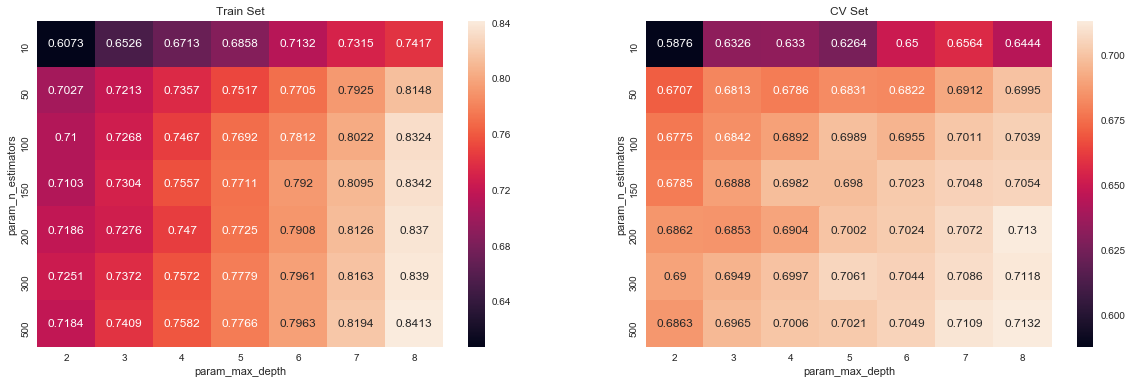

In [118]:
fig, ax = plt.subplots(1,2, figsize=(20,6))
sns.heatmap(max_scores1.mean_train_score, annot = True, fmt='.4g', ax=ax[0])
sns.heatmap(max_scores1.mean_test_score, annot = True, fmt='.4g', ax=ax[1])
ax[0].set_title('Train Set')
ax[1].set_title('CV Set')
plt.show()

In [119]:
print(set1.best_estimator_)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=8, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=500, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)


### Training our model with best Hyperparameters

In [123]:
def pred_prob(clf, data): 
    y_pred = []
    y_pred = clf.predict_proba(data)[:,1]
    return y_pred

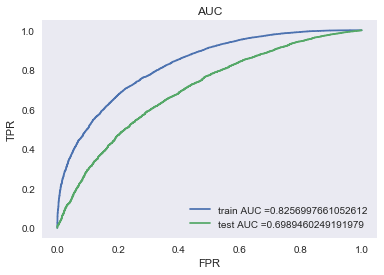

In [124]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc
model = RandomForestClassifier(max_depth = 8, n_estimators = 500)

model.fit(X_tr_BOW, y_train)
    
y_train_pred = pred_prob(model,X_tr_BOW)
y_test_pred = pred_prob(model,X_te_BOW)
    
train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.close
plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("AUC")
plt.grid()
plt.show()


### Confusion Matrix

In [128]:
# we are writing our own function for predict, with defined threshold
# we will pick a threshold that will give the least fpr
def find_best_threshold(threshold, fpr, tpr):
    t = threshold[np.argmax(tpr*(1-fpr))]
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    return t

def predict_with_best_t(proba, threshold):
    predictions = []
    for i in proba:
        if i>=threshold:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

In [129]:
#our objective here is to make auc the maximum
#so we find  the best threshold that will give the least fpr
best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)
print("Train confusion matrix")
print(confusion_matrix(y_train, predict_with_best_t(y_train_pred, best_t)))

the maximum value of tpr*(1-fpr) 0.5474011181642218 for threshold 0.842
Train confusion matrix
[[ 3603  1041]
 [ 7510 17996]]


Train data confusion matrix


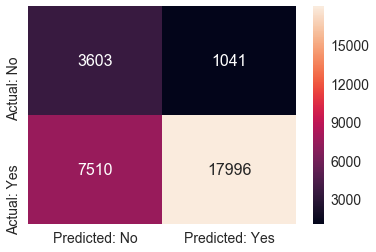

In [130]:
#plotting confusion matrix using seaborn's heatmap
# https://stackoverflow.com/questions/35572000/how-can-i-plot-a-confusion-matrix

print("Train data confusion matrix")

confusion_matrix_df_train = pd.DataFrame(confusion_matrix(y_train, predict_with_best_t(y_train_pred, best_t)), ['Actual: No','Actual: Yes'],['Predicted: No','Predicted: Yes'])
sns.set(font_scale=1.4)#for label size
sns.heatmap(confusion_matrix_df_train, annot=True,annot_kws={"size": 16}, fmt='g')

In [131]:
print("Test confusion matrix")
print(confusion_matrix(y_test, predict_with_best_t(y_test_pred, best_t)))

Test confusion matrix
[[1474  814]
 [4427 8135]]


Test data confusion matrix


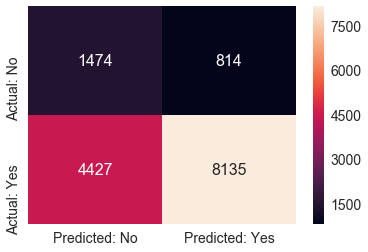

In [132]:
print("Test data confusion matrix")

confusion_matrix_df_test = pd.DataFrame(confusion_matrix(y_test, predict_with_best_t(y_test_pred, best_t)), ['Actual: No','Actual: Yes'],['Predicted: No','Predicted: Yes'])
sns.set(font_scale=1.4)#for label size
sns.heatmap(confusion_matrix_df_test, annot=True,annot_kws={"size": 16}, fmt='g')

### 2.4.2 Applying Random Forests on TFIDF,<font color='red'> SET 2</font>

In [120]:
# Please write all the code with proper documentation

In [133]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
#from sklearn.grid_search import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import learning_curve, GridSearchCV

#n_estimators = [10, 50, 100, 150, 200, 300, 500, 1000], max_depth = [2, 3, 4, 5, 6, 7, 8, 9, 10]

clf = RandomForestClassifier(class_weight='balanced')
parameters ={'n_estimators': [10, 50, 100, 150, 200, 300, 500], 'max_depth': [2, 3, 4, 5, 6, 7, 8]}
set2 = GridSearchCV(clf, parameters, cv=5, scoring='roc_auc',return_train_score=True)
set2.fit(X_tr_TFIDF, y_train)




GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': [10, 50, 100, 150, 200, 300, 500], 'max_depth': [2, 3, 4, 5, 6, 7, 8]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='roc_auc', verbose=0)

In [134]:
print(set2.cv_results_)

{'mean_fit_time': array([ 0.4076952 ,  1.16727767,  2.33196354,  2.99558949,  4.33202219,
        6.12521901,  8.74461374,  0.41348557,  1.26003013,  2.41334519,
        3.40130334,  4.52350416,  6.89954138, 10.94352593,  0.47871876,
        1.59712043,  3.07917299,  4.48262038,  5.70853405,  8.80983176,
       14.35780282,  0.53516898,  1.92305918,  3.59339061,  5.25654263,
        6.9629869 , 10.73708758, 17.41343155,  0.59839835,  2.28629332,
        4.34577675,  6.44795704,  8.79827929, 12.69524107, 21.16878352,
        0.71409078,  2.73548579,  5.46937947,  7.78020101, 10.12671895,
       15.4546618 , 25.24667745,  0.80145645,  3.15077386,  6.1425745 ,
        9.15171776, 12.40321641, 18.29309244, 30.39770827]), 'std_fit_time': array([0.03426796, 0.10991101, 0.42890565, 0.32914913, 0.96496716,
       0.39070317, 0.98083958, 0.00865933, 0.03619819, 0.13269056,
       0.02942185, 0.06110721, 0.30598282, 0.06592688, 0.01072289,
       0.04126672, 0.27238769, 0.29023146, 0.09511772, 0

In [135]:
import seaborn as sns; sns.set()
max_scores1 = pd.DataFrame(set2.cv_results_).groupby(['param_n_estimators', 'param_max_depth']).max().unstack()
max_scores1

mean_fit_time                                              \
param_max_depth                2          3          4          5          6   
param_n_estimators                                                             
10                      0.407695   0.413486   0.478719   0.535169   0.598398   
50                      1.167278   1.260030   1.597120   1.923059   2.286293   
100                     2.331964   2.413345   3.079173   3.593391   4.345777   
150                     2.995589   3.401303   4.482620   5.256543   6.447957   
200                     4.332022   4.523504   5.708534   6.962987   8.798279   
300                     6.125219   6.899541   8.809832  10.737088  12.695241   
500                     8.744614  10.943526  14.357803  17.413432  21.168784   

                                         mean_score_time                      \
param_max_depth             7          8               2         3         4   
param_n_estimators                                                             
10                   0.714091   0.801456        0.085779  0.073606  0.072807   
50                   2.735486   3.150774        0.233975  0.213836  0.210439   
100                  5.469379   6.142575        0.486899  0.391169  0.399526   
150                  7.780201   9.151718        0.595210  0.564889  0.573886   
200                 10.126719  12.403216        0.837567  0.738646  0.758979   
300                 15.454662  18.293092        1.313887  1.168483  1.108045   
500                 25.246677  30.397708        1.919077  1.788234  1.822330   

                      ...    std_test_score                      \
param_max_depth       ...                 6         7         8   
param_n_estimators    ...                                         
10                    ...          0.005603  0.014226  0.008126   
50                    ...          0.009237  0.008398  0.007637   
100                   ...          0.005919  0.007135  0.012028   
150                   ...          0.006589  0.009443  0.007689   
200                   ...          0.005851  0.008244  0.005052   
300                   ...          0.005899  0.006350  0.008559   
500                   ...          0.007363  0.007314  0.007920   

                   std_train_score                                          \
param_max_depth                  2         3         4         5         6   
param_n_estimators                                                           
10                        0.007335  0.013140  0.009647  0.011979  0.010338   
50                        0.007419  0.011283  0.010329  0.003977  0.002953   
100                       0.016307  0.010267  0.007356  0.003506  0.005416   
150                       0.003411  0.006876  0.005511  0.003390  0.002090   
200                       0.003812  0.003353  0.002902  0.003778  0.004899   
300                       0.003868  0.004238  0.006299  0.002698  0.002137   
500                       0.004296  0.005736  0.002243  0.001002  0.003255   

                                        
param_max_depth            7         8  
param_n_estimators                      
10                  0.008778  0.005474  
50                  0.005851  0.004440  
100                 0.006494  0.003840  
150                 0.003308  0.001835  
200                 0.003970  0.004392  
300                 0.003675  0.002780  
500                 0.001423  0.002929  

[7 rows x 140 columns]

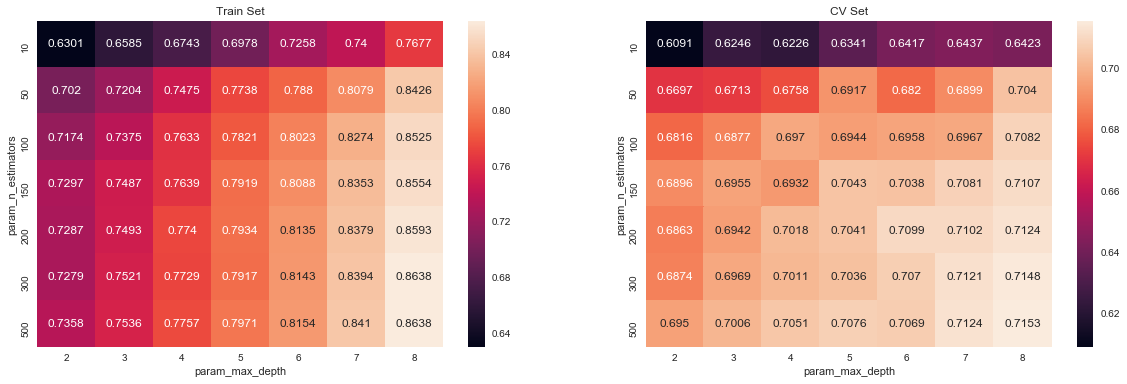

In [136]:
fig, ax = plt.subplots(1,2, figsize=(20,6))
sns.heatmap(max_scores1.mean_train_score, annot = True, fmt='.4g', ax=ax[0])
sns.heatmap(max_scores1.mean_test_score, annot = True, fmt='.4g', ax=ax[1])
ax[0].set_title('Train Set')
ax[1].set_title('CV Set')
plt.show()

In [137]:
print(set2.best_estimator_)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=8, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=500, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)


### Training our model with best Hyperparameters

In [138]:
def pred_prob(clf, data): 
    y_pred = []
    y_pred = clf.predict_proba(data)[:,1]
    return y_pred

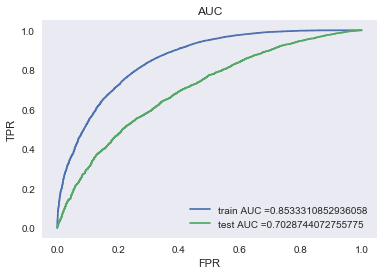

In [140]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc
model = RandomForestClassifier(max_depth = 8, n_estimators = 500)

model.fit(X_tr_TFIDF, y_train)
    
y_train_pred = pred_prob(model,X_tr_TFIDF)
y_test_pred = pred_prob(model,X_te_TFIDF)
    
train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.close
plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("AUC")
plt.grid()
plt.show()


### Confusion Matrix

In [141]:
#our objective here is to make auc the maximum
#so we find  the best threshold that will give the least fpr
best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)
print("Train confusion matrix")
print(confusion_matrix(y_train, predict_with_best_t(y_train_pred, best_t)))

the maximum value of tpr*(1-fpr) 0.5926446990264167 for threshold 0.841
Train confusion matrix
[[ 3469  1175]
 [ 5270 20236]]


Train data confusion matrix


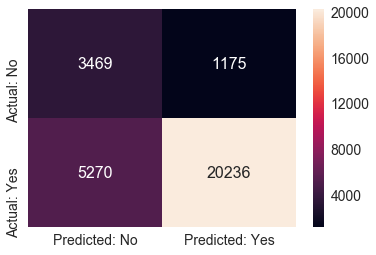

In [142]:
# https://stackoverflow.com/questions/35572000/how-can-i-plot-a-confusion-matrix

print("Train data confusion matrix")

confusion_matrix_df_train = pd.DataFrame(confusion_matrix(y_train, predict_with_best_t(y_train_pred, best_t)), ['Actual: No','Actual: Yes'],['Predicted: No','Predicted: Yes'])
sns.set(font_scale=1.4)#for label size
sns.heatmap(confusion_matrix_df_train, annot=True,annot_kws={"size": 16}, fmt='g')

In [143]:
print("Test confusion matrix")
print(confusion_matrix(y_test, predict_with_best_t(y_test_pred, best_t)))

Test confusion matrix
[[1351  937]
 [3794 8768]]


Test data confusion matrix


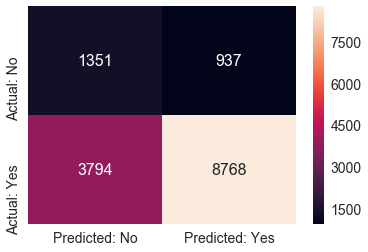

In [144]:
print("Test data confusion matrix")

confusion_matrix_df_test = pd.DataFrame(confusion_matrix(y_test, predict_with_best_t(y_test_pred, best_t)), ['Actual: No','Actual: Yes'],['Predicted: No','Predicted: Yes'])
sns.set(font_scale=1.4)#for label size
sns.heatmap(confusion_matrix_df_test, annot=True,annot_kws={"size": 16}, fmt='g')

### 2.4.3 Applying Random Forests on AVG W2V,<font color='red'> SET 3</font>

In [ ]:
# Please write all the code with proper documentation

In [145]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
#from sklearn.grid_search import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import learning_curve, GridSearchCV

#n_estimators = [10, 50, 100, 150, 200, 300, 500, 1000], max_depth = [2, 3, 4, 5, 6, 7, 8, 9, 10]

clf = RandomForestClassifier(class_weight='balanced')
parameters ={'n_estimators': [10, 50, 100, 150, 200, 300, 500], 'max_depth': [2, 3, 4, 5, 6, 7, 8]}
set3 = GridSearchCV(clf, parameters, cv=5, scoring='roc_auc',return_train_score=True)
set3.fit(X_tr_AVG_W2V, y_train)



GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': [10, 50, 100, 150, 200, 300, 500], 'max_depth': [2, 3, 4, 5, 6, 7, 8]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='roc_auc', verbose=0)

In [146]:
print(set3.cv_results_)

{'mean_fit_time': array([  3.73062325,  13.32516446,  25.57221727,  33.69788375,
        41.92189856,  60.54669194,  99.69279761,   4.06591187,
        16.30799503,  31.07567439,  46.57105794,  61.64554644,
        92.21979003, 153.77058063,   5.51824231,  22.29996467,
        43.26291308,  65.49645438,  88.41017094, 128.48839798,
       213.09653106,   6.65020905,  29.62936335,  57.91731505,
        86.75618744, 115.32339101, 185.9726584 , 286.61373773,
         8.31237168,  38.32829809,  76.14577565, 114.00532498,
       152.73555007, 229.14879632, 381.00829735,  10.5434124 ,
        49.14317856,  97.81561079, 146.13300571, 196.76520405,
       291.58683152, 484.32141342,  12.91427064,  61.29288054,
       121.27448444, 180.93973322, 242.88846173, 364.30078444,
       606.01726732]), 'std_fit_time': array([ 0.46871538,  0.94828071,  1.6721416 ,  2.05765362,  1.95092412,
        1.23487479,  1.11740305,  0.29004007,  0.74801564,  0.07524828,
        0.78092064,  0.45758603,  0.8748903

In [159]:
import seaborn as sns; sns.set()
max_scores1 = pd.DataFrame(set3.cv_results_).groupby(['param_n_estimators', 'param_max_depth']).max().unstack()
max_scores1

mean_fit_time                                      \
param_max_depth                2           3           4           5   
param_n_estimators                                                     
10                      3.730623    4.065912    5.518242    6.650209   
50                     13.325164   16.307995   22.299965   29.629363   
100                    25.572217   31.075674   43.262913   57.917315   
150                    33.697884   46.571058   65.496454   86.756187   
200                    41.921899   61.645546   88.410171  115.323391   
300                    60.546692   92.219790  128.488398  185.972658   
500                    99.692798  153.770581  213.096531  286.613738   

                                                       mean_score_time  \
param_max_depth              6           7           8               2   
param_n_estimators                                                       
10                    8.312372   10.543412   12.914271        0.432645   
50                   38.328298   49.143179   61.292881        0.897202   
100                  76.145776   97.815611  121.274484        1.470863   
150                 114.005325  146.133006  180.939733        1.768073   
200                 152.735550  196.765204  242.888462        2.165004   
300                 229.148796  291.586832  364.300784        3.102496   
500                 381.008297  484.321413  606.017267        5.194711   

                                          ...    std_test_score            \
param_max_depth            3         4    ...                 6         7   
param_n_estimators                        ...                               
10                  0.318948  0.317953    ...          0.009369  0.012303   
50                  0.699123  0.733439    ...          0.007590  0.009963   
100                 1.172665  1.204579    ...          0.006739  0.007484   
150                 1.645797  1.668131    ...          0.009158  0.007541   
200                 2.126114  2.279298    ...          0.007734  0.007258   
300                 3.103892  3.121062    ...          0.008099  0.006739   
500                 5.413525  5.263926    ...          0.006720  0.008856   

                             std_train_score                                \
param_max_depth            8               2         3         4         5   
param_n_estimators                                                           
10                  0.004288        0.001863  0.006359  0.004799  0.003650   
50                  0.008360        0.010039  0.005750  0.002583  0.002390   
100                 0.009821        0.001995  0.004184  0.003486  0.002553   
150                 0.006398        0.006002  0.004239  0.004923  0.002617   
200                 0.008478        0.000878  0.002986  0.002848  0.002157   
300                 0.008404        0.003121  0.004302  0.001620  0.001561   
500                 0.006992        0.003307  0.002063  0.001506  0.001808   

                                                  
param_max_depth            6         7         8  
param_n_estimators                                
10                  0.006125  0.003395  0.005729  
50                  0.002924  0.004022  0.000959  
100                 0.003027  0.002820  0.001168  
150                 0.003456  0.001309  0.001606  
200                 0.000967  0.001616  0.000966  
300                 0.002122  0.001083  0.000707  
500                 0.001863  0.001388  0.000709  

[7 rows x 140 columns]

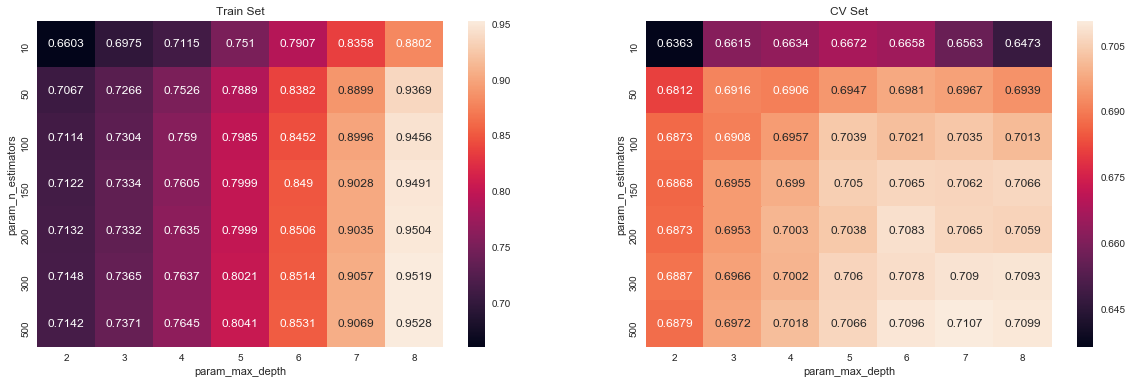

In [160]:
fig, ax = plt.subplots(1,2, figsize=(20,6))
sns.heatmap(max_scores1.mean_train_score, annot = True, fmt='.4g', ax=ax[0])
sns.heatmap(max_scores1.mean_test_score, annot = True, fmt='.4g', ax=ax[1])
ax[0].set_title('Train Set')
ax[1].set_title('CV Set')
plt.show()

In [162]:
print(set3.best_estimator_)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=7, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=500, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)


### Training our model with best Hyperparameters

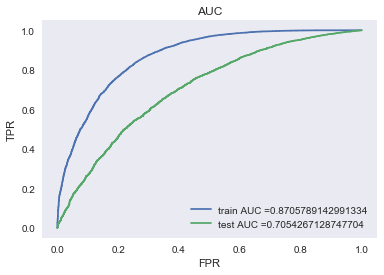

In [150]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc
model = RandomForestClassifier(max_depth = 7, n_estimators = 500)

model.fit(X_tr_AVG_W2V, y_train)
    
y_train_pred = pred_prob(model,X_tr_AVG_W2V)
y_test_pred = pred_prob(model,X_te_AVG_W2V)
    
train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.close
plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("AUC")
plt.grid()
plt.show()


### Confusion matrix

In [151]:
#our objective here is to make auc the maximum
#so we find  the best threshold that will give the least fpr
best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)
print("Train confusion matrix")
print(confusion_matrix(y_train, predict_with_best_t(y_train_pred, best_t)))

the maximum value of tpr*(1-fpr) 0.6217242934107549 for threshold 0.831
Train confusion matrix
[[ 3461  1183]
 [ 4228 21278]]


Train data confusion matrix


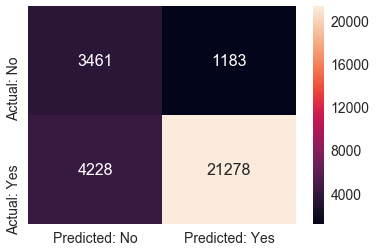

In [152]:
#plotting confusion matrix using seaborn's heatmap
# https://stackoverflow.com/questions/35572000/how-can-i-plot-a-confusion-matrix

print("Train data confusion matrix")

confusion_matrix_df_train = pd.DataFrame(confusion_matrix(y_train, predict_with_best_t(y_train_pred, best_t)), ['Actual: No','Actual: Yes'],['Predicted: No','Predicted: Yes'])
sns.set(font_scale=1.4)#for label size
sns.heatmap(confusion_matrix_df_train, annot=True,annot_kws={"size": 16}, fmt='g')

In [153]:
print("Test confusion matrix")
print(confusion_matrix(y_test, predict_with_best_t(y_test_pred, best_t)))

Test confusion matrix
[[1318  970]
 [3445 9117]]


Test data confusion matrix


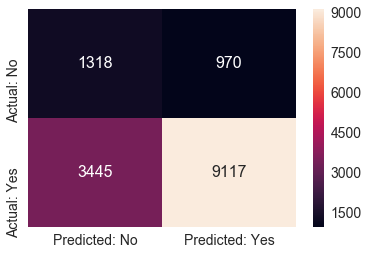

In [154]:
print("Test data confusion matrix")

confusion_matrix_df_test = pd.DataFrame(confusion_matrix(y_test, predict_with_best_t(y_test_pred, best_t)), ['Actual: No','Actual: Yes'],['Predicted: No','Predicted: Yes'])
sns.set(font_scale=1.4)#for label size
sns.heatmap(confusion_matrix_df_test, annot=True,annot_kws={"size": 16}, fmt='g')


### 2.4.4 Applying Random Forests on TFIDF W2V,<font color='red'> SET 4</font>

In [155]:
# Please write all the code with proper documentation

In [156]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
#from sklearn.grid_search import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import learning_curve, GridSearchCV

#n_estimators = [10, 50, 100, 150, 200, 300, 500, 1000], max_depth = [2, 3, 4, 5, 6, 7, 8, 9, 10]

clf = RandomForestClassifier(class_weight='balanced')
parameters ={'n_estimators': [10, 50, 100, 150, 200, 300, 500], 'max_depth': [2, 3, 4, 5, 6, 7, 8]}
set4 = GridSearchCV(clf, parameters, cv=5, scoring='roc_auc',return_train_score=True)
set4.fit(X_tr_TFIDF_W2V, y_train)



GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': [10, 50, 100, 150, 200, 300, 500], 'max_depth': [2, 3, 4, 5, 6, 7, 8]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='roc_auc', verbose=0)

In [157]:
print(set4.cv_results_)

{'mean_fit_time': array([  3.37656288,  10.6826333 ,  20.47025652,  30.79544525,
        40.52462788,  60.3326427 , 104.0308053 ,   3.88859434,
        16.65785251,  34.24960699,  54.64071875,  74.67776875,
       122.55498152, 206.21353583,   6.43122153,  29.2857357 ,
        60.86756506,  74.09678359,  90.94179354, 128.84166279,
       212.76262474,   6.85785995,  29.63774123,  58.11718302,
        87.6504045 , 114.88916621, 172.28625979, 284.34959168,
         8.3546576 ,  38.32970505,  75.07503328, 112.3206285 ,
       149.93225298, 224.23852587, 373.22491245,  10.34992142,
        48.8280076 ,  96.95551763, 144.45628934, 192.09070592,
       289.58498349, 488.22677097,  13.24418283,  61.58411808,
       122.79661183, 182.61325154, 246.40206442, 366.70414157,
       608.54800487]), 'std_fit_time': array([4.28545541e-01, 7.61170269e-02, 5.90249980e-02, 7.99001322e-01,
       8.90242182e-01, 8.71740600e-01, 7.91750712e+00, 1.16674431e-02,
       7.28747650e-01, 2.26865342e+00, 4.6161

In [158]:
import seaborn as sns; sns.set()
max_scores1 = pd.DataFrame(set4.cv_results_).groupby(['param_n_estimators', 'param_max_depth']).max().unstack()
max_scores1

mean_fit_time                                      \
param_max_depth                2           3           4           5   
param_n_estimators                                                     
10                      3.376563    3.888594    6.431222    6.857860   
50                     10.682633   16.657853   29.285736   29.637741   
100                    20.470257   34.249607   60.867565   58.117183   
150                    30.795445   54.640719   74.096784   87.650405   
200                    40.524628   74.677769   90.941794  114.889166   
300                    60.332643  122.554982  128.841663  172.286260   
500                   104.030805  206.213536  212.762625  284.349592   

                                                       mean_score_time  \
param_max_depth              6           7           8               2   
param_n_estimators                                                       
10                    8.354658   10.349921   13.244183        0.341088   
50                   38.329705   48.828008   61.584118        0.704117   
100                  75.075033   96.955518  122.796612        1.172265   
150                 112.320628  144.456289  182.613252        1.651583   
200                 149.932253  192.090706  246.402064        2.120528   
300                 224.238526  289.584983  366.704142        3.073579   
500                 373.224912  488.226771  608.548005        4.995035   

                                          ...    std_test_score            \
param_max_depth            3         4    ...                 6         7   
param_n_estimators                        ...                               
10                  0.332119  0.392810    ...          0.008975  0.008412   
50                  0.740619  0.958778    ...          0.011849  0.014061   
100                 1.402053  1.635213    ...          0.010074  0.009397   
150                 1.811756  1.802092    ...          0.010091  0.007942   
200                 2.381917  2.147003    ...          0.010435  0.011249   
300                 4.023915  3.127222    ...          0.011636  0.010652   
500                 6.371227  5.061066    ...          0.010212  0.010284   

                             std_train_score                                \
param_max_depth            8               2         3         4         5   
param_n_estimators                                                           
10                  0.011278        0.009511  0.008438  0.006395  0.003929   
50                  0.009055        0.004339  0.003293  0.002790  0.003066   
100                 0.010855        0.004447  0.006105  0.001265  0.001236   
150                 0.010673        0.002011  0.003191  0.001178  0.003248   
200                 0.010001        0.003330  0.002667  0.003096  0.001121   
300                 0.010110        0.001678  0.003471  0.001538  0.001259   
500                 0.010483        0.002536  0.002522  0.002598  0.001713   

                                                  
param_max_depth            6         7         8  
param_n_estimators                                
10                  0.005012  0.003112  0.005370  
50                  0.001784  0.002094  0.003108  
100                 0.002362  0.001937  0.001549  
150                 0.001807  0.001008  0.001020  
200                 0.001592  0.001630  0.002260  
300                 0.000729  0.001985  0.001455  
500                 0.001020  0.001458  0.001610  

[7 rows x 140 columns]

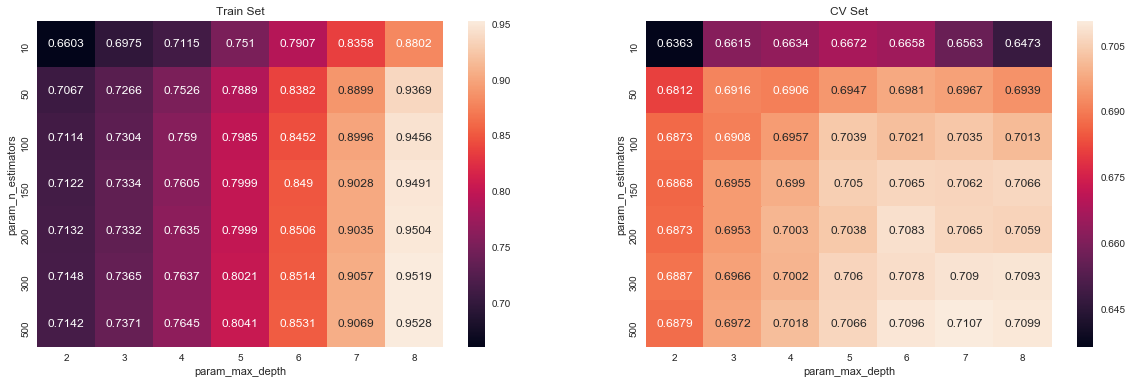

In [161]:
fig, ax = plt.subplots(1,2, figsize=(20,6))
sns.heatmap(max_scores1.mean_train_score, annot = True, fmt='.4g', ax=ax[0])
sns.heatmap(max_scores1.mean_test_score, annot = True, fmt='.4g', ax=ax[1])
ax[0].set_title('Train Set')
ax[1].set_title('CV Set')
plt.show()

In [163]:
print(set4.best_estimator_)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=7, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=500, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)


### Training our model with best Hyperparameters

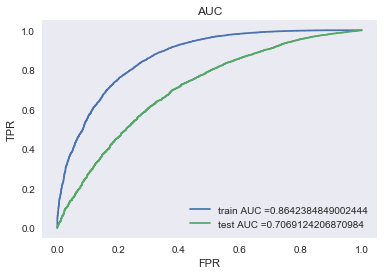

In [164]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc
model = RandomForestClassifier(max_depth = 7, n_estimators = 500)

model.fit(X_tr_TFIDF_W2V, y_train)
    
y_train_pred = pred_prob(model,X_tr_TFIDF_W2V)
y_test_pred = pred_prob(model,X_te_TFIDF_W2V)
    
train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.close
plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("AUC")
plt.grid()
plt.show()


### Confusion matrix

In [165]:
#our objective here is to make auc the maximum
#so we find  the best threshold that will give the least fpr
best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)
print("Train confusion matrix")
print(confusion_matrix(y_train, predict_with_best_t(y_train_pred, best_t)))

the maximum value of tpr*(1-fpr) 0.6081086931429486 for threshold 0.829
Train confusion matrix
[[ 3467  1177]
 [ 4730 20776]]


Train data confusion matrix


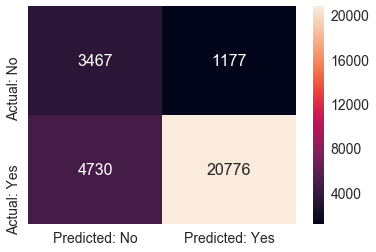

In [166]:
#plotting confusion matrix using seaborn's heatmap
# https://stackoverflow.com/questions/35572000/how-can-i-plot-a-confusion-matrix

print("Train data confusion matrix")

confusion_matrix_df_train = pd.DataFrame(confusion_matrix(y_train, predict_with_best_t(y_train_pred, best_t)), ['Actual: No','Actual: Yes'],['Predicted: No','Predicted: Yes'])
sns.set(font_scale=1.4)#for label size
sns.heatmap(confusion_matrix_df_train, annot=True,annot_kws={"size": 16}, fmt='g')

In [167]:
print("Test confusion matrix")
print(confusion_matrix(y_test, predict_with_best_t(y_test_pred, best_t)))

Test confusion matrix
[[1364  924]
 [3550 9012]]


Test data confusion matrix


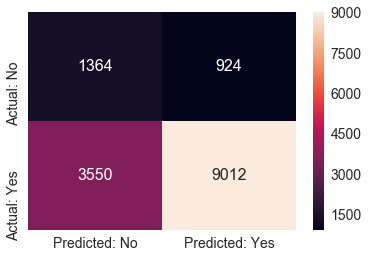

In [168]:
print("Test data confusion matrix")

confusion_matrix_df_test = pd.DataFrame(confusion_matrix(y_test, predict_with_best_t(y_test_pred, best_t)), ['Actual: No','Actual: Yes'],['Predicted: No','Predicted: Yes'])
sns.set(font_scale=1.4)#for label size
sns.heatmap(confusion_matrix_df_test, annot=True,annot_kws={"size": 16}, fmt='g')

<h2>2.5 Applying GBDT</h2>

<br>Apply GBDT on different kind of featurization as mentioned in the instructions
<br> For Every model that you work on make sure you do the step 2 and step 3 of instrucations

### 2.5.1 Applying XGBOOST on BOW,<font color='red'> SET 1</font>

In [ ]:
# Please write all the code with proper documentation

In [169]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
#from sklearn.grid_search import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import learning_curve, GridSearchCV
from xgboost import XGBClassifier

#n_estimators = [10, 50, 100, 150, 200, 300, 500, 1000], max_depth = [2, 3, 4, 5, 6, 7, 8, 9, 10]

clf = XGBClassifier(class_weight='balanced')
parameters ={'n_estimators': [10, 50, 100, 150, 200, 300, 500], 'max_depth': [2, 3, 4, 5, 6, 7, 8]}
set1 =GridSearchCV(clf, parameters, cv=5, scoring='roc_auc',return_train_score=True)
set1.fit(X_tr_BOW, y_train)




GridSearchCV(cv=5, error_score='raise',
       estimator=XGBClassifier(base_score=None, booster=None, class_weight='balanced',
       colsample_bylevel=None, colsample_bynode=None,
       colsample_bytree=None, gamma=None, gpu_id=None,
       importance_type='gain', interaction_constraints=None,
       learning_rate=None, max_delta_step=None, ma...pos_weight=None, subsample=None,
       tree_method=None, validate_parameters=False, verbosity=None),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': [10, 50, 100, 150, 200, 300, 500], 'max_depth': [2, 3, 4, 5, 6, 7, 8]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='roc_auc', verbose=0)

In [170]:
print(set1.cv_results_)

{'mean_fit_time': array([  3.84232435,   9.4050508 ,  15.82866988,  21.06067882,
        26.64912529,  34.36430125,  56.76997375,   5.53260489,
        12.50954556,  20.48456411,  27.36482487,  35.95615177,
        48.30932741,  76.96787162,   5.36046486,  12.80814676,
        22.99769754,  36.17536006,  46.33272276,  57.97606778,
        92.10818729,   5.76398554,  14.74277344,  25.4407649 ,
        35.54414577,  48.21226854,  67.55414386, 110.30043049,
         6.45992465,  16.66363635,  29.25775747,  42.64794827,
        54.5114234 ,  79.05179667, 134.42591381,   7.2611825 ,
        19.01634479,  33.01072145,  47.89072747,  61.83483906,
        91.06886082, 148.09894938,   7.66250825,  21.12650194,
        37.28249769,  53.64194818,  71.07831941, 102.64570122,
       170.23475337]), 'std_fit_time': array([0.17780663, 1.32991613, 1.06304874, 0.36050813, 0.67260309,
       1.53422994, 3.24083598, 0.44798178, 0.37321193, 0.52752653,
       0.70008059, 2.10946   , 0.83758651, 3.19180344

In [171]:
import seaborn as sns; sns.set()
max_scores1 = pd.DataFrame(set1.cv_results_).groupby(['param_n_estimators', 'param_max_depth']).max().unstack()
max_scores1

mean_fit_time                                    \
param_max_depth                2          3          4           5   
param_n_estimators                                                   
10                      3.842324   5.532605   5.360465    5.763986   
50                      9.405051  12.509546  12.808147   14.742773   
100                    15.828670  20.484564  22.997698   25.440765   
150                    21.060679  27.364825  36.175360   35.544146   
200                    26.649125  35.956152  46.332723   48.212269   
300                    34.364301  48.309327  57.976068   67.554144   
500                    56.769974  76.967872  92.108187  110.300430   

                                                       mean_score_time  \
param_max_depth              6           7           8               2   
param_n_estimators                                                       
10                    6.459925    7.261182    7.662508        0.537163   
50                   16.663636   19.016345   21.126502        0.365420   
100                  29.257757   33.010721   37.282498        0.386367   
150                  42.647948   47.890727   53.641948        0.403721   
200                  54.511423   61.834839   71.078319        0.415888   
300                  79.051797   91.068861  102.645701        0.417683   
500                 134.425914  148.098949  170.234753        0.453788   

                                            ...      std_test_score            \
param_max_depth            3         4      ...                   6         7   
param_n_estimators                          ...                                 
10                  0.682974  0.662629      ...            0.005257  0.007348   
50                  0.414891  0.331912      ...            0.006770  0.008692   
100                 0.410502  0.354852      ...            0.007846  0.009492   
150                 0.397138  0.427457      ...            0.008199  0.009447   
200                 0.380981  0.441819      ...            0.006319  0.011182   
300                 0.392351  0.377591      ...            0.004055  0.010647   
500                 0.455384  0.426260      ...            0.003069  0.012757   

                             std_train_score                                \
param_max_depth            8               2         3         4         5   
param_n_estimators                                                           
10                  0.004584        0.002878  0.001902  0.002169  0.004278   
50                  0.008386        0.001760  0.002410  0.001695  0.004363   
100                 0.008380        0.002132  0.002523  0.001809  0.002896   
150                 0.010392        0.002192  0.003080  0.002079  0.003036   
200                 0.010186        0.002187  0.003087  0.002104  0.001531   
300                 0.008656        0.001306  0.001665  0.001694  0.000608   
500                 0.007939        0.001556  0.001384  0.000619  0.000087   

                                                          
param_max_depth            6             7             8  
param_n_estimators                                        
10                  0.002856  3.027804e-03  3.575681e-03  
50                  0.003357  2.142966e-03  2.285854e-03  
100                 0.001735  1.557880e-03  9.826180e-04  
150                 0.001305  7.984836e-04  2.111827e-04  
200                 0.000879  3.061480e-04  4.564622e-05  
300                 0.000145  4.068675e-05  8.894904e-07  
500                 0.000005  1.938841e-08  5.276726e-09  

[7 rows x 140 columns]

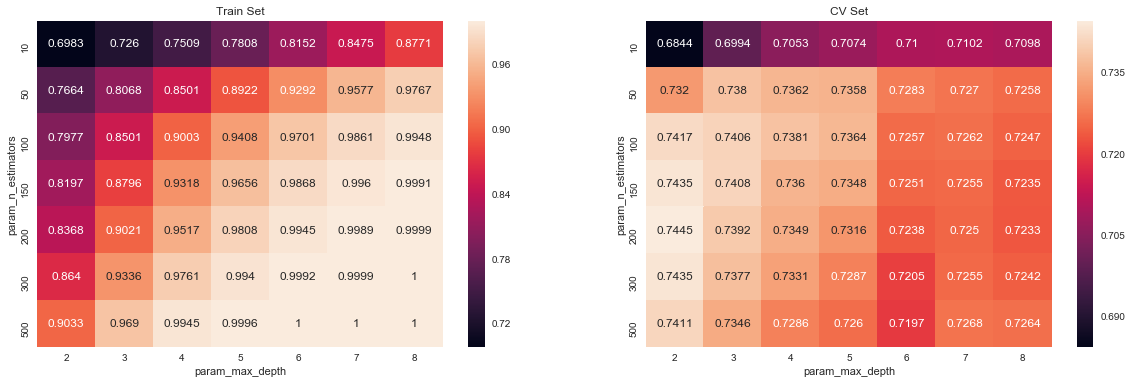

In [172]:
fig, ax = plt.subplots(1,2, figsize=(20,6))
sns.heatmap(max_scores1.mean_train_score, annot = True, fmt='.4g', ax=ax[0])
sns.heatmap(max_scores1.mean_test_score, annot = True, fmt='.4g', ax=ax[1])
ax[0].set_title('Train Set')
ax[1].set_title('CV Set')
plt.show()

In [173]:
print(set1.best_estimator_)

XGBClassifier(base_score=0.5, booster=None, class_weight='balanced',
       colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
       gamma=0, gpu_id=-1, importance_type='gain',
       interaction_constraints=None, learning_rate=0.300000012,
       max_delta_step=0, max_depth=2, min_child_weight=1, missing=nan,
       monotone_constraints=None, n_estimators=200, n_jobs=0,
       num_parallel_tree=1, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
       tree_method=None, validate_parameters=False, verbosity=None)


In [174]:
max_d = set1.best_params_['max_depth']
n_est = set1.best_params_['n_estimators']

### Training our model with best Hyperparameters

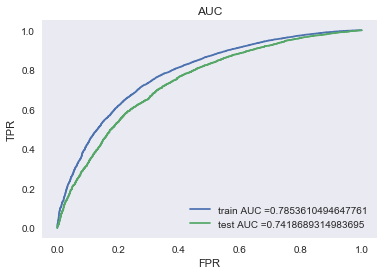

In [176]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier(max_depth = max_d , n_estimators = n_est)

model.fit(X_tr_BOW, y_train)
    
y_train_pred = pred_prob(model,X_tr_BOW)
y_test_pred = pred_prob(model,X_te_BOW)
    
train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.close
plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("AUC")
plt.grid()
plt.show()


### Confusion matrix

In [177]:
#our objective here is to make auc the maximum
#so we find  the best threshold that will give the least fpr
best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)
print("Train confusion matrix")
print(confusion_matrix(y_train, predict_with_best_t(y_train_pred, best_t)))

the maximum value of tpr*(1-fpr) 0.5175654064068829 for threshold 0.835
Train confusion matrix
[[ 3344  1300]
 [ 7173 18333]]


Train data confusion matrix


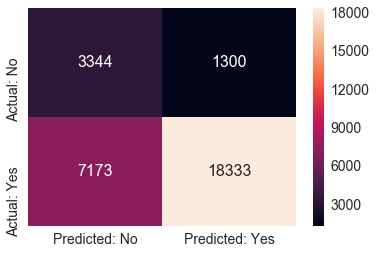

In [178]:
#plotting confusion matrix using seaborn's heatmap
# https://stackoverflow.com/questions/35572000/how-can-i-plot-a-confusion-matrix

print("Train data confusion matrix")

confusion_matrix_df_train = pd.DataFrame(confusion_matrix(y_train, predict_with_best_t(y_train_pred, best_t)), ['Actual: No','Actual: Yes'],['Predicted: No','Predicted: Yes'])
sns.set(font_scale=1.4)#for label size
sns.heatmap(confusion_matrix_df_train, annot=True,annot_kws={"size": 16}, fmt='g')

In [179]:
print("Test confusion matrix")
print(confusion_matrix(y_test, predict_with_best_t(y_test_pred, best_t)))

Test confusion matrix
[[1697  591]
 [4813 7749]]


Test data confusion matrix


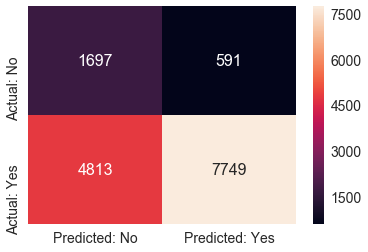

In [180]:
print("Test data confusion matrix")

confusion_matrix_df_test = pd.DataFrame(confusion_matrix(y_test, predict_with_best_t(y_test_pred, best_t)), ['Actual: No','Actual: Yes'],['Predicted: No','Predicted: Yes'])
sns.set(font_scale=1.4)#for label size
sns.heatmap(confusion_matrix_df_test, annot=True,annot_kws={"size": 16}, fmt='g')

### 2.5.2 Applying XGBOOST on TFIDF,<font color='red'> SET 2</font>

In [181]:
# Please write all the code with proper documentation

In [182]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
#from sklearn.grid_search import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import learning_curve, GridSearchCV
from xgboost import XGBClassifier

#n_estimators = [10, 50, 100, 150, 200, 300, 500, 1000], max_depth = [2, 3, 4, 5, 6, 7, 8, 9, 10]

clf = XGBClassifier(class_weight='balanced')
parameters ={'n_estimators': [10, 50, 100, 150, 200, 300, 500], 'max_depth': [2, 3, 4, 5, 6, 7, 8]}
set2 =GridSearchCV(clf, parameters, cv=5, scoring='roc_auc',return_train_score=True)
set2.fit(X_tr_TFIDF, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=XGBClassifier(base_score=None, booster=None, class_weight='balanced',
       colsample_bylevel=None, colsample_bynode=None,
       colsample_bytree=None, gamma=None, gpu_id=None,
       importance_type='gain', interaction_constraints=None,
       learning_rate=None, max_delta_step=None, ma...pos_weight=None, subsample=None,
       tree_method=None, validate_parameters=False, verbosity=None),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': [10, 50, 100, 150, 200, 300, 500], 'max_depth': [2, 3, 4, 5, 6, 7, 8]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='roc_auc', verbose=0)

In [183]:
print(set2.cv_results_)

{'mean_fit_time': array([  6.20540586,  13.83320036,  22.98772478,  32.25374517,
        41.3508182 ,  60.7429595 ,  97.63709579,   6.74635816,
        17.86642041,  31.69723334,  44.96255884,  58.67149854,
        85.64436684, 140.72287459,   7.88531289,  22.53992205,
        40.19630489,  57.82875199,  75.5485651 , 111.54570079,
       182.36112399,   8.8519269 ,  26.83663163,  49.40268517,
        70.68616858,  93.78479805, 137.17835402, 224.12025127,
         9.82173362,  30.78866339,  57.03647065,  83.33414445,
       109.27597022, 160.59712596, 266.09041381,  10.80829554,
        34.94415107,  65.49804277,  95.55885291, 125.56760244,
       186.67339268, 301.24061341,  11.49027114,  39.60847726,
        73.93428206, 108.14539371, 141.31130099, 210.38079228,
       339.7578095 ]), 'std_fit_time': array([0.63752742, 0.77116663, 0.36997205, 0.87610681, 0.62571369,
       0.82293503, 0.61692052, 0.06869409, 0.61078798, 0.79114296,
       0.56766296, 0.7120891 , 0.61699251, 1.34817852

In [184]:
import seaborn as sns; sns.set()
max_scores2 = pd.DataFrame(set2.cv_results_).groupby(['param_n_estimators', 'param_max_depth']).max().unstack()
max_scores2

mean_fit_time                                      \
param_max_depth                2           3           4           5   
param_n_estimators                                                     
10                      6.205406    6.746358    7.885313    8.851927   
50                     13.833200   17.866420   22.539922   26.836632   
100                    22.987725   31.697233   40.196305   49.402685   
150                    32.253745   44.962559   57.828752   70.686169   
200                    41.350818   58.671499   75.548565   93.784798   
300                    60.742959   85.644367  111.545701  137.178354   
500                    97.637096  140.722875  182.361124  224.120251   

                                                       mean_score_time  \
param_max_depth              6           7           8               2   
param_n_estimators                                                       
10                    9.821734   10.808296   11.490271        0.590021   
50                   30.788663   34.944151   39.608477        0.325330   
100                  57.036471   65.498043   73.934282        0.351860   
150                  83.334144   95.558853  108.145394        0.344479   
200                 109.275970  125.567602  141.311301        0.362232   
300                 160.597126  186.673393  210.380792        0.340888   
500                 266.090414  301.240613  339.757809        0.354252   

                                            ...      std_test_score            \
param_max_depth            3         4      ...                   6         7   
param_n_estimators                          ...                                 
10                  0.445808  0.391154      ...            0.005076  0.005559   
50                  0.327924  0.364226      ...            0.007364  0.007625   
100                 0.330516  0.364027      ...            0.008082  0.007769   
150                 0.353056  0.354852      ...            0.007768  0.008242   
200                 0.339293  0.364825      ...            0.008018  0.007413   
300                 0.346274  0.345676      ...            0.008546  0.007654   
500                 0.367019  0.389559      ...            0.006826  0.007673   

                             std_train_score                                \
param_max_depth            8               2         3         4         5   
param_n_estimators                                                           
10                  0.006339        0.001723  0.003007  0.002325  0.003529   
50                  0.006762        0.002151  0.002502  0.000651  0.002682   
100                 0.007016        0.001002  0.002263  0.001091  0.001763   
150                 0.008563        0.001504  0.002233  0.001484  0.000950   
200                 0.007614        0.001690  0.002462  0.000917  0.000512   
300                 0.009285        0.001464  0.001504  0.000735  0.000166   
500                 0.010127        0.001277  0.000870  0.000097  0.000003   

                                                              
param_max_depth                6             7             8  
param_n_estimators                                            
10                  3.152429e-03  1.688393e-03  4.025950e-03  
50                  4.611900e-04  1.802357e-03  1.432806e-03  
100                 5.998637e-04  4.161595e-04  3.398234e-04  
150                 5.125641e-04  1.686038e-04  4.214321e-05  
200                 2.381541e-04  5.555223e-05  1.597980e-06  
300                 2.995656e-05  9.120521e-07  2.638363e-09  
500                 2.638363e-09  0.000000e+00  0.000000e+00  

[7 rows x 140 columns]

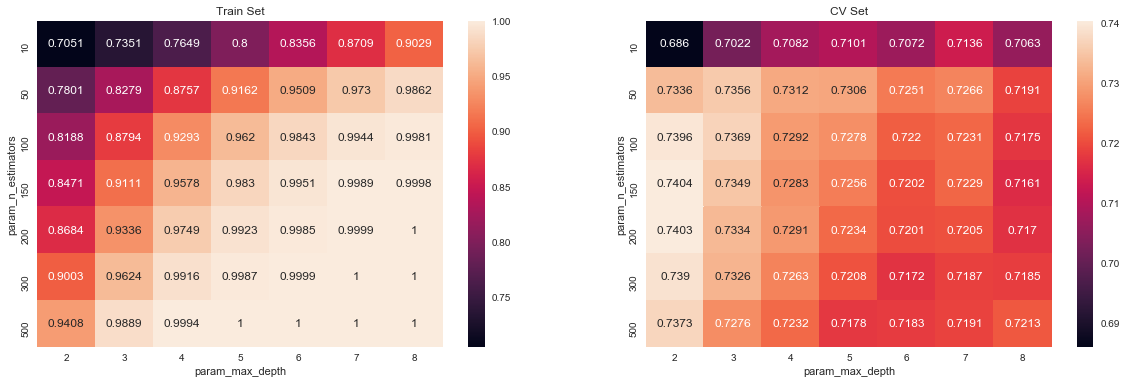

In [185]:
fig, ax = plt.subplots(1,2, figsize=(20,6))
sns.heatmap(max_scores2.mean_train_score, annot = True, fmt='.4g', ax=ax[0])
sns.heatmap(max_scores2.mean_test_score, annot = True, fmt='.4g', ax=ax[1])
ax[0].set_title('Train Set')
ax[1].set_title('CV Set')
plt.show()

In [186]:
print(set2.best_estimator_)

XGBClassifier(base_score=0.5, booster=None, class_weight='balanced',
       colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
       gamma=0, gpu_id=-1, importance_type='gain',
       interaction_constraints=None, learning_rate=0.300000012,
       max_delta_step=0, max_depth=2, min_child_weight=1, missing=nan,
       monotone_constraints=None, n_estimators=150, n_jobs=0,
       num_parallel_tree=1, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
       tree_method=None, validate_parameters=False, verbosity=None)


In [187]:
max_d = set2.best_params_['max_depth']
n_est = set2.best_params_['n_estimators']

### Training our model with best Hyperparameters

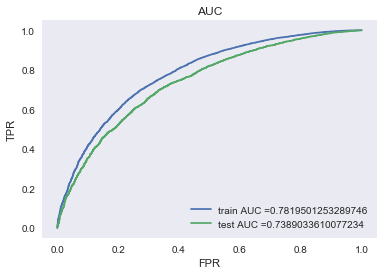

In [188]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier(max_depth = max_d , n_estimators = n_est)

model.fit(X_tr_TFIDF, y_train)
    
y_train_pred = pred_prob(model,X_tr_TFIDF)
y_test_pred = pred_prob(model,X_te_TFIDF)
    
train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.close
plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("AUC")
plt.grid()
plt.show()


### Confusion matrix

In [189]:
#our objective here is to make auc the maximum
#so we find  the best threshold that will give the least fpr
best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)
print("Train confusion matrix")
print(confusion_matrix(y_train, predict_with_best_t(y_train_pred, best_t)))

the maximum value of tpr*(1-fpr) 0.5068760568606479 for threshold 0.842
Train confusion matrix
[[ 3373  1271]
 [ 7706 17800]]


Train data confusion matrix


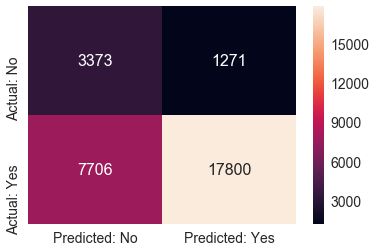

In [190]:
#plotting confusion matrix using seaborn's heatmap
# https://stackoverflow.com/questions/35572000/how-can-i-plot-a-confusion-matrix

print("Train data confusion matrix")

confusion_matrix_df_train = pd.DataFrame(confusion_matrix(y_train, predict_with_best_t(y_train_pred, best_t)), ['Actual: No','Actual: Yes'],['Predicted: No','Predicted: Yes'])
sns.set(font_scale=1.4)#for label size
sns.heatmap(confusion_matrix_df_train, annot=True,annot_kws={"size": 16}, fmt='g')

In [191]:
print("Test confusion matrix")
print(confusion_matrix(y_test, predict_with_best_t(y_test_pred, best_t)))

Test confusion matrix
[[1721  567]
 [5105 7457]]


Test data confusion matrix


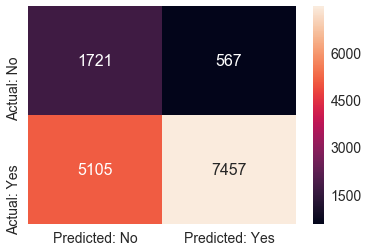

In [192]:
print("Test data confusion matrix")

confusion_matrix_df_test = pd.DataFrame(confusion_matrix(y_test, predict_with_best_t(y_test_pred, best_t)), ['Actual: No','Actual: Yes'],['Predicted: No','Predicted: Yes'])
sns.set(font_scale=1.4)#for label size
sns.heatmap(confusion_matrix_df_test, annot=True,annot_kws={"size": 16}, fmt='g')

### 2.5.3 Applying XGBOOST on AVG W2V,<font color='red'> SET 3</font>

In [193]:
# Please write all the code with proper documentation

In [194]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
#from sklearn.grid_search import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import learning_curve, GridSearchCV
from xgboost import XGBClassifier

#n_estimators = [10, 50, 100, 150, 200, 300, 500, 1000], max_depth = [2, 3, 4, 5, 6, 7, 8, 9, 10]

clf = XGBClassifier(class_weight='balanced')
parameters ={'n_estimators': [10, 50, 100, 150, 200, 300, 500], 'max_depth': [2, 3, 4, 5, 6, 7, 8]}
set3 =GridSearchCV(clf, parameters, cv=5, scoring='roc_auc',return_train_score=True)
set3.fit(X_tr_AVG_W2V, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=XGBClassifier(base_score=None, booster=None, class_weight='balanced',
       colsample_bylevel=None, colsample_bynode=None,
       colsample_bytree=None, gamma=None, gpu_id=None,
       importance_type='gain', interaction_constraints=None,
       learning_rate=None, max_delta_step=None, ma...pos_weight=None, subsample=None,
       tree_method=None, validate_parameters=False, verbosity=None),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': [10, 50, 100, 150, 200, 300, 500], 'max_depth': [2, 3, 4, 5, 6, 7, 8]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='roc_auc', verbose=0)

In [195]:
print(set3.cv_results_)

{'mean_fit_time': array([  19.27864342,   47.58255305,   83.20867219,  117.41878643,
        152.62663283,  222.51114612,  359.90273104,   22.05920777,
         62.44948101,  114.03205285,  188.03859687, 2292.41762762,
        328.57044487,  552.16559982,   26.01861939,   80.92837677,
        149.83191419,  218.33452291,  283.53077412,  422.03069911,
        708.13122778,   29.21307554,   96.95731335,  184.58955021,
        270.58519268,  354.59493318,  529.50576563,  858.58774056,
         32.81963134,  114.82910514,  217.20094638,  319.71600556,
        422.60186582,  625.10689721, 1000.86305742,   35.77313313,
        132.08736744,  253.39576006,  368.35871034,  487.1687921 ,
        700.49232454, 1083.74441366,   38.56446152,  148.96623073,
        283.55569863,  412.61178131,  533.26013932,  758.98310766,
       1132.78866611]), 'std_fit_time': array([1.97872227e-01, 6.46769251e-01, 1.08047054e+00, 1.88429111e+00,
       1.29623262e+00, 1.81974236e+00, 1.93491423e+00, 1.44497880e-

In [196]:
import seaborn as sns; sns.set()
max_scores3 = pd.DataFrame(set3.cv_results_).groupby(['param_n_estimators', 'param_max_depth']).max().unstack()
max_scores3

mean_fit_time                                       \
param_max_depth                2            3           4           5   
param_n_estimators                                                      
10                     19.278643    22.059208   26.018619   29.213076   
50                     47.582553    62.449481   80.928377   96.957313   
100                    83.208672   114.032053  149.831914  184.589550   
150                   117.418786   188.038597  218.334523  270.585193   
200                   152.626633  2292.417628  283.530774  354.594933   
300                   222.511146   328.570445  422.030699  529.505766   
500                   359.902731   552.165600  708.131228  858.587741   

                                                          mean_score_time  \
param_max_depth               6            7            8               2   
param_n_estimators                                                          
10                    32.819631    35.773133    38.564462        1.969533   
50                   114.829105   132.087367   148.966231        2.034760   
100                  217.200946   253.395760   283.555699        2.264345   
150                  319.716006   368.358710   412.611781        2.113548   
200                  422.601866   487.168792   533.260139        2.406765   
300                  625.106897   700.492325   758.983108        2.053907   
500                 1000.863057  1083.744414  1132.788666        2.096593   

                                            ...      std_test_score            \
param_max_depth            3         4      ...                   6         7   
param_n_estimators                          ...                                 
10                  2.016608  2.048323      ...            0.006865  0.006115   
50                  2.149852  2.090411      ...            0.009194  0.012465   
100                 2.170596  2.122924      ...            0.008522  0.010204   
150                 2.164013  2.049719      ...            0.007178  0.009495   
200                 2.365577  2.310023      ...            0.006170  0.011213   
300                 2.250981  2.393201      ...            0.006526  0.010458   
500                 2.481510  2.279904      ...            0.009348  0.011179   

                             std_train_score                                \
param_max_depth            8               2         3         4         5   
param_n_estimators                                                           
10                  0.006657        0.002825  0.002173  0.001804  0.002176   
50                  0.009652        0.002002  0.001756  0.002584  0.001738   
100                 0.010635        0.001825  0.001923  0.001330  0.000444   
150                 0.009526        0.002455  0.001782  0.001234  0.000055   
200                 0.010149        0.002463  0.001873  0.000477  0.000002   
300                 0.010394        0.002274  0.001589  0.000053  0.000000   
500                 0.010351        0.001709  0.000241  0.000000  0.000000   

                                                              
param_max_depth                6             7             8  
param_n_estimators                                            
10                  1.790504e-03  6.406904e-03  2.228773e-03  
50                  6.585614e-04  7.147798e-05  2.881754e-07  
100                 1.832019e-05  0.000000e+00  0.000000e+00  
150                 5.275306e-09  0.000000e+00  0.000000e+00  
200                 0.000000e+00  4.965068e-17  0.000000e+00  
300                 0.000000e+00  4.965068e-17  0.000000e+00  
500                 4.965068e-17  0.000000e+00  0.000000e+00  

[7 rows x 140 columns]

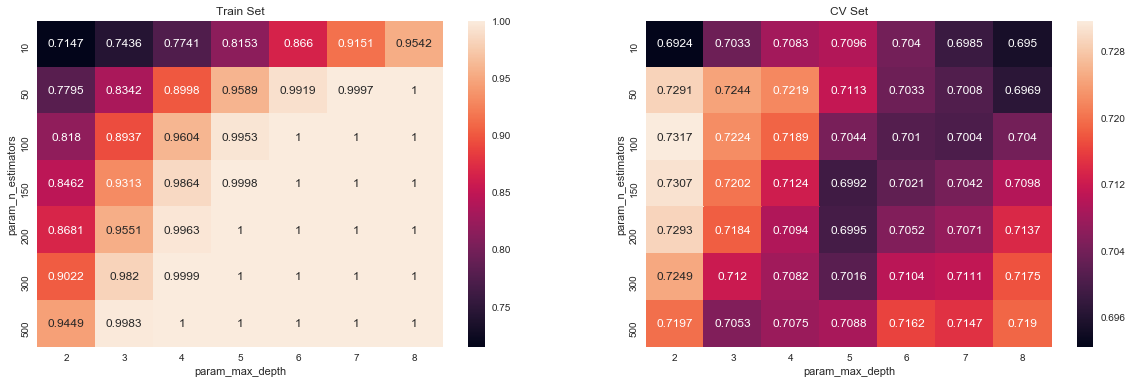

In [197]:
fig, ax = plt.subplots(1,2, figsize=(20,6))
sns.heatmap(max_scores3.mean_train_score, annot = True, fmt='.4g', ax=ax[0])
sns.heatmap(max_scores3.mean_test_score, annot = True, fmt='.4g', ax=ax[1])
ax[0].set_title('Train Set')
ax[1].set_title('CV Set')
plt.show()

In [198]:
print(set3.best_estimator_)

XGBClassifier(base_score=0.5, booster=None, class_weight='balanced',
       colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
       gamma=0, gpu_id=-1, importance_type='gain',
       interaction_constraints=None, learning_rate=0.300000012,
       max_delta_step=0, max_depth=2, min_child_weight=1, missing=nan,
       monotone_constraints=None, n_estimators=100, n_jobs=0,
       num_parallel_tree=1, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
       tree_method=None, validate_parameters=False, verbosity=None)


In [199]:
max_d = set3.best_params_['max_depth']
n_est = set3.best_params_['n_estimators']

### Training our model with best Hyperparameters

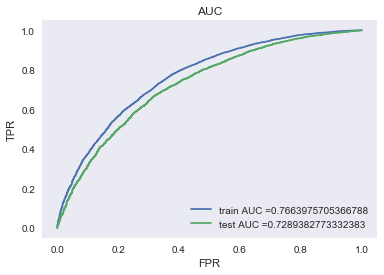

In [200]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier(max_depth = max_d , n_estimators = n_est)

model.fit(X_tr_AVG_W2V, y_train)
    
y_train_pred = pred_prob(model,X_tr_AVG_W2V)
y_test_pred = pred_prob(model,X_te_AVG_W2V)
    
train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.close
plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("AUC")
plt.grid()
plt.show()


### Confusion Matrix

In [201]:
#our objective here is to make auc the maximum
#so we find  the best threshold that will give the least fpr
best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)
print("Train confusion matrix")
print(confusion_matrix(y_train, predict_with_best_t(y_train_pred, best_t)))

the maximum value of tpr*(1-fpr) 0.4875473727855019 for threshold 0.833
Train confusion matrix
[[ 3104  1540]
 [ 6901 18605]]


Train data confusion matrix


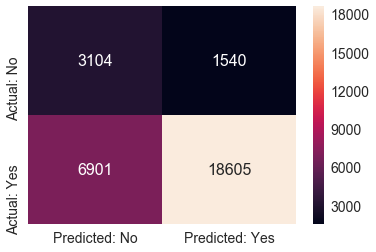

In [202]:
#plotting confusion matrix using seaborn's heatmap
# https://stackoverflow.com/questions/35572000/how-can-i-plot-a-confusion-matrix

print("Train data confusion matrix")

confusion_matrix_df_train = pd.DataFrame(confusion_matrix(y_train, predict_with_best_t(y_train_pred, best_t)), ['Actual: No','Actual: Yes'],['Predicted: No','Predicted: Yes'])
sns.set(font_scale=1.4)#for label size
sns.heatmap(confusion_matrix_df_train, annot=True,annot_kws={"size": 16}, fmt='g')

In [203]:
print("Test confusion matrix")
print(confusion_matrix(y_test, predict_with_best_t(y_test_pred, best_t)))

Test confusion matrix
[[1610  678]
 [4589 7973]]


Test data confusion matrix


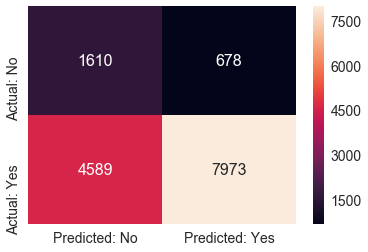

In [204]:
print("Test data confusion matrix")

confusion_matrix_df_test = pd.DataFrame(confusion_matrix(y_test, predict_with_best_t(y_test_pred, best_t)), ['Actual: No','Actual: Yes'],['Predicted: No','Predicted: Yes'])
sns.set(font_scale=1.4)#for label size
sns.heatmap(confusion_matrix_df_test, annot=True,annot_kws={"size": 16}, fmt='g')

### 2.5.4 Applying XGBOOST on TFIDF W2V,<font color='red'> SET 4</font>

In [205]:
# Please write all the code with proper documentation

In [206]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
#from sklearn.grid_search import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import learning_curve, GridSearchCV
from xgboost import XGBClassifier

#n_estimators = [10, 50, 100, 150, 200, 300, 500, 1000], max_depth = [2, 3, 4, 5, 6, 7, 8, 9, 10]

clf = XGBClassifier(class_weight='balanced')
parameters ={'n_estimators': [10, 50, 100, 150, 200, 300, 500], 'max_depth': [2, 3, 4, 5, 6, 7, 8]}
set4 =GridSearchCV(clf, parameters, cv=5, scoring='roc_auc',return_train_score=True)
set4.fit(X_tr_TFIDF_W2V, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=XGBClassifier(base_score=None, booster=None, class_weight='balanced',
       colsample_bylevel=None, colsample_bynode=None,
       colsample_bytree=None, gamma=None, gpu_id=None,
       importance_type='gain', interaction_constraints=None,
       learning_rate=None, max_delta_step=None, ma...pos_weight=None, subsample=None,
       tree_method=None, validate_parameters=False, verbosity=None),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': [10, 50, 100, 150, 200, 300, 500], 'max_depth': [2, 3, 4, 5, 6, 7, 8]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='roc_auc', verbose=0)

In [207]:
print(set4.cv_results_)

{'mean_fit_time': array([  19.48469605,   47.37709379,   82.38368616,  117.45549631,
        152.82570796,  223.17537723,  364.70648417,   21.87948871,
         63.26101732,  113.89102201,  165.12381191,  215.84577818,
        317.34195538,  521.85424166,   25.21297317,   87.6785192 ,
        148.81962237,  213.88183031,  284.80376167,  417.31221271,
        687.81263161,   28.15589647,   96.4504694 ,  179.76785836,
        263.8196857 ,  350.34808912,  518.70107446,  851.94749875,
         31.75726542,  112.16903315,  213.44559708,  315.74820976,
        416.35995812,  616.97108469, 1080.4634304 ,   37.59964519,
        135.89665718,  265.12946591,  427.3624784 ,  501.19556241,
        701.85629606, 1079.95056667,   38.20084052,  146.43100157,
        280.42188787,  404.2944171 ,  520.81182227,  737.96790586,
       1112.16820283]), 'std_fit_time': array([ 0.87990155,  0.67554766,  0.87800321,  0.68479648,  1.26395711,
        1.255631  ,  2.12955455,  0.15179577,  1.14723398,  1.1173

In [208]:
import seaborn as sns; sns.set()
max_scores4 = pd.DataFrame(set4.cv_results_).groupby(['param_n_estimators', 'param_max_depth']).max().unstack()
max_scores4

mean_fit_time                                      \
param_max_depth                2           3           4           5   
param_n_estimators                                                     
10                     19.484696   21.879489   25.212973   28.155896   
50                     47.377094   63.261017   87.678519   96.450469   
100                    82.383686  113.891022  148.819622  179.767858   
150                   117.455496  165.123812  213.881830  263.819686   
200                   152.825708  215.845778  284.803762  350.348089   
300                   223.175377  317.341955  417.312213  518.701074   
500                   364.706484  521.854242  687.812632  851.947499   

                                                          mean_score_time  \
param_max_depth               6            7            8               2   
param_n_estimators                                                          
10                    31.757265    37.599645    38.200841        2.048722   
50                   112.169033   135.896657   146.431002        1.977114   
100                  213.445597   265.129466   280.421888        2.189744   
150                  315.748210   427.362478   404.294417        2.092007   
200                  416.359958   501.195562   520.811822        2.074054   
300                  616.971085   701.856296   737.967906        2.093601   
500                 1080.463430  1079.950567  1112.168203        2.145463   

                                            ...      std_test_score            \
param_max_depth            3         4      ...                   6         7   
param_n_estimators                          ...                                 
10                  1.835891  2.086820      ...            0.005888  0.006319   
50                  2.131501  2.767399      ...            0.010306  0.007626   
100                 2.141075  2.130702      ...            0.008895  0.008332   
150                 2.064879  2.194332      ...            0.010014  0.009933   
200                 2.134493  2.577308      ...            0.010388  0.009559   
300                 2.188348  2.166008      ...            0.008471  0.010516   
500                 2.230237  2.246593      ...            0.007747  0.011399   

                             std_train_score                      \
param_max_depth            8               2         3         4   
param_n_estimators                                                 
10                  0.006906        0.002155  0.003651  0.002484   
50                  0.010485        0.002000  0.003216  0.002777   
100                 0.009103        0.002916  0.003302  0.001050   
150                 0.011386        0.003047  0.003427  0.001100   
200                 0.010342        0.002879  0.002023  0.000342   
300                 0.009681        0.002432  0.001585  0.000039   
500                 0.010020        0.002027  0.000294  0.000000   

                                                                            
param_max_depth                5             6             7             8  
param_n_estimators                                                          
10                  2.517343e-03  4.546690e-03  2.689729e-03  2.640766e-03  
50                  1.916501e-03  9.666577e-04  6.504171e-05  2.054006e-07  
100                 5.936191e-04  1.126592e-05  0.000000e+00  0.000000e+00  
150                 1.895906e-05  0.000000e+00  0.000000e+00  0.000000e+00  
200                 2.050979e-06  0.000000e+00  4.965068e-17  0.000000e+00  
300                 0.000000e+00  4.965068e-17  0.000000e+00  0.000000e+00  
500                 4.965068e-17  0.000000e+00  0.000000e+00  0.000000e+00  

[7 rows x 140 columns]

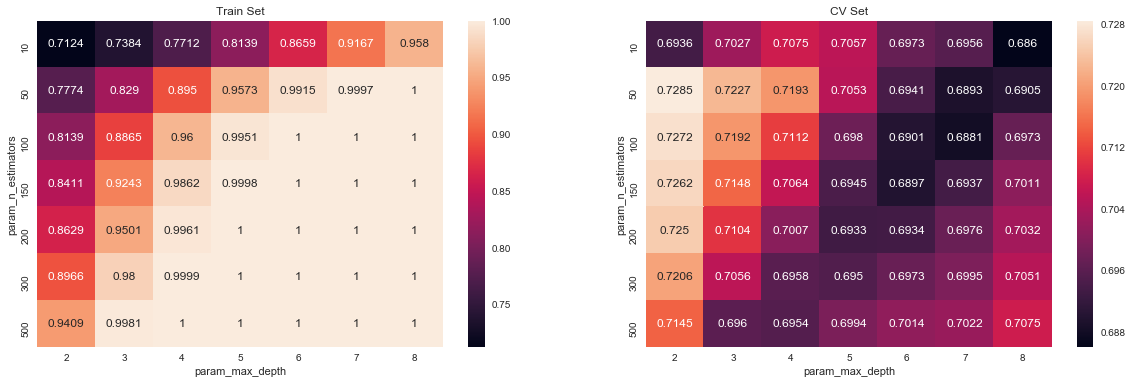

In [209]:
fig, ax = plt.subplots(1,2, figsize=(20,6))
sns.heatmap(max_scores4.mean_train_score, annot = True, fmt='.4g', ax=ax[0])
sns.heatmap(max_scores4.mean_test_score, annot = True, fmt='.4g', ax=ax[1])
ax[0].set_title('Train Set')
ax[1].set_title('CV Set')
plt.show()

In [210]:
print(set4.best_estimator_)

XGBClassifier(base_score=0.5, booster=None, class_weight='balanced',
       colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
       gamma=0, gpu_id=-1, importance_type='gain',
       interaction_constraints=None, learning_rate=0.300000012,
       max_delta_step=0, max_depth=2, min_child_weight=1, missing=nan,
       monotone_constraints=None, n_estimators=50, n_jobs=0,
       num_parallel_tree=1, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
       tree_method=None, validate_parameters=False, verbosity=None)


In [211]:
max_d = set4.best_params_['max_depth']
n_est = set4.best_params_['n_estimators']

### Training our model with best Hyperparameters

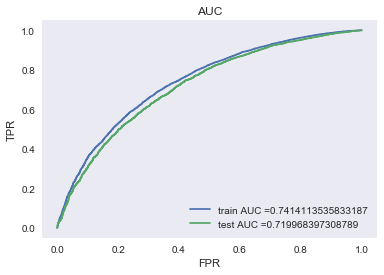

In [212]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier(max_depth = max_d , n_estimators = n_est)

model.fit(X_tr_TFIDF_W2V, y_train)
    
y_train_pred = pred_prob(model,X_tr_TFIDF_W2V)
y_test_pred = pred_prob(model,X_te_TFIDF_W2V)
    
train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.close
plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("AUC")
plt.grid()
plt.show()


### Confusion Matrix

In [213]:
#our objective here is to make auc the maximum
#so we find  the best threshold that will give the least fpr
best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)
print("Train confusion matrix")
print(confusion_matrix(y_train, predict_with_best_t(y_train_pred, best_t)))

the maximum value of tpr*(1-fpr) 0.46242484499602293 for threshold 0.839
Train confusion matrix
[[ 3140  1504]
 [ 8062 17444]]


Train data confusion matrix


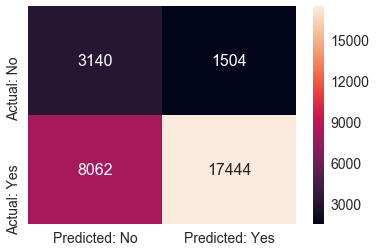

In [214]:
#plotting confusion matrix using seaborn's heatmap
# https://stackoverflow.com/questions/35572000/how-can-i-plot-a-confusion-matrix

print("Train data confusion matrix")

confusion_matrix_df_train = pd.DataFrame(confusion_matrix(y_train, predict_with_best_t(y_train_pred, best_t)), ['Actual: No','Actual: Yes'],['Predicted: No','Predicted: Yes'])
sns.set(font_scale=1.4)#for label size
sns.heatmap(confusion_matrix_df_train, annot=True,annot_kws={"size": 16}, fmt='g')

In [215]:
print("Test confusion matrix")
print(confusion_matrix(y_test, predict_with_best_t(y_test_pred, best_t)))

Test confusion matrix
[[1679  609]
 [5284 7278]]


Test data confusion matrix


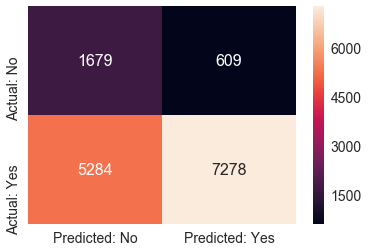

In [216]:
print("Test data confusion matrix")

confusion_matrix_df_test = pd.DataFrame(confusion_matrix(y_test, predict_with_best_t(y_test_pred, best_t)), ['Actual: No','Actual: Yes'],['Predicted: No','Predicted: Yes'])
sns.set(font_scale=1.4)#for label size
sns.heatmap(confusion_matrix_df_test, annot=True,annot_kws={"size": 16}, fmt='g')

<h1>3. Conclusion</h1>

In [ ]:
# Please compare all your models using Prettytable library

In [217]:

# Please compare all your models using Prettytable library

# http://zetcode.com/python/prettytable/

from prettytable import PrettyTable

#If you get a ModuleNotFoundError error , install prettytable using: pip3 install prettytable

x = PrettyTable()
x.field_names = ["Vectorizer", "Model", "Hyperparameters(n_estimators,max_depth)", "Test AUC"]

x.add_row(["BOW", "RF","(500, 8)", 0.698])
x.add_row(["TFIDF", "RF", "(500, 8)",  0.702])
x.add_row(["AVG W2V", "RF", "(500, 7)",  0.705])
x.add_row(["TFIDF W2V", "RF", "(500, 7)",  0.706])

x.add_row(["----- ---", "----", "-------------------------------", "---------"])

x.add_row(["BOW", "GBDT","(200, 2)",  0.741])
x.add_row(["TFIDF", "GBDT", "(150, 2)",  0.738])
x.add_row(["AVG W2V", "GBDT", "(100, 2)",  0.728])
x.add_row(["TFIDF W2V", "GBDT", "(50, 2)", 0.719])



print(x)

+------------+-------+-----------------------------------------+-----------+
| Vectorizer | Model | Hyperparameters(n_estimators,max_depth) |  Test AUC |
+------------+-------+-----------------------------------------+-----------+
|    BOW     |   RF  |                 (500, 8)                |   0.698   |
|   TFIDF    |   RF  |                 (500, 8)                |   0.702   |
|  AVG W2V   |   RF  |                 (500, 7)                |   0.705   |
| TFIDF W2V  |   RF  |                 (500, 7)                |   0.706   |
| ----- ---  |  ---- |     -------------------------------     | --------- |
|    BOW     |  GBDT |                 (200, 2)                |   0.741   |
|   TFIDF    |  GBDT |                 (150, 2)                |   0.738   |
|  AVG W2V   |  GBDT |                 (100, 2)                |   0.728   |
| TFIDF W2V  |  GBDT |                 (50, 2)                 |   0.719   |
+------------+-------+-----------------------------------------+-----------+